# DATA IMPORT AND CLEANING

In [433]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns


from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (16,8)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2216 non-null   int64 
 1   Year_Birth           2216 non-null   int64 
 2   Education            2216 non-null   object
 3   Marital_Status       2216 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2216 non-null   int64 
 6   Teenhome             2216 non-null   int64 
 7   Dt_Customer          2216 non-null   object
 8   Recency              2216 non-null   int64 
 9   MntWines             2216 non-null   int64 
 10  MntFruits            2216 non-null   int64 
 11  MntMeatProducts      2216 non-null   int64 
 12  MntFishProducts      2216 non-null   int64 
 13  MntSweetProducts     2216 non-null   int64 
 14  MntGoldProds         2216 non-null   int64 
 15  NumDealsPurchases    2216 non-null   int64 
 16  NumWeb

In [56]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/2014,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/2014,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/2014,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/2014,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/2014,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/2013,99,372,...,11,4,0,0,0,0,0,0,0,US
2212,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/2013,99,5,...,3,8,0,0,0,0,0,0,0,SP
2213,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/2012,99,185,...,5,8,0,0,0,0,0,0,0,SP
2214,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/2012,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [57]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/2014,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/2014,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/2014,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/2014,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/2014,0,6,...,2,7,1,0,0,0,0,1,0,SP
5,7348,1958,PhD,Single,"$71,691.00",0,0,3/17/2014,0,336,...,5,2,0,0,0,0,0,1,0,SP
6,4073,1954,2n Cycle,Married,"$63,564.00",0,0,1/29/2014,0,769,...,7,6,1,0,0,0,0,1,0,GER
7,1991,1967,Graduation,Together,"$44,931.00",0,1,1/18/2014,0,78,...,3,5,0,0,0,0,0,0,0,SP
8,4047,1954,PhD,Married,"$65,324.00",0,1,1/11/2014,0,384,...,9,4,0,0,0,0,0,0,0,US
9,9477,1954,PhD,Married,"$65,324.00",0,1,1/11/2014,0,384,...,9,4,0,0,0,0,0,0,0,IND


In [58]:
#HANDLING MISSING VALUES

df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
 Income                0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

In [59]:
df.shape

(2216, 28)

In [60]:
#CHECKING FOR DUPLICATES

df.loc[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country


In [9]:
# CHECKING FOR OUTLIERS USING BOXPLOT

In [62]:
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,...,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.150271,0.009477
std,3249.376275,11.985554,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,...,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.357417,0.096907
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,1959.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8421.750000,1977.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


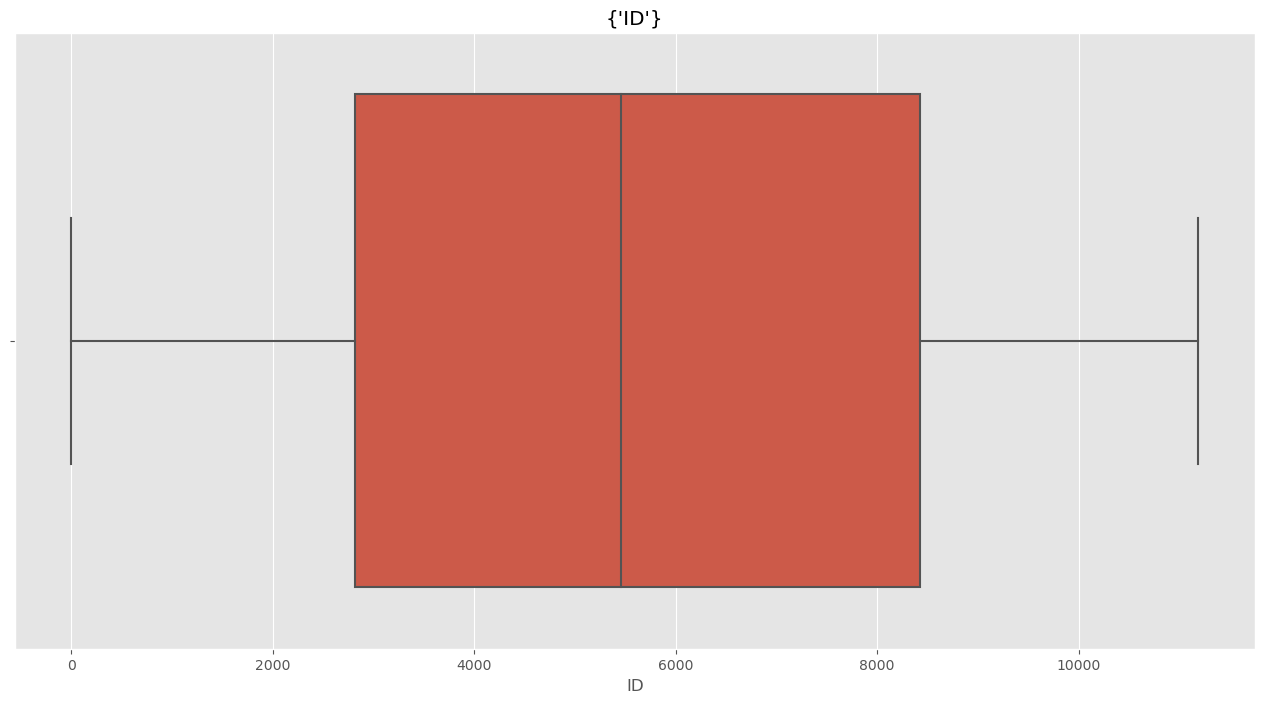

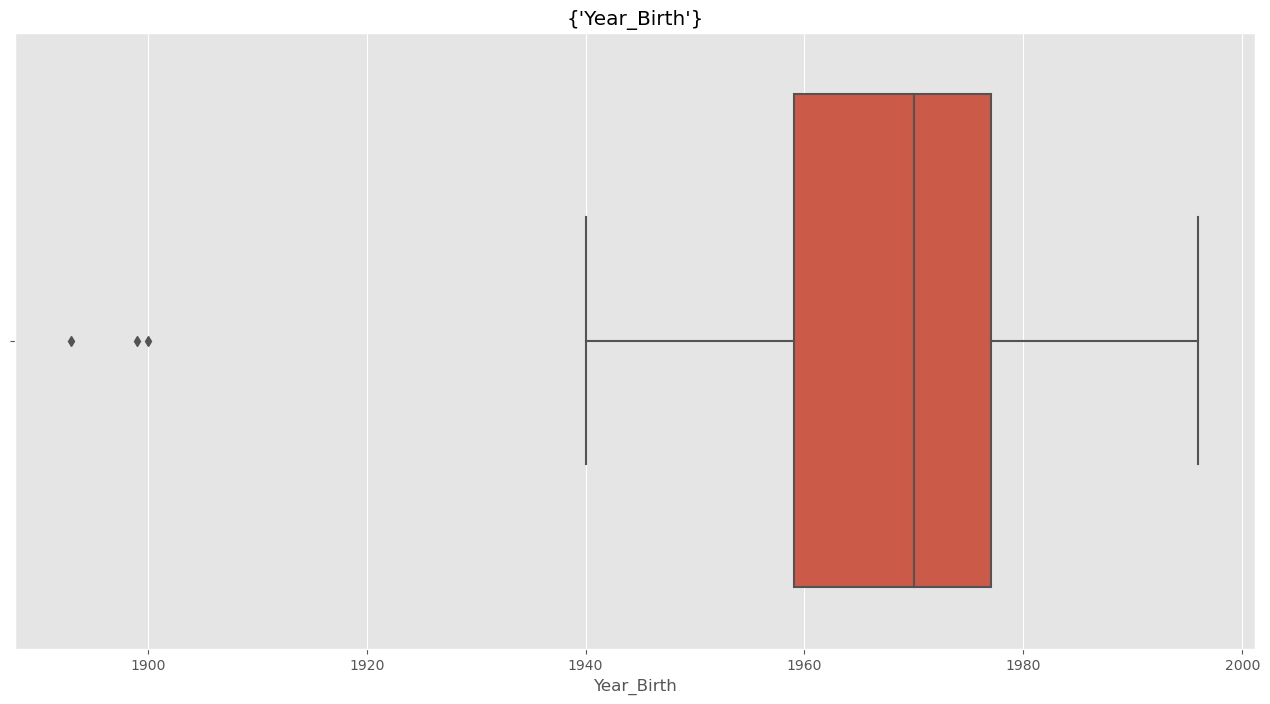

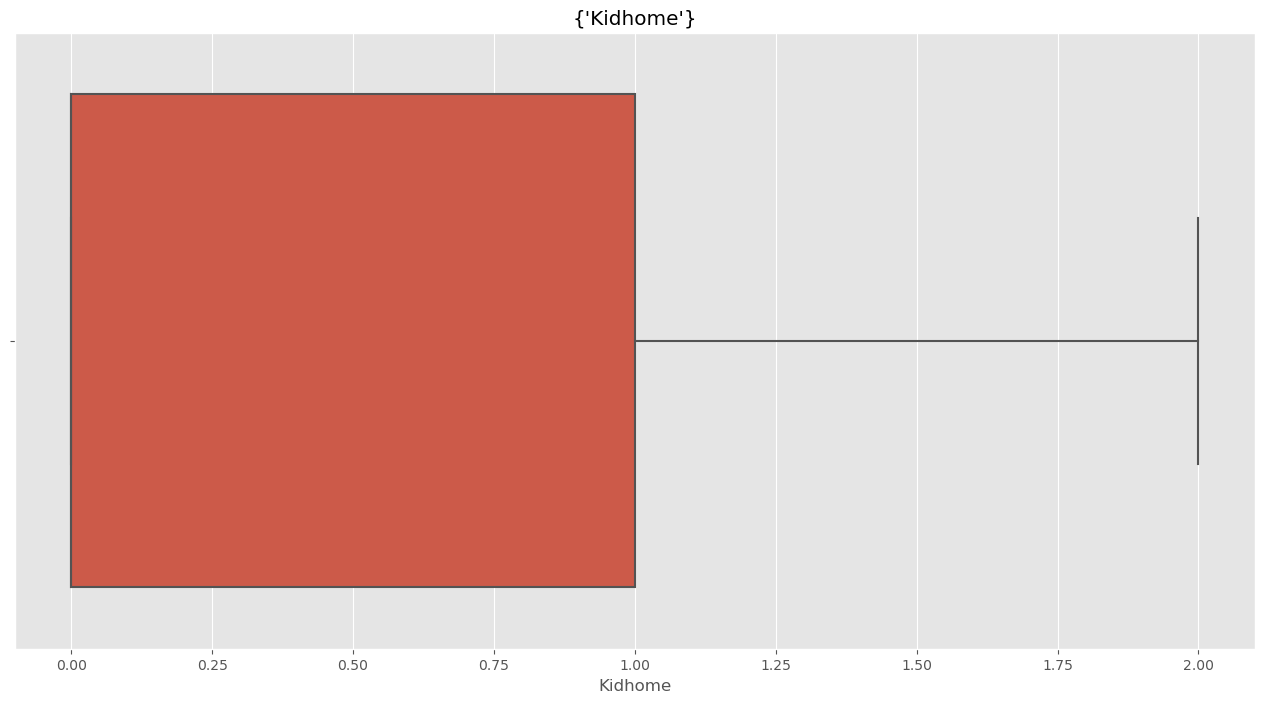

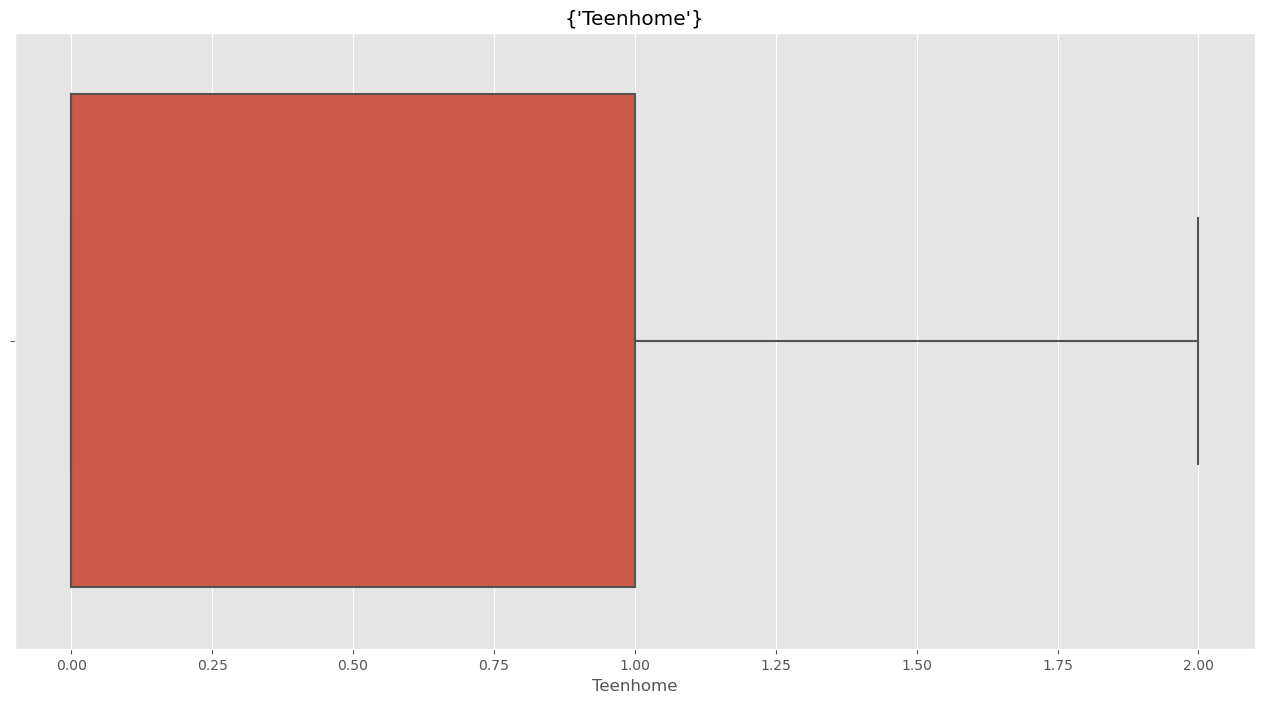

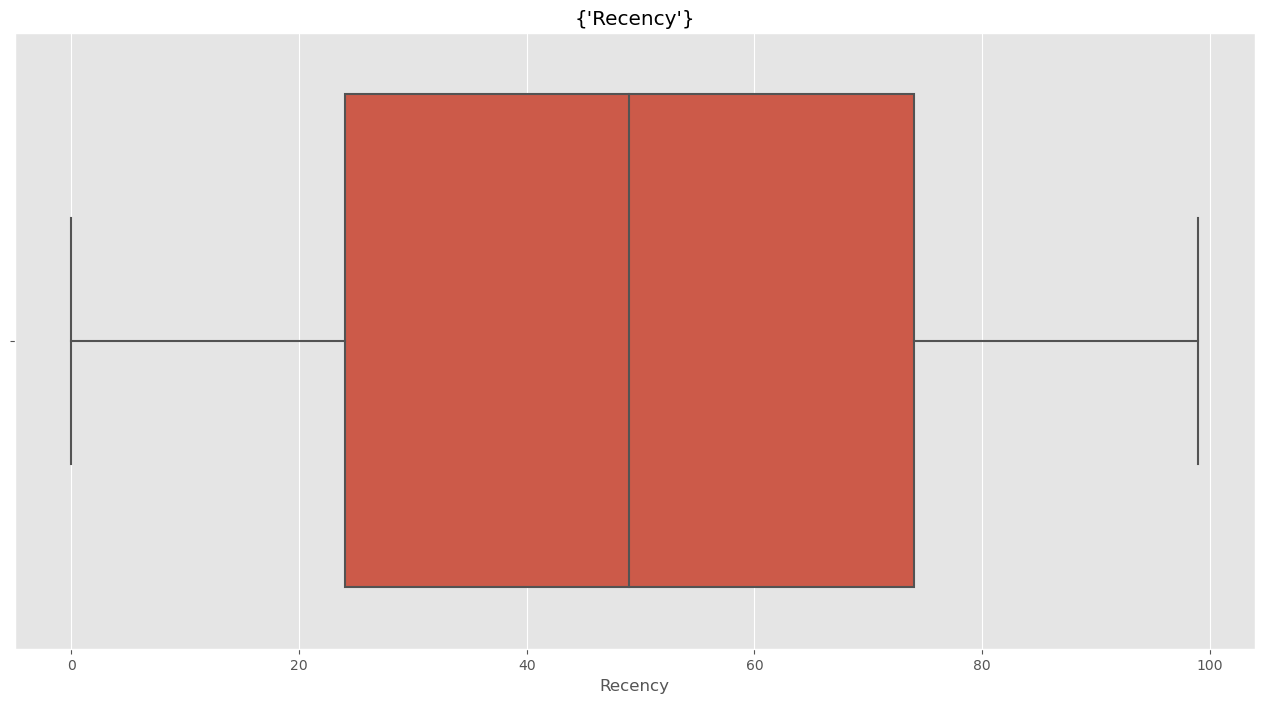

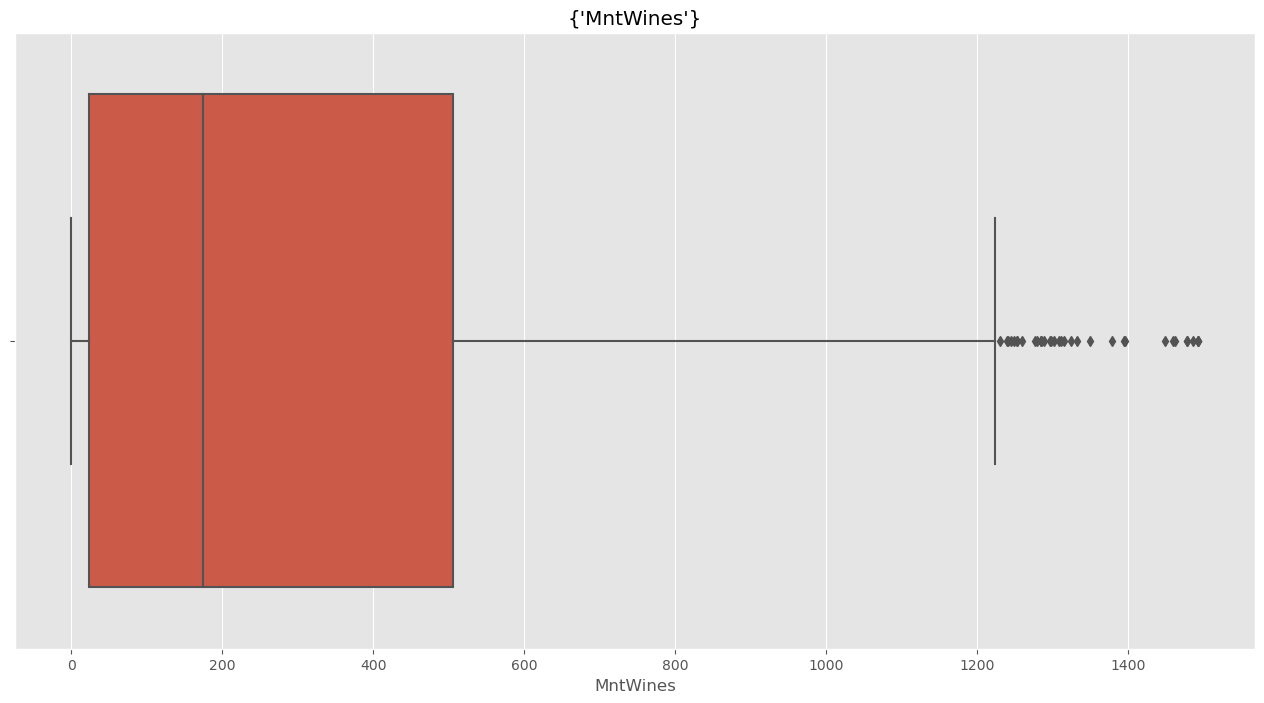

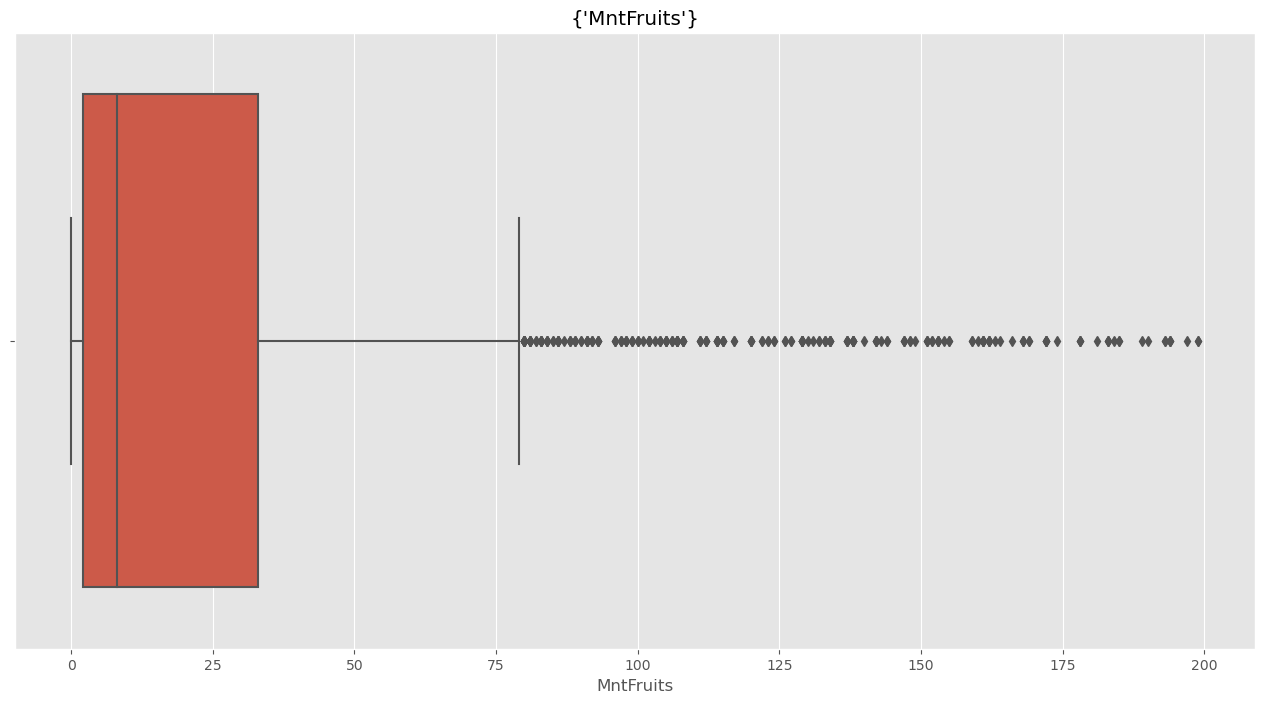

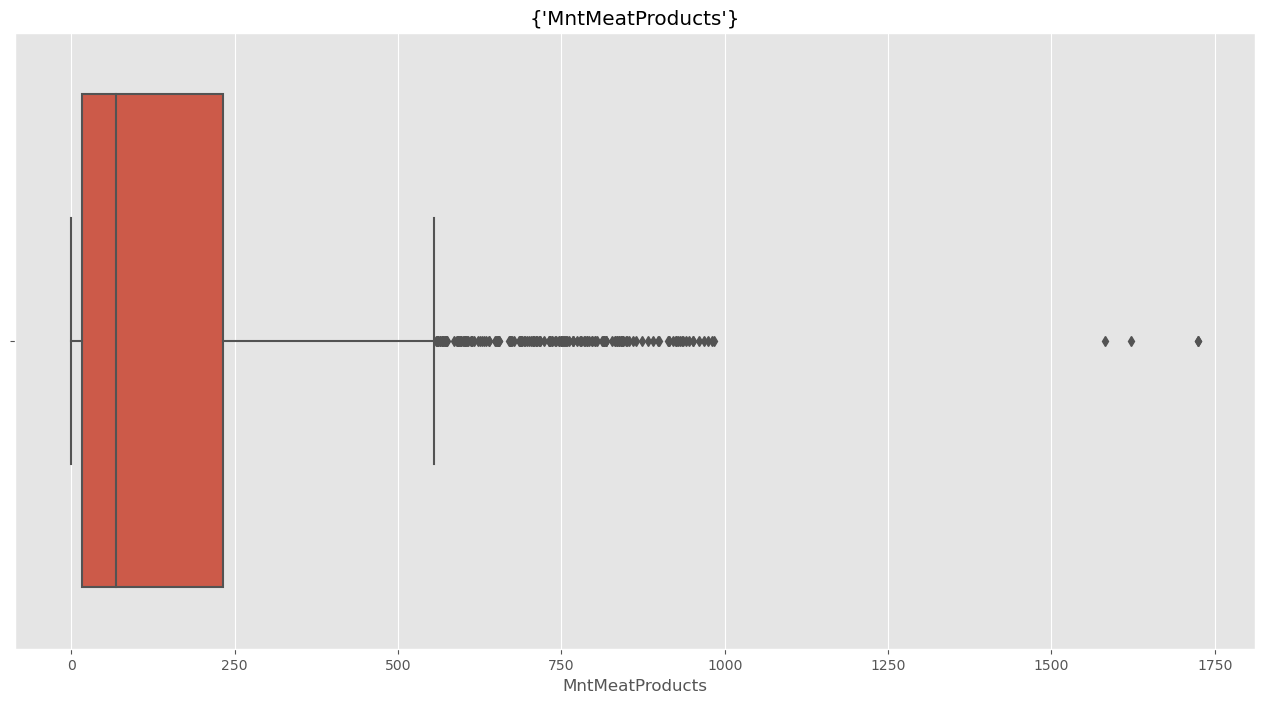

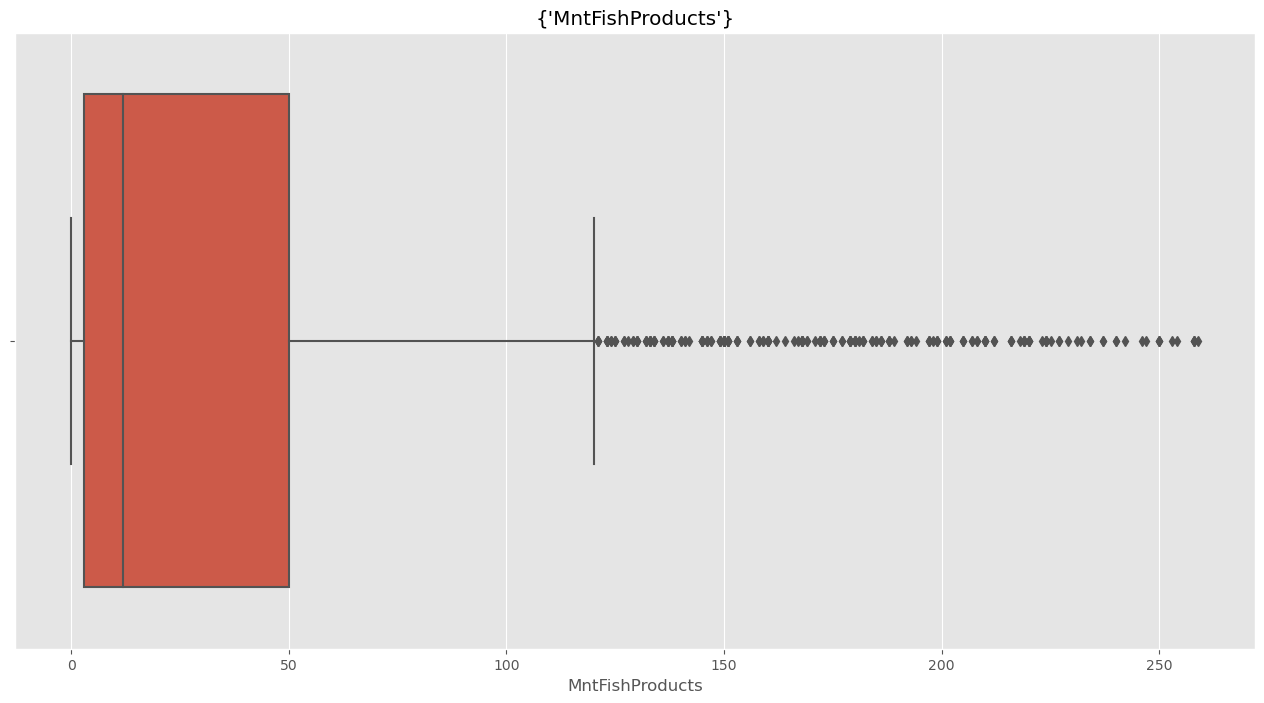

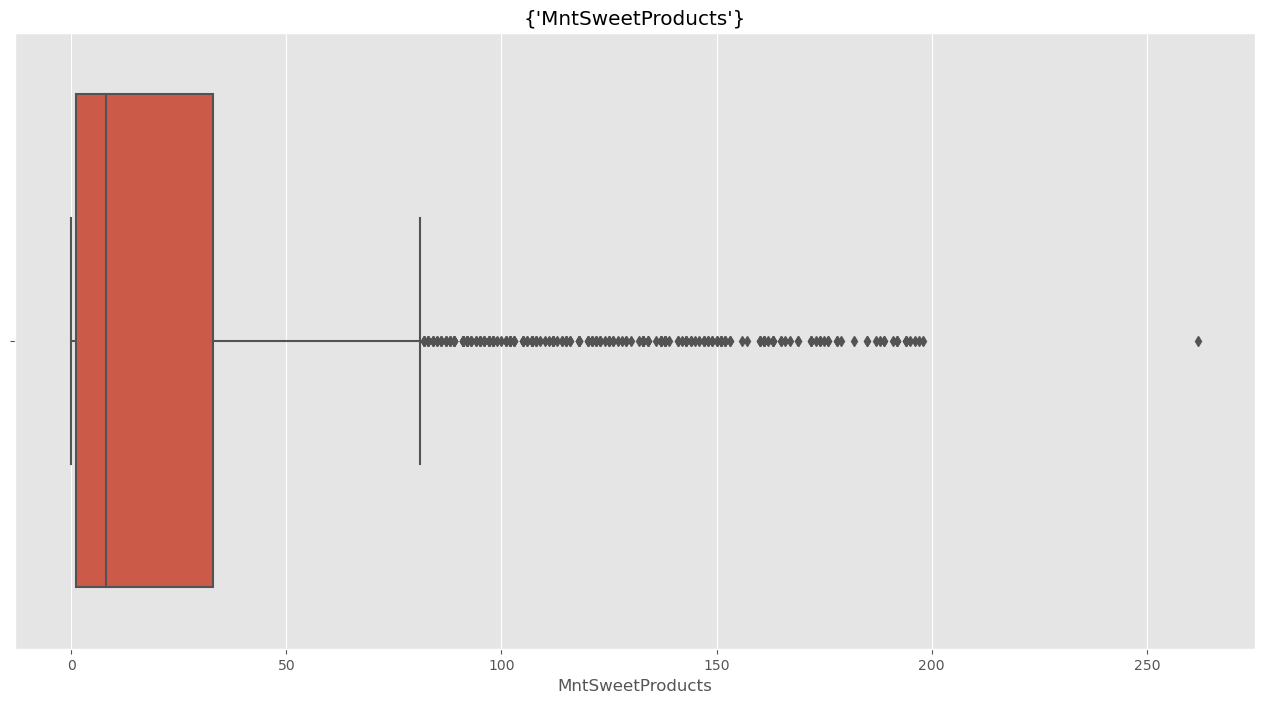

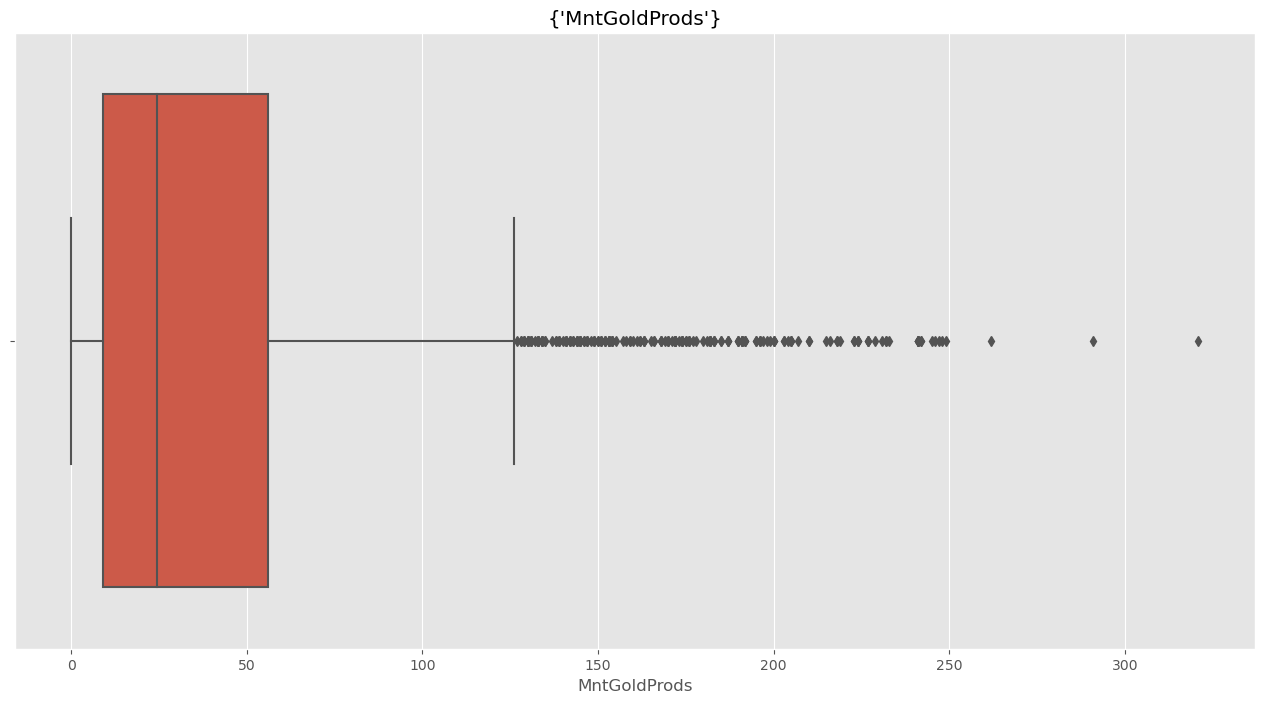

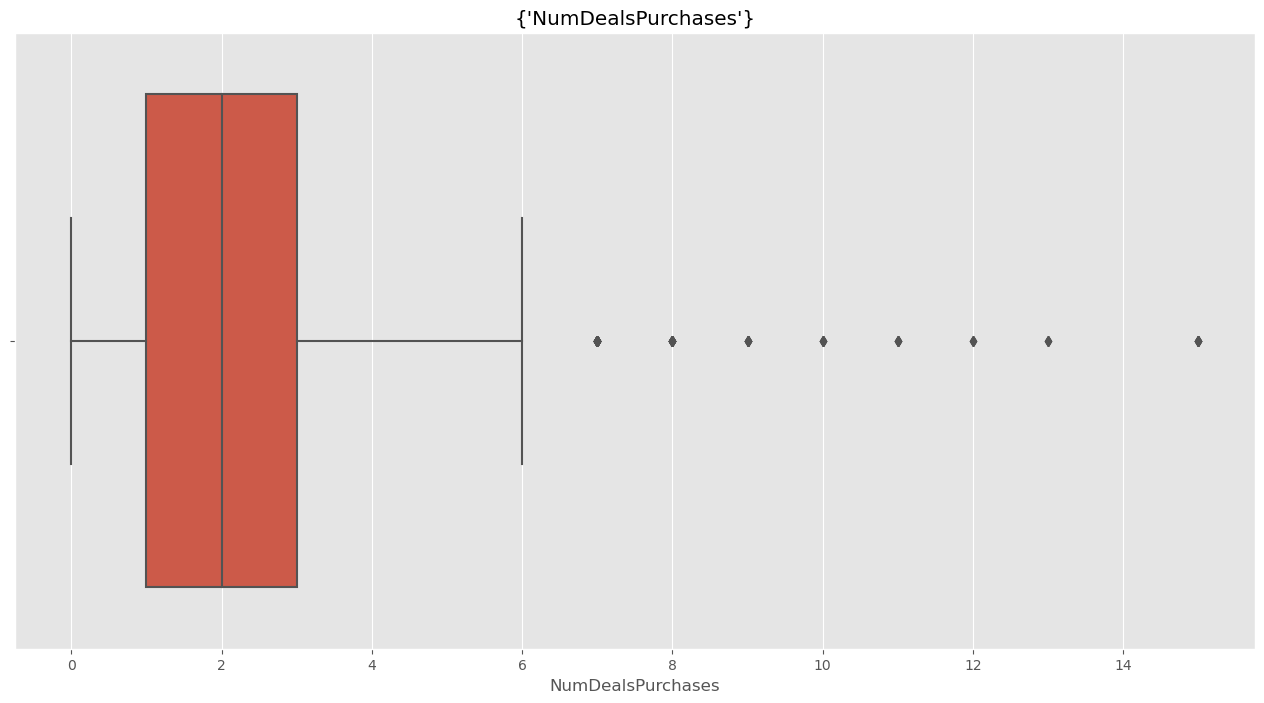

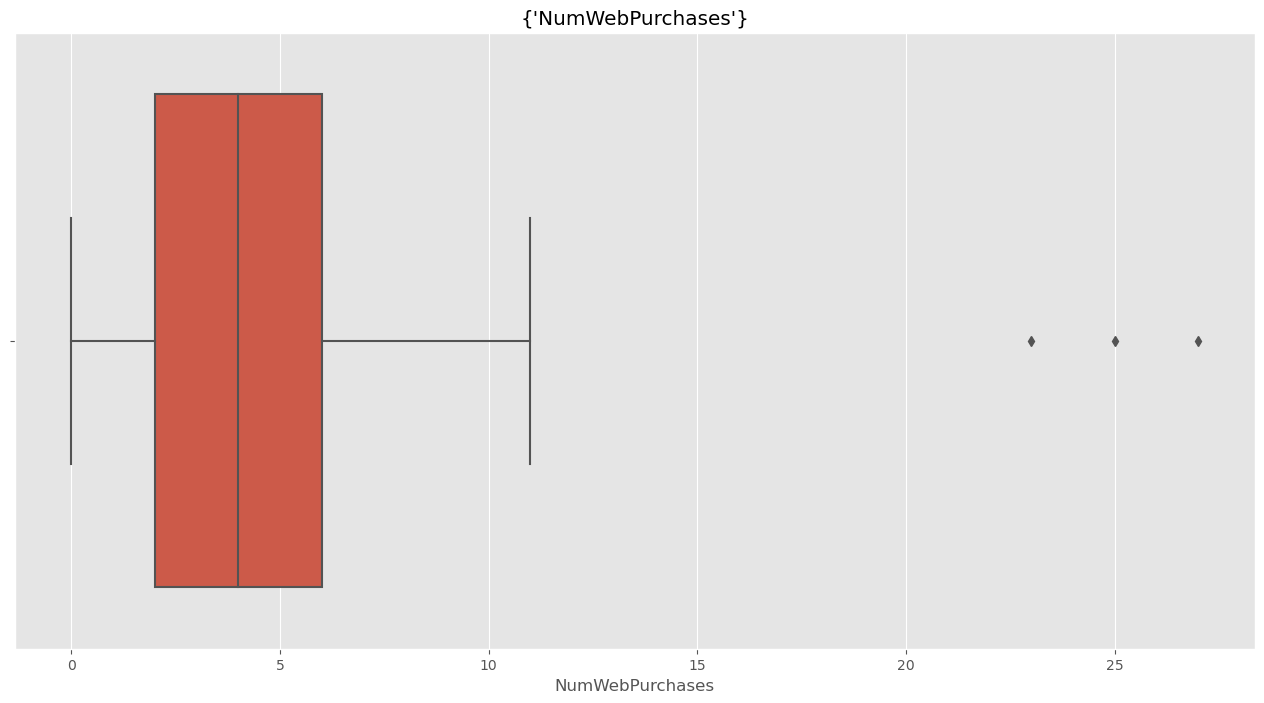

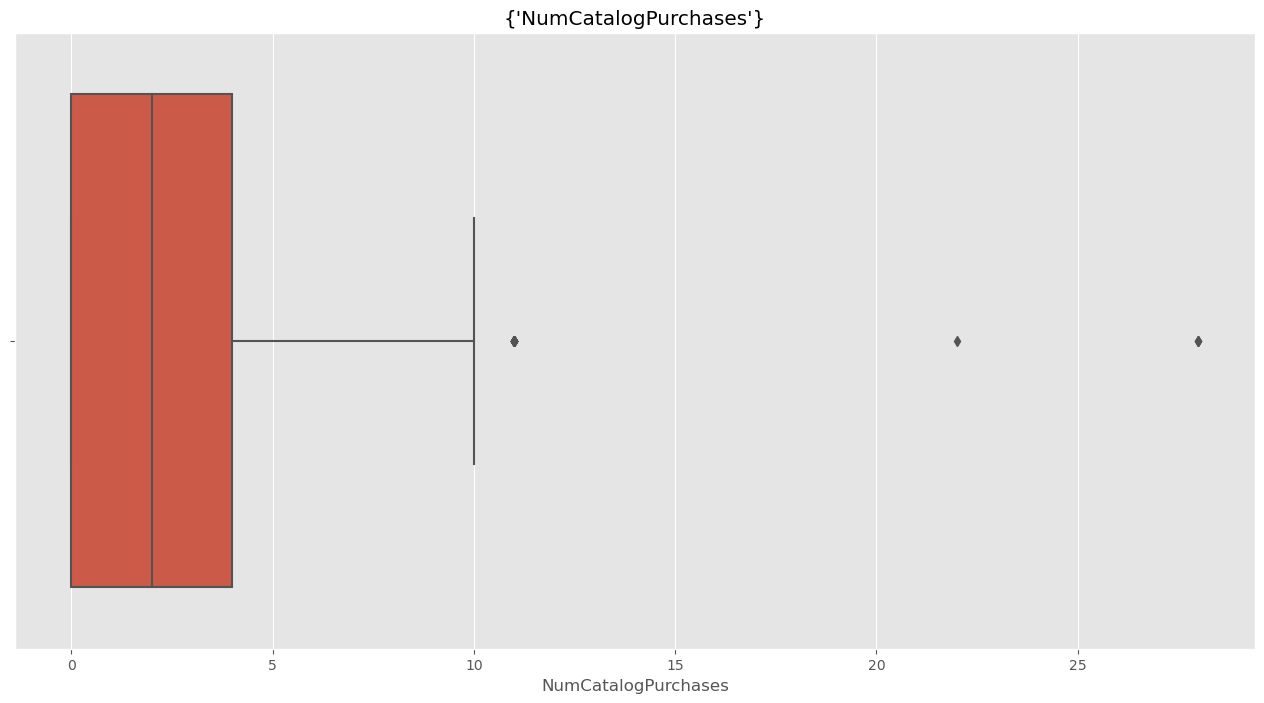

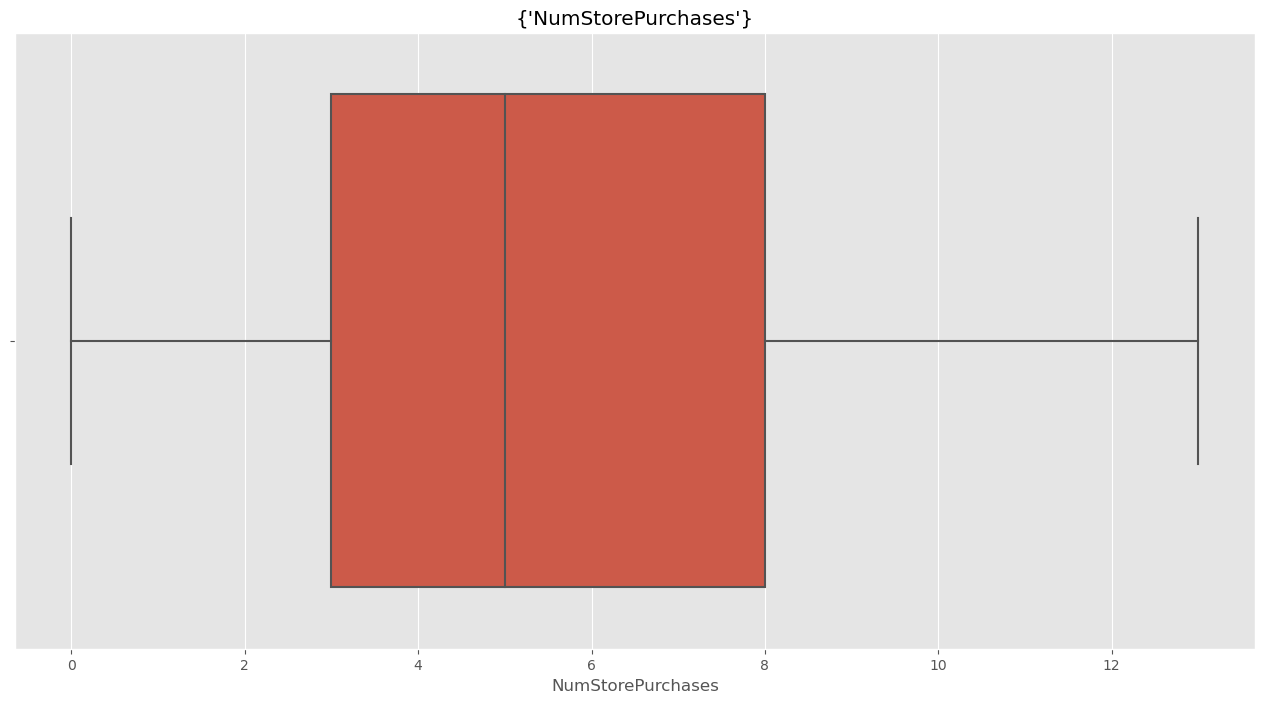

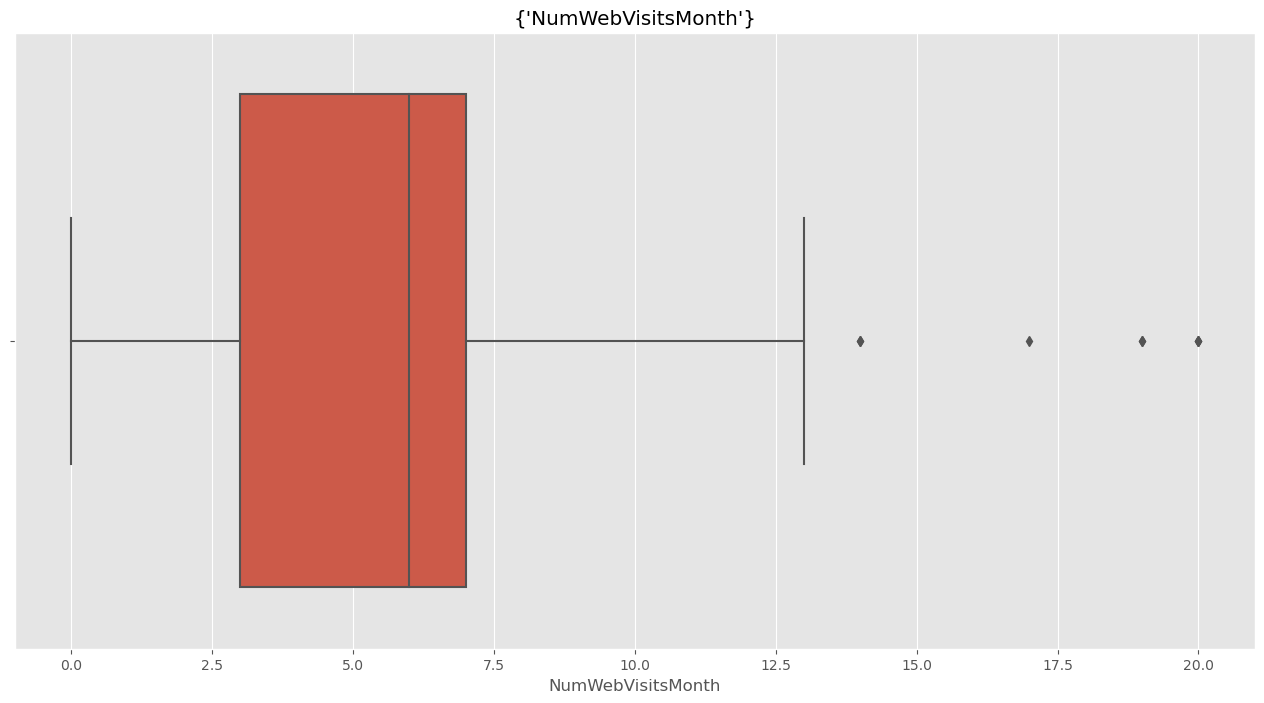

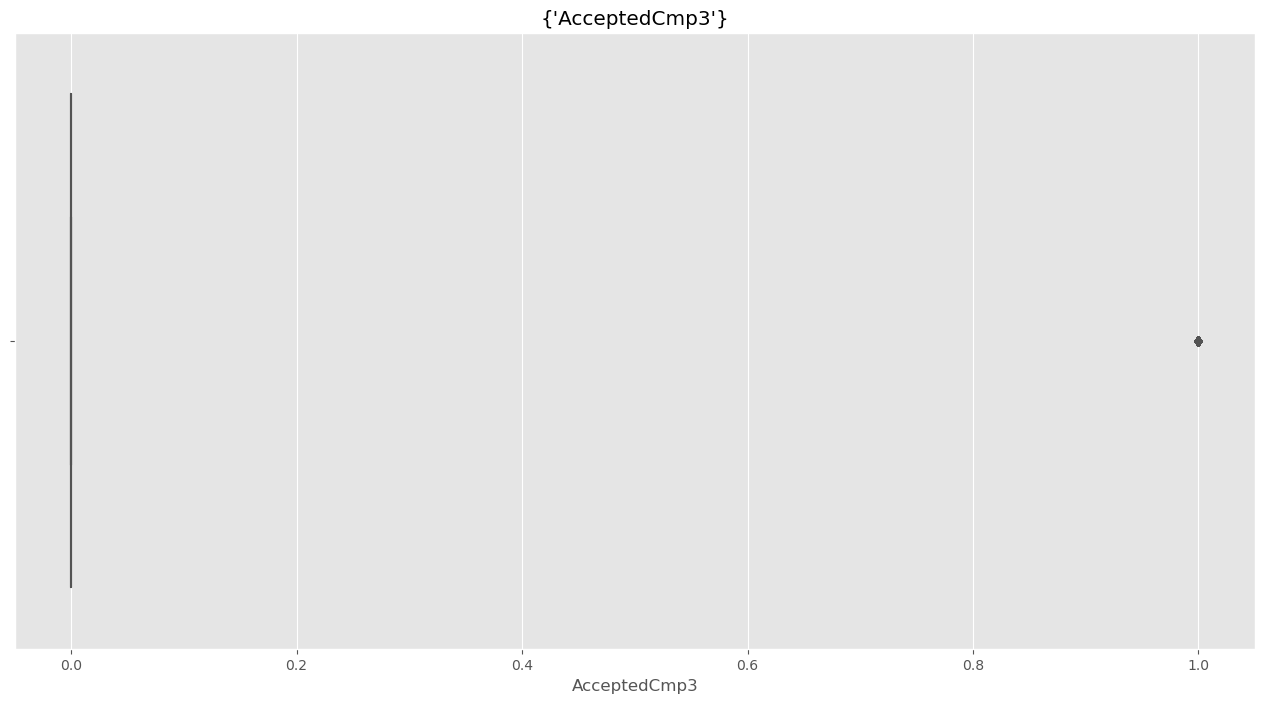

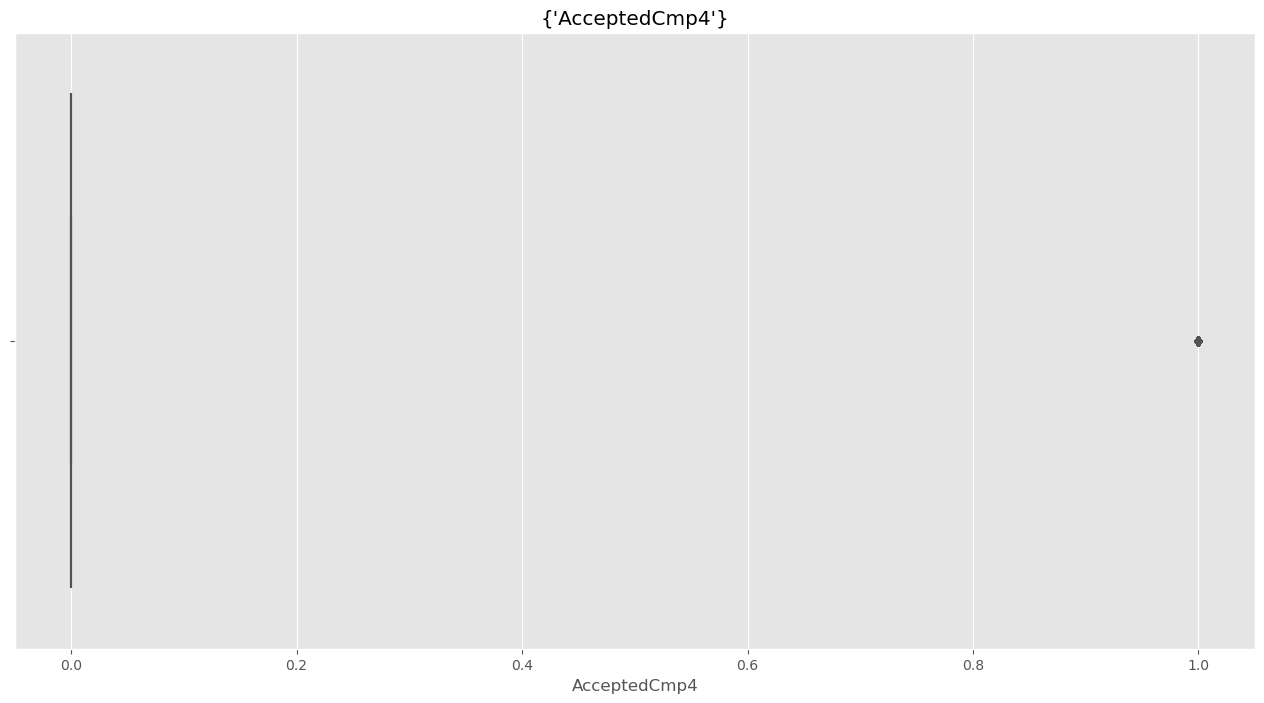

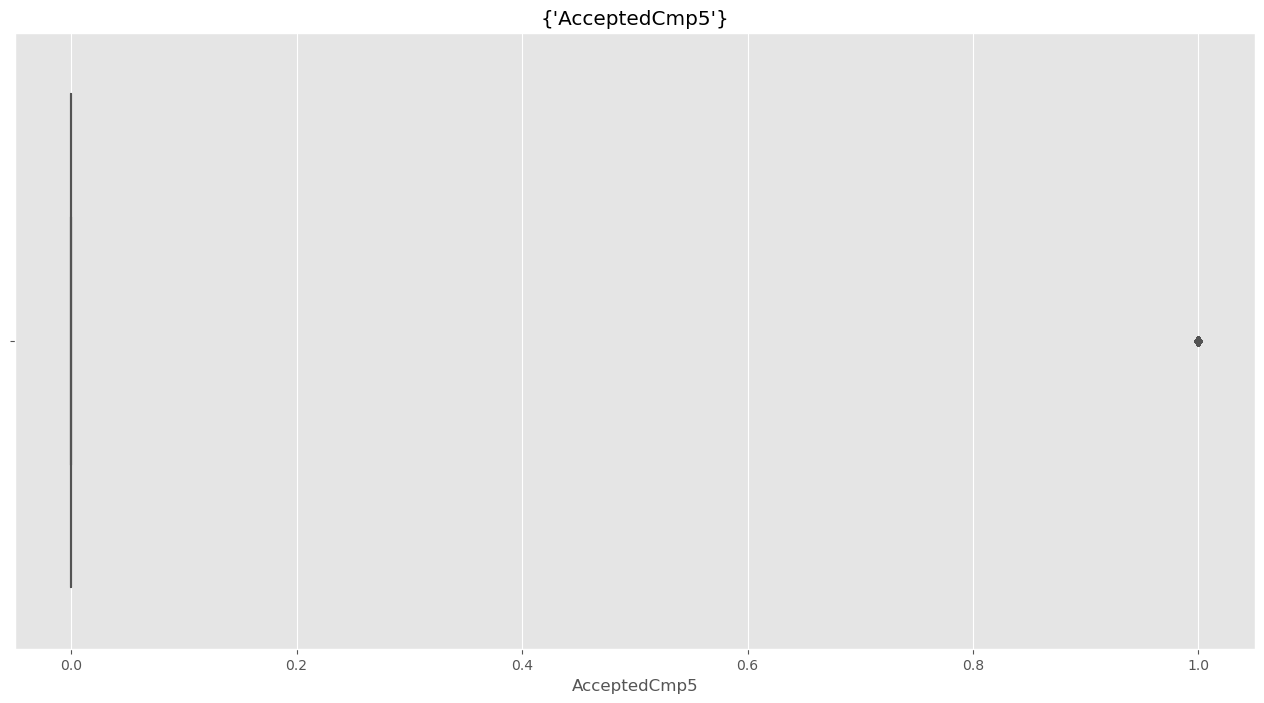

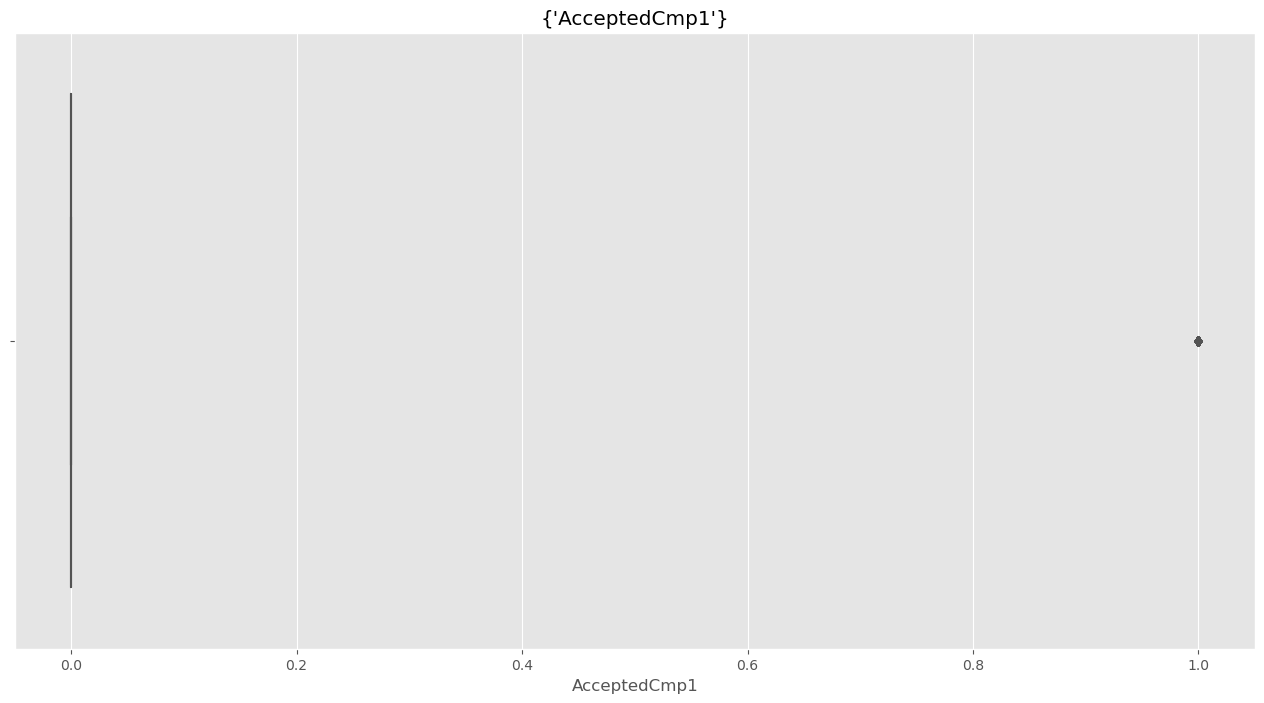

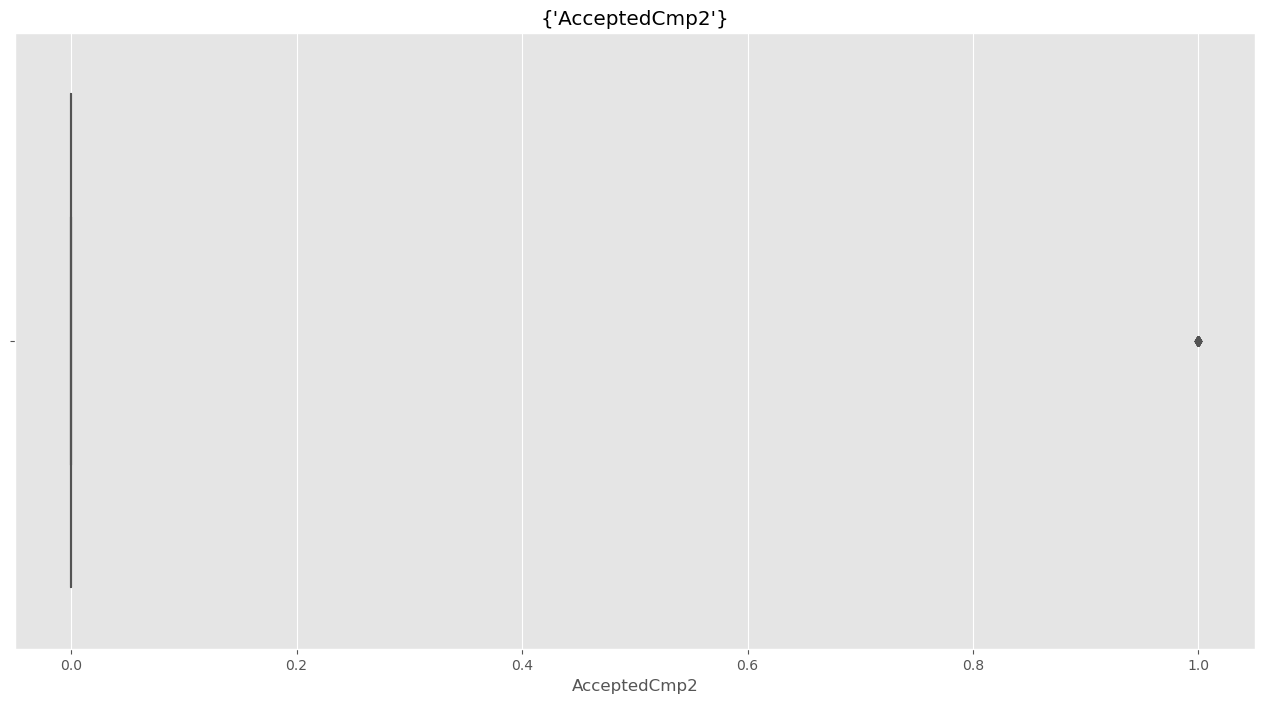

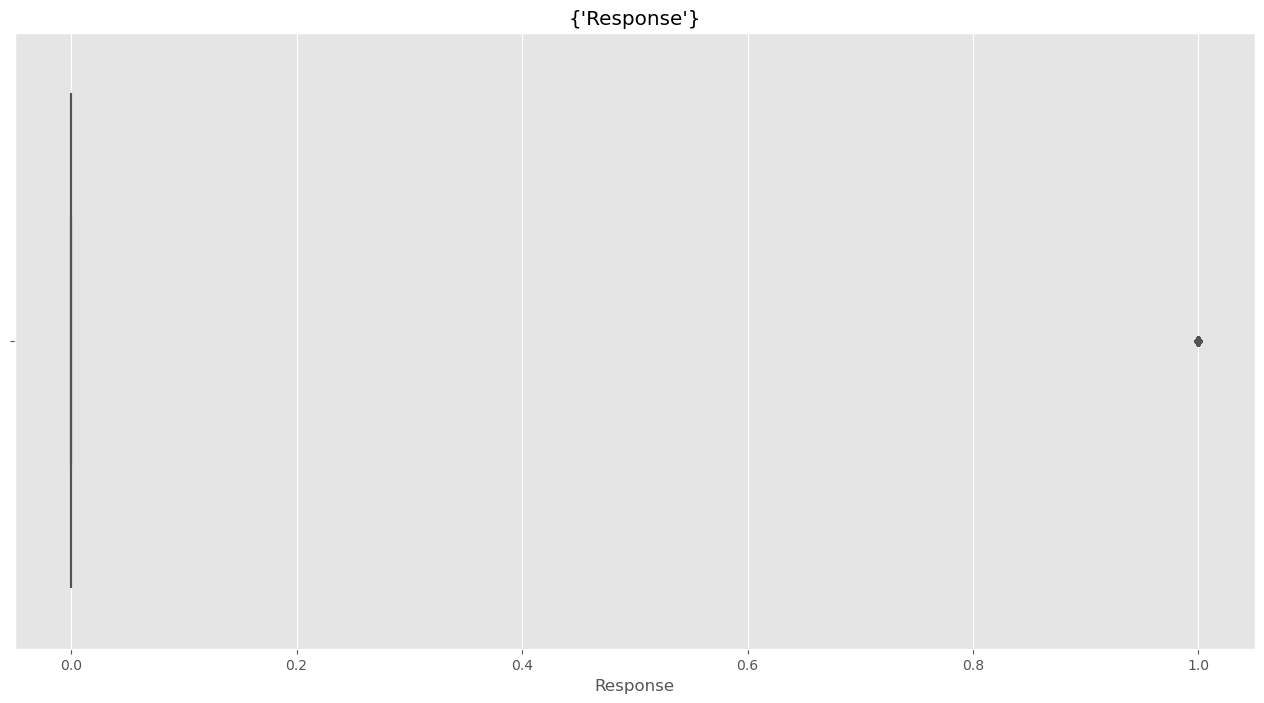

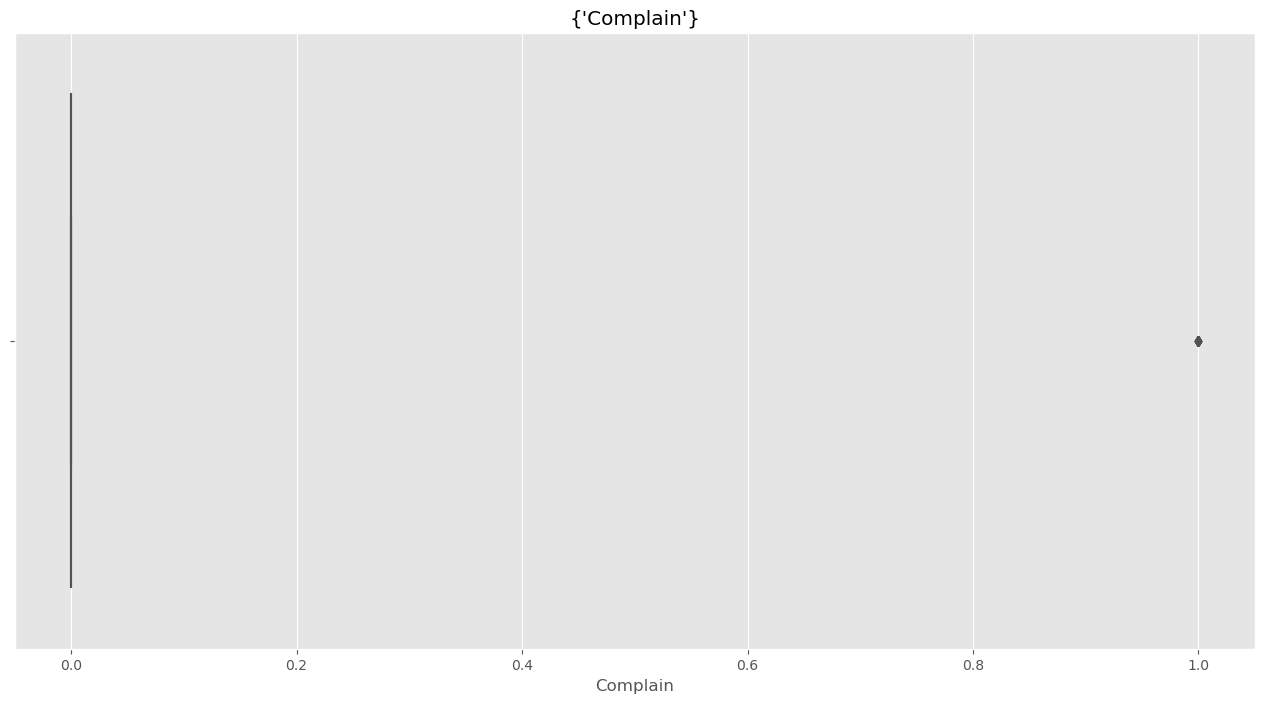

In [61]:
#SELECTING COLUMNS TO CHECK OUTLIERS

numerical_columns = df.select_dtypes(include=['int64']).columns

for col in numerical_columns:
    sns.boxplot(x=df[col])
    plt.title({col})
    plt.show()

In [ ]:

#CAPPING OUTLIERS WITH UPPER AND LOWER BOUNDS

# Function to cap outliers
def cap_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return col.clip(lower=lower_bound, upper=upper_bound)

# List of columns to check for outliers

columns_to_cap = ['Year_Birth','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases']

# Apply the capping function to the specified columns

df[columns_to_cap] = df[columns_to_cap].apply(cap_outliers)


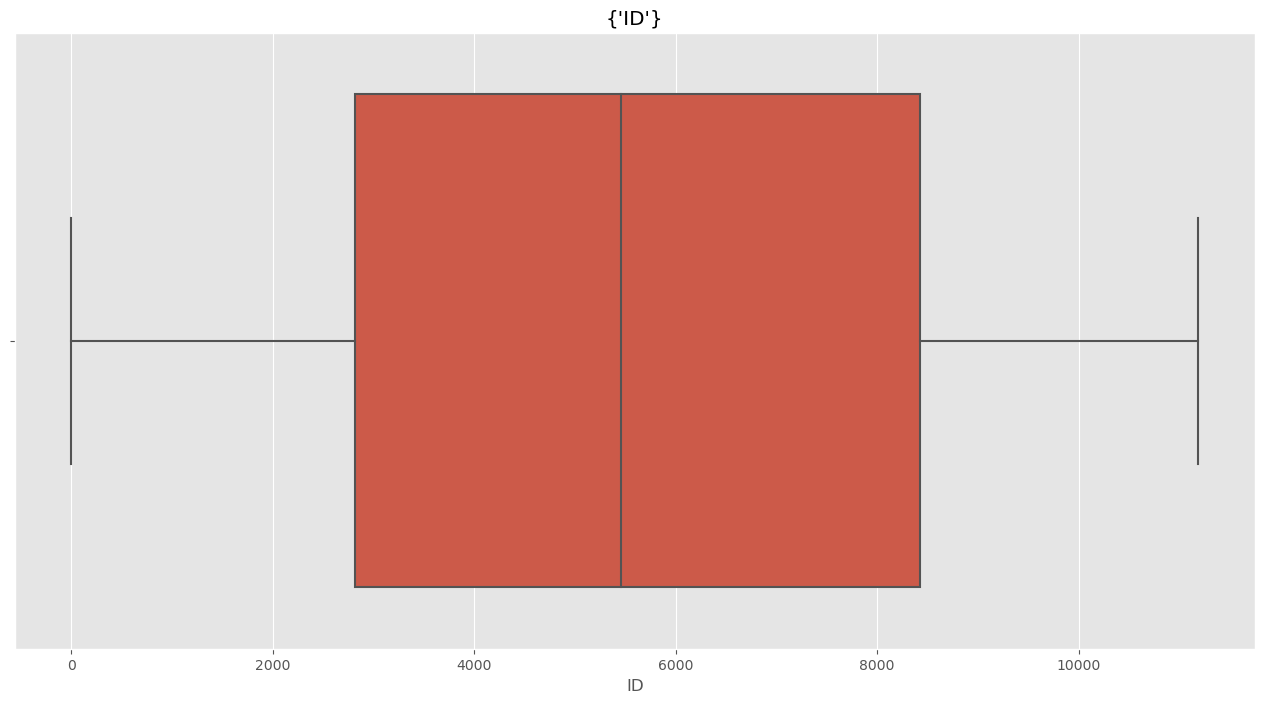

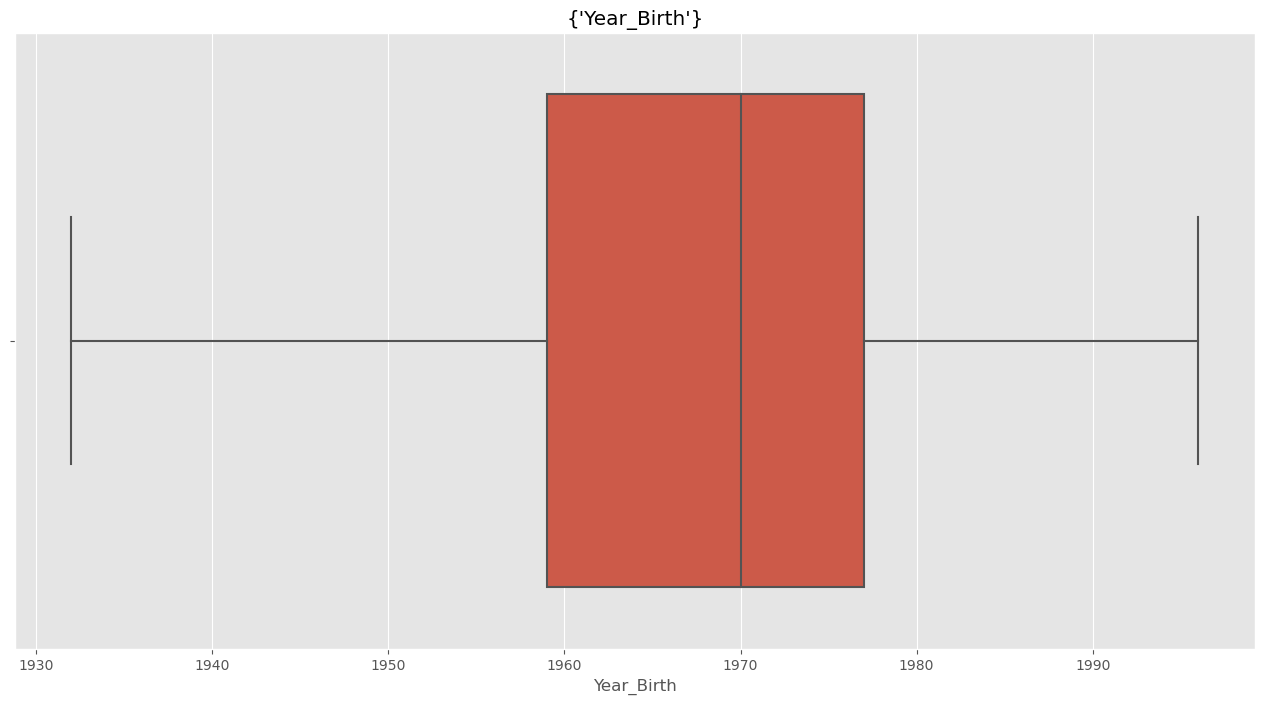

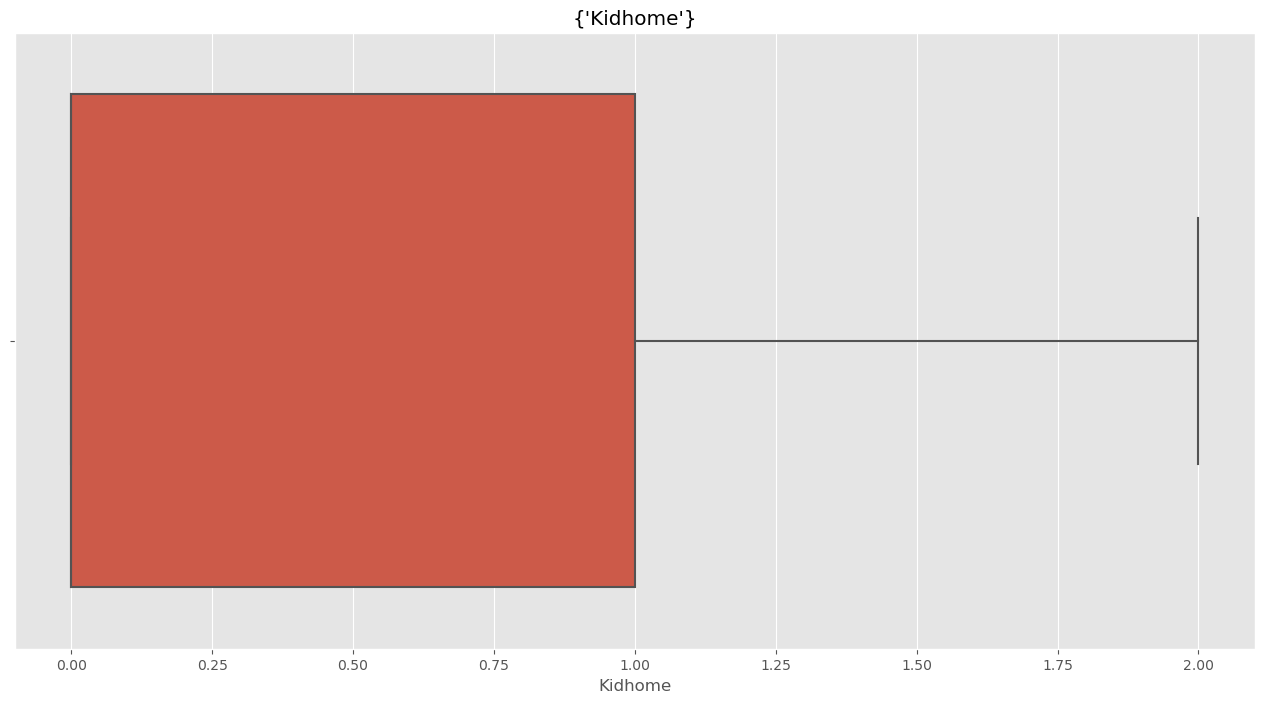

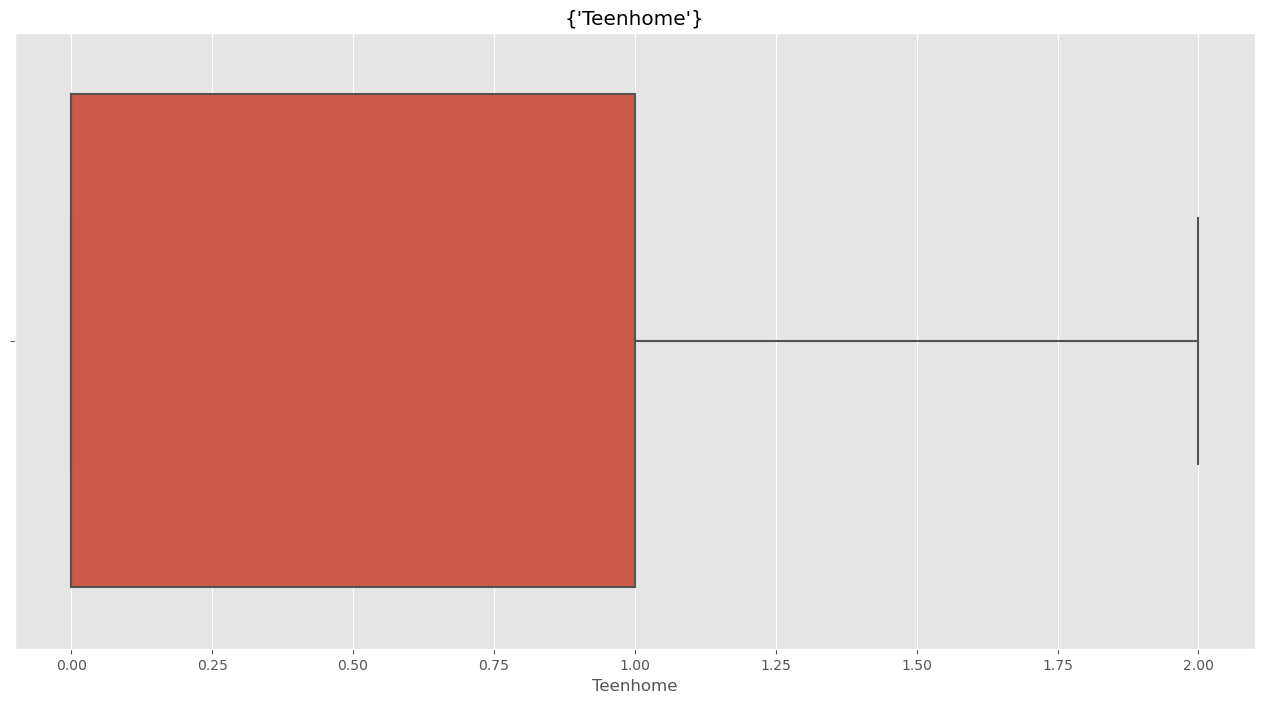

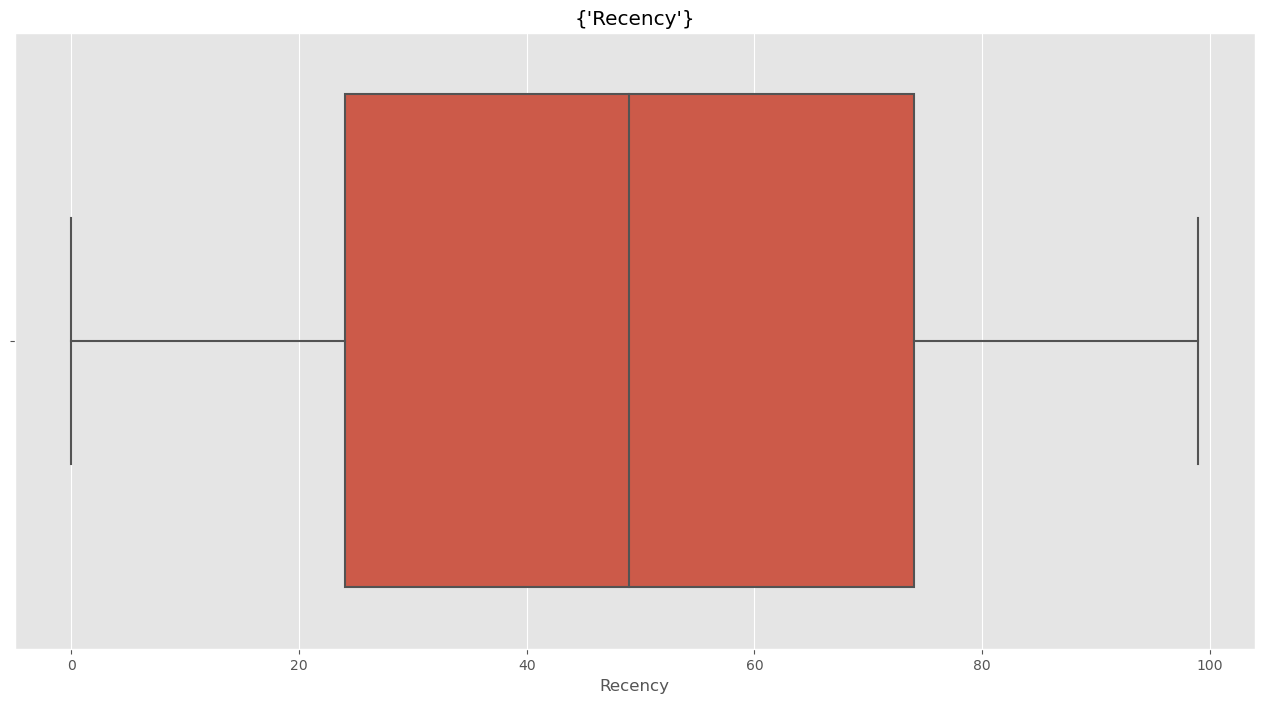

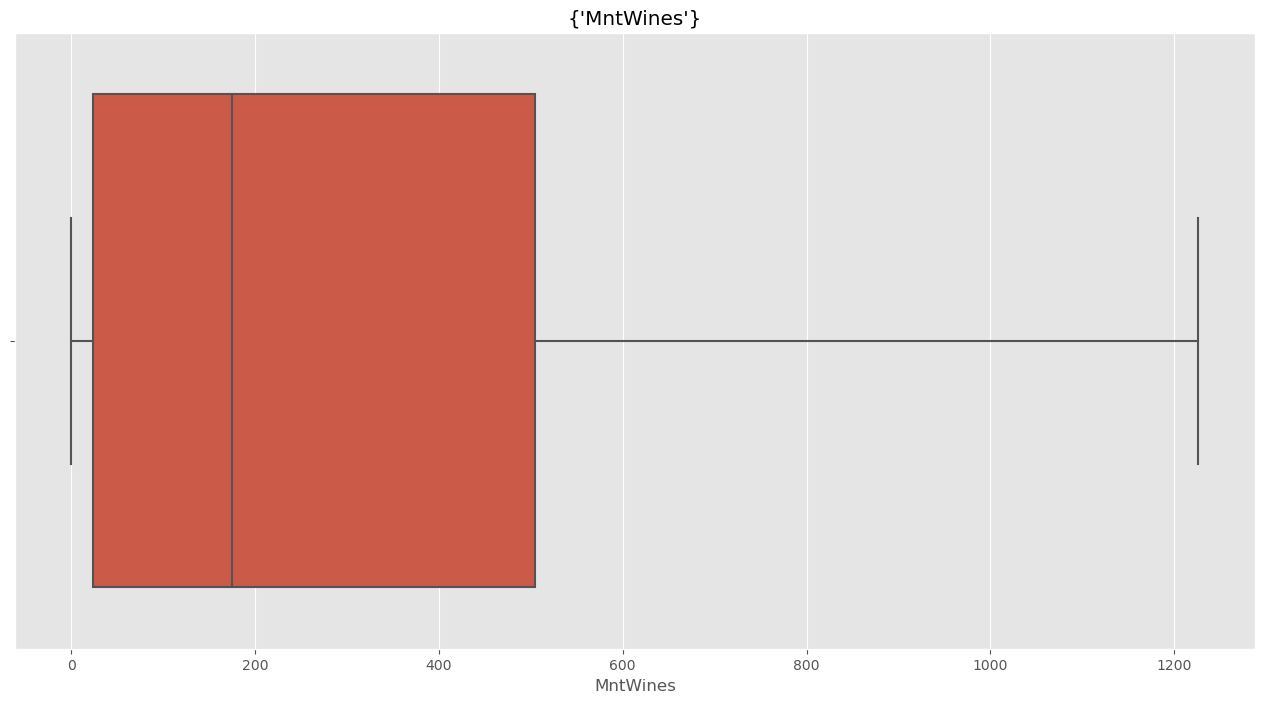

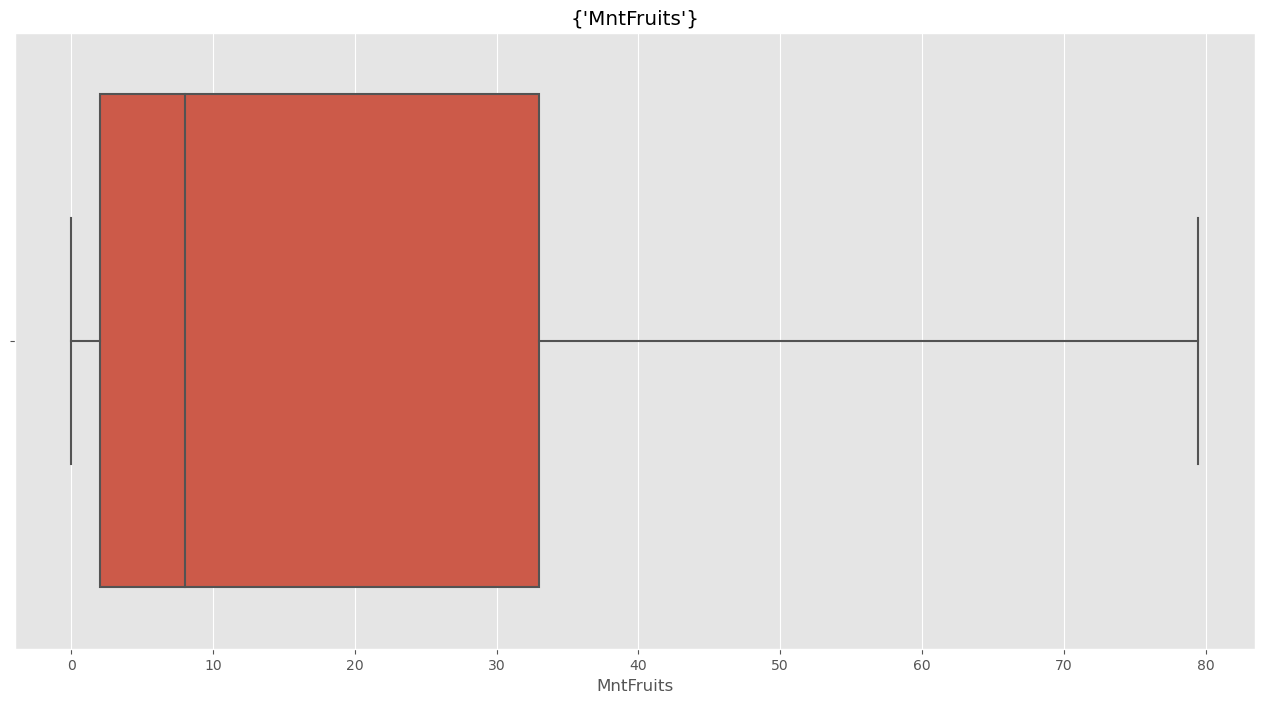

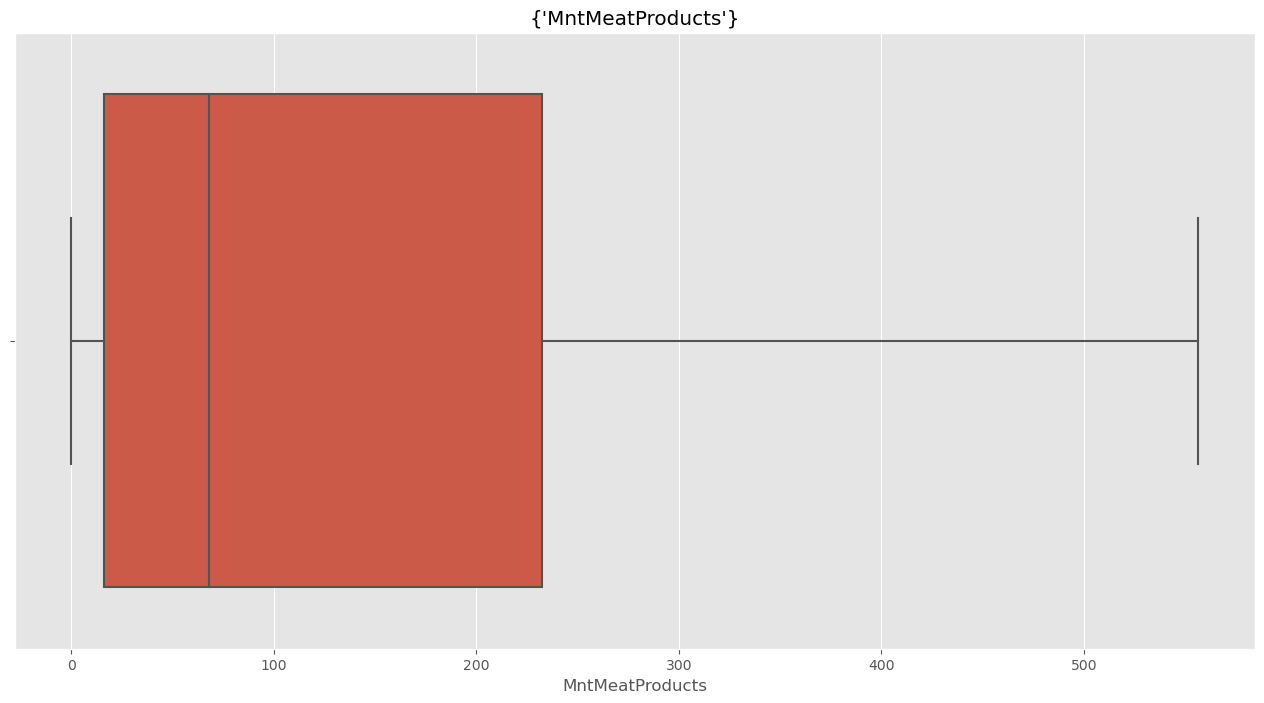

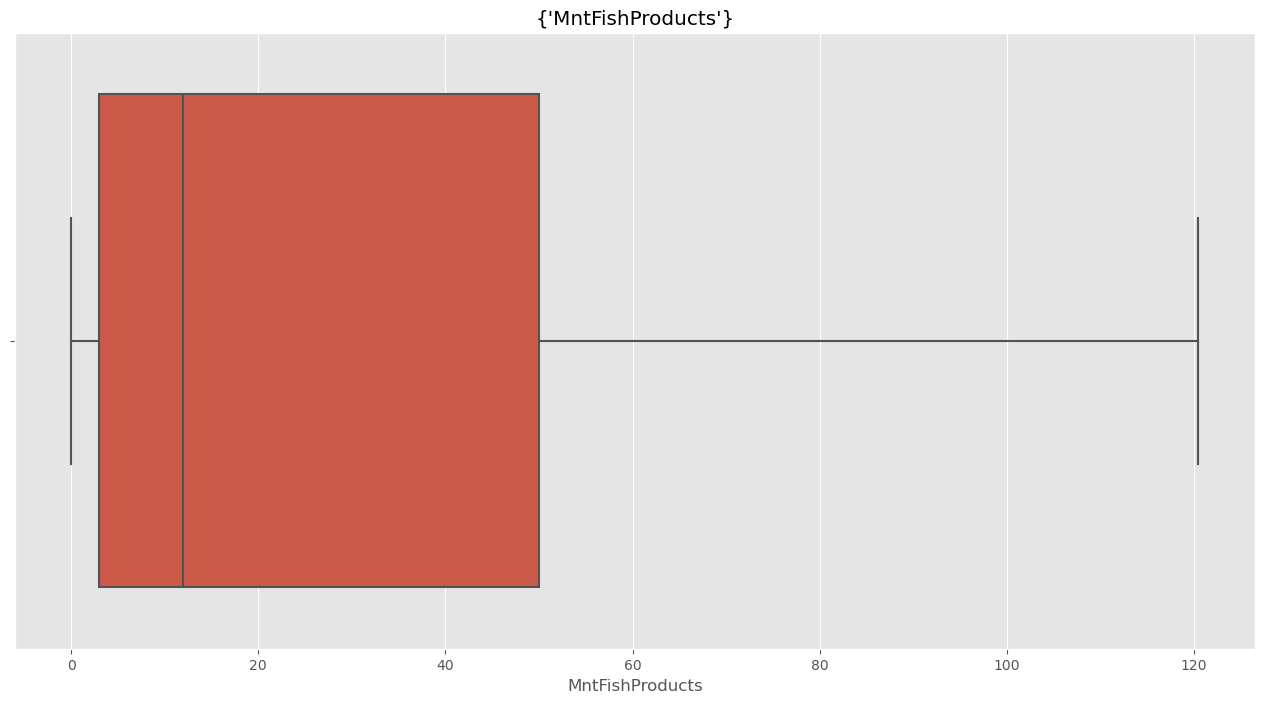

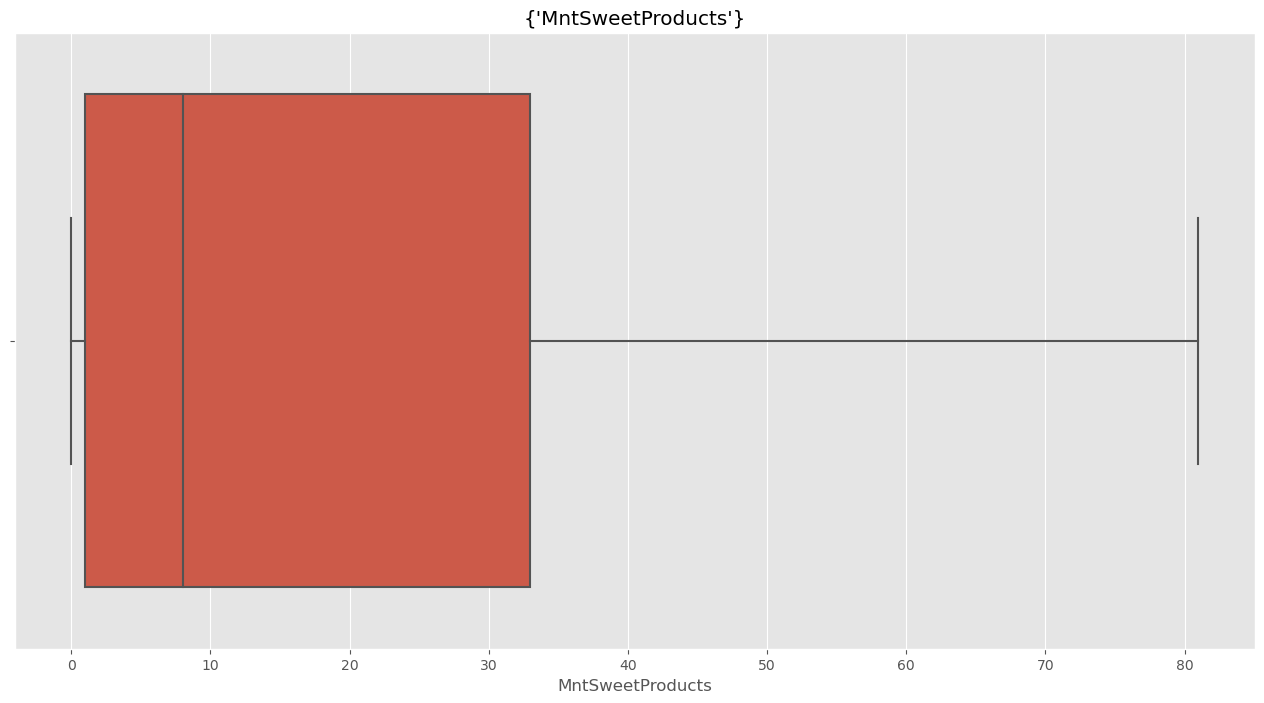

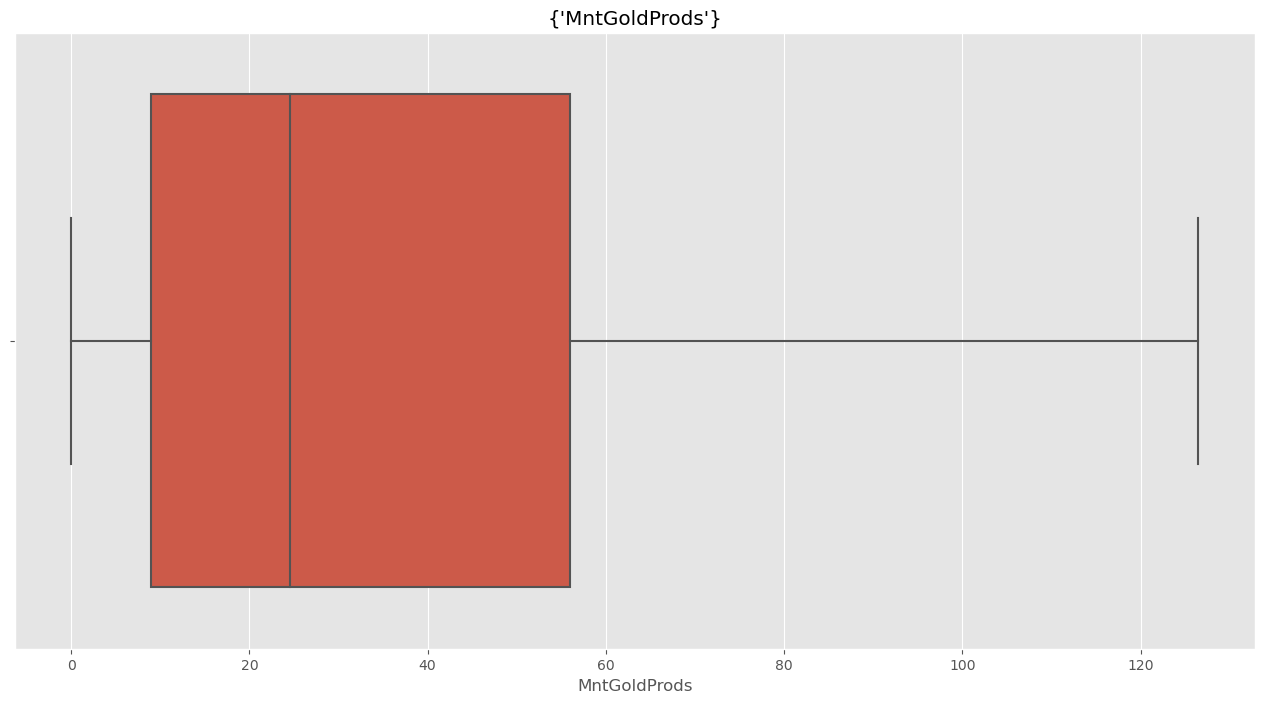

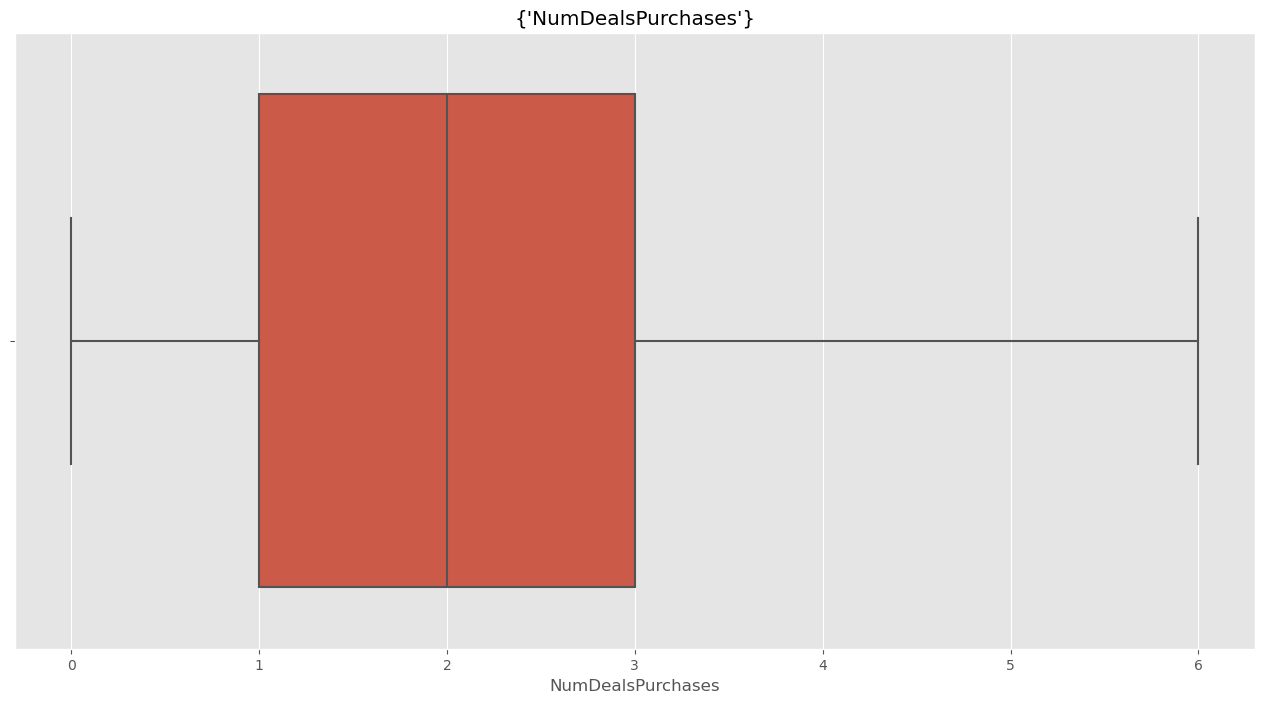

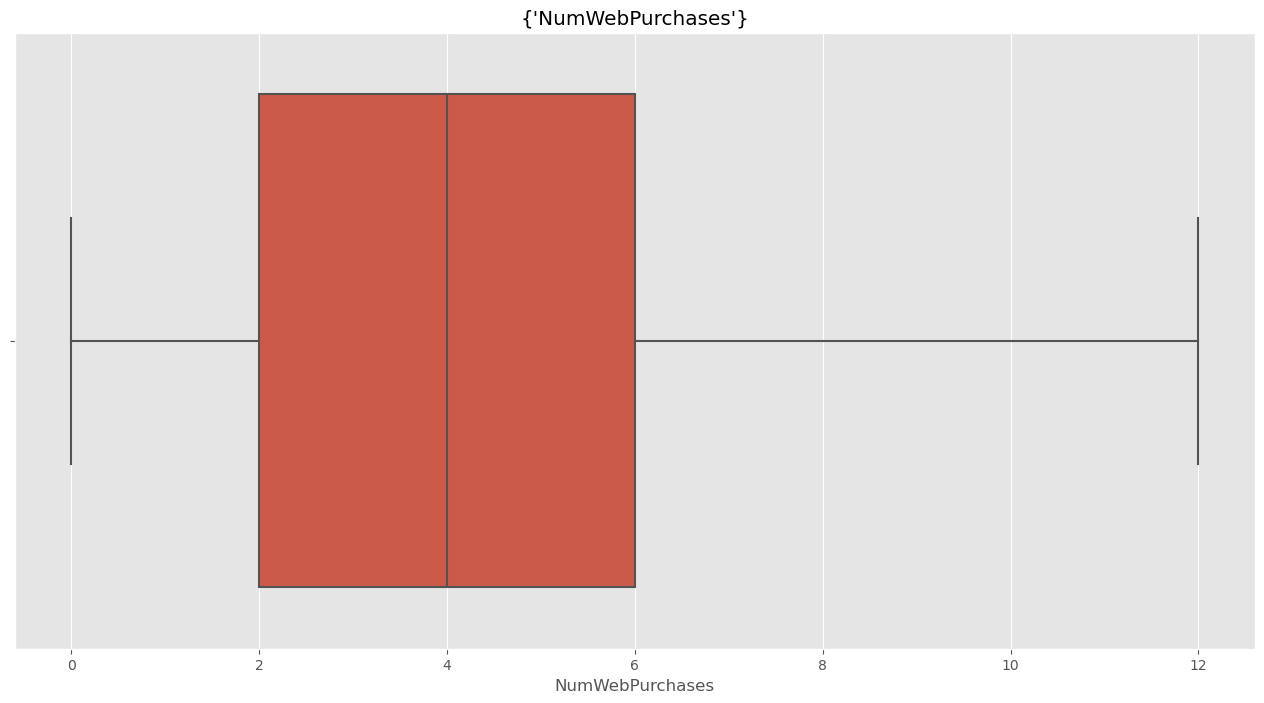

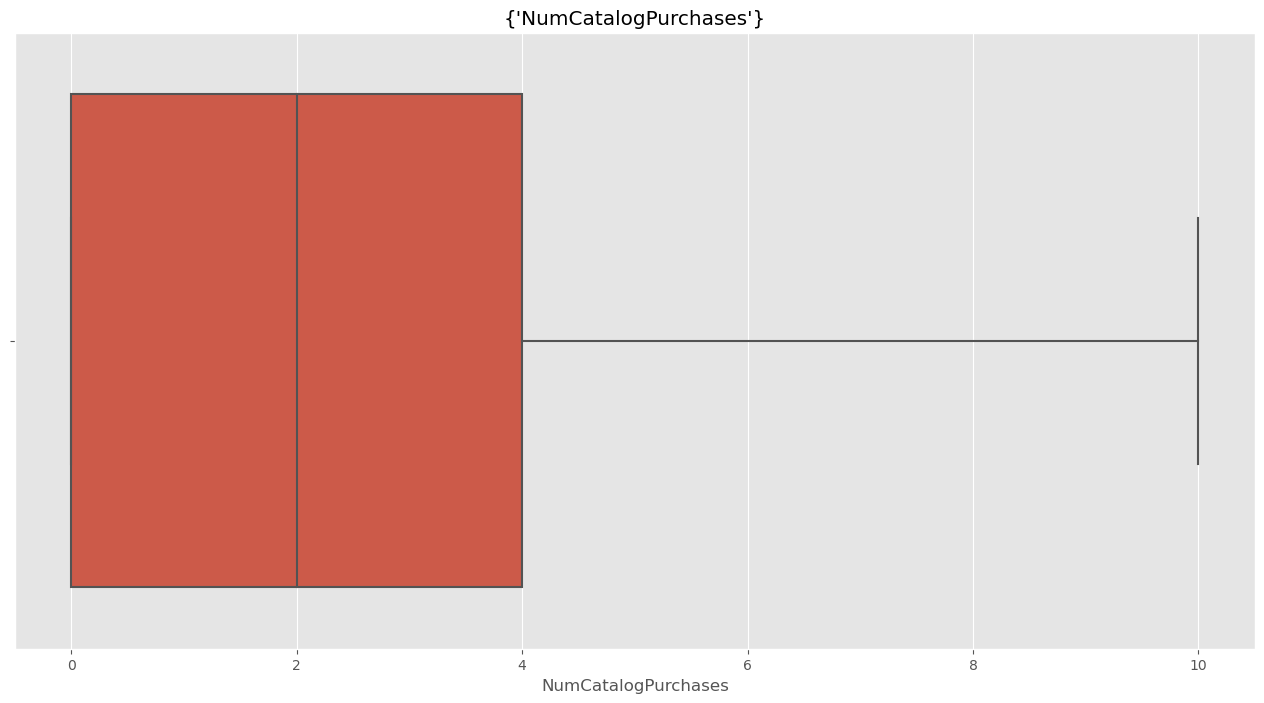

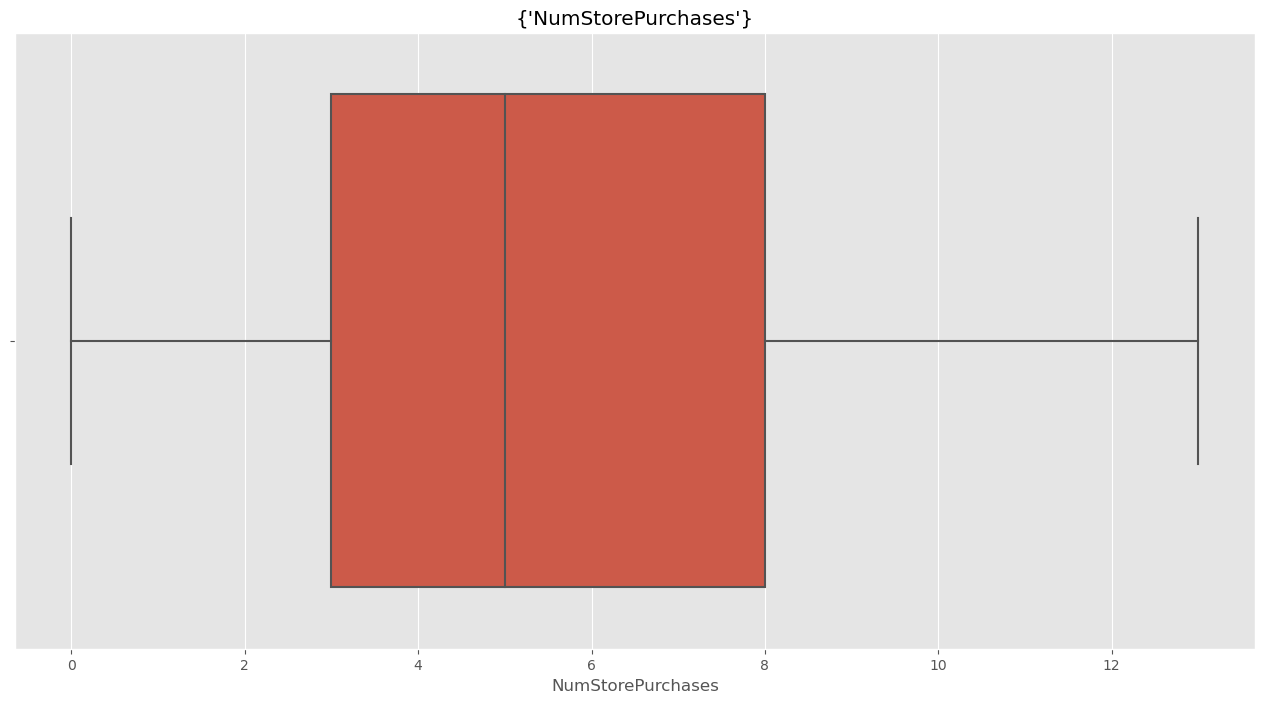

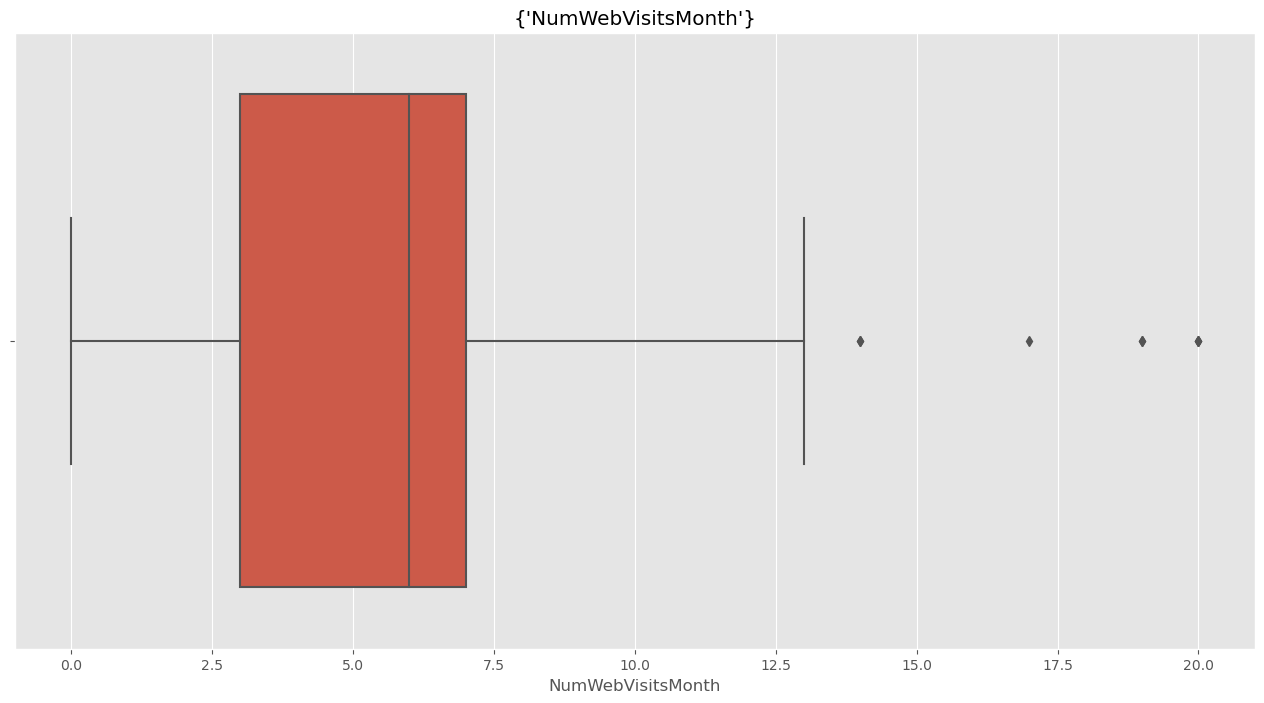

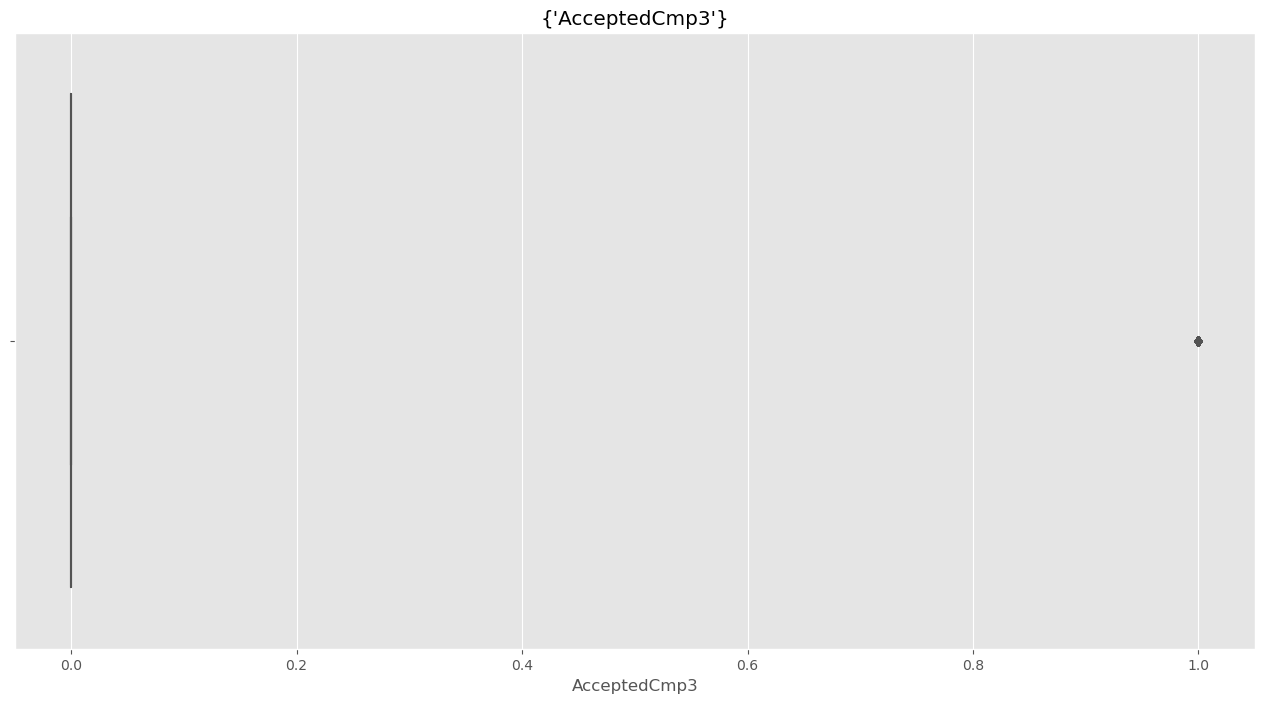

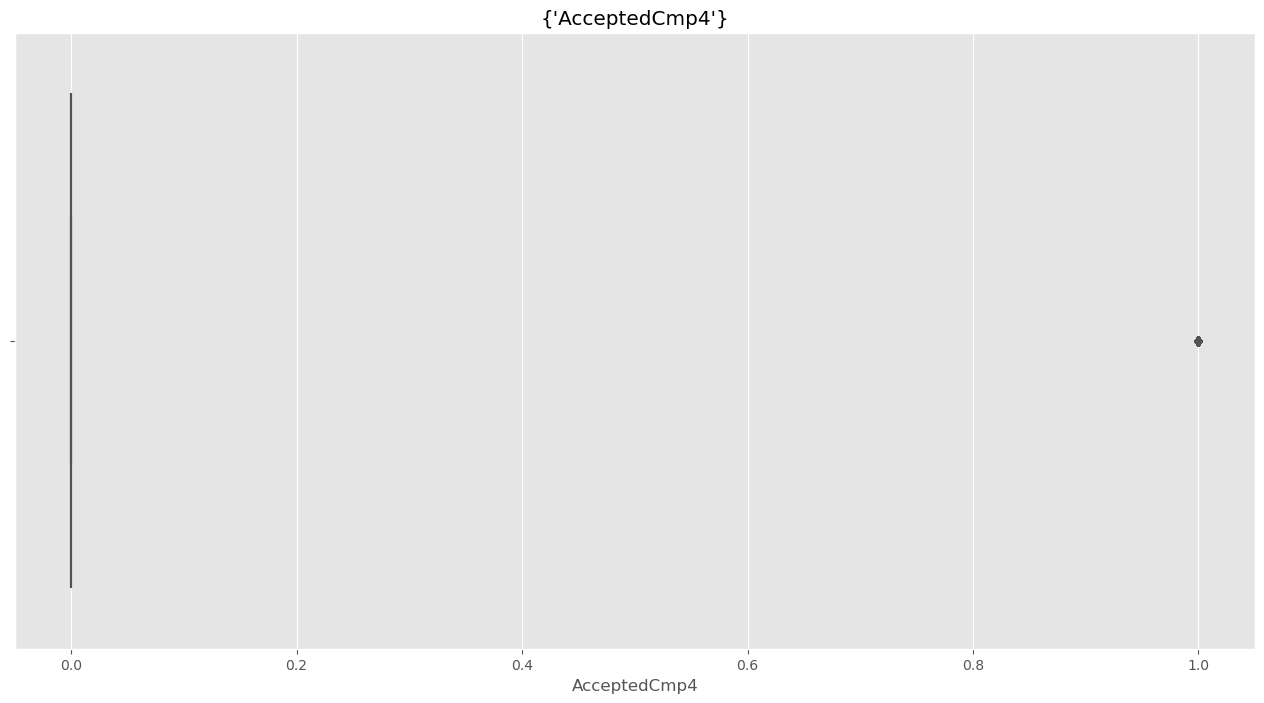

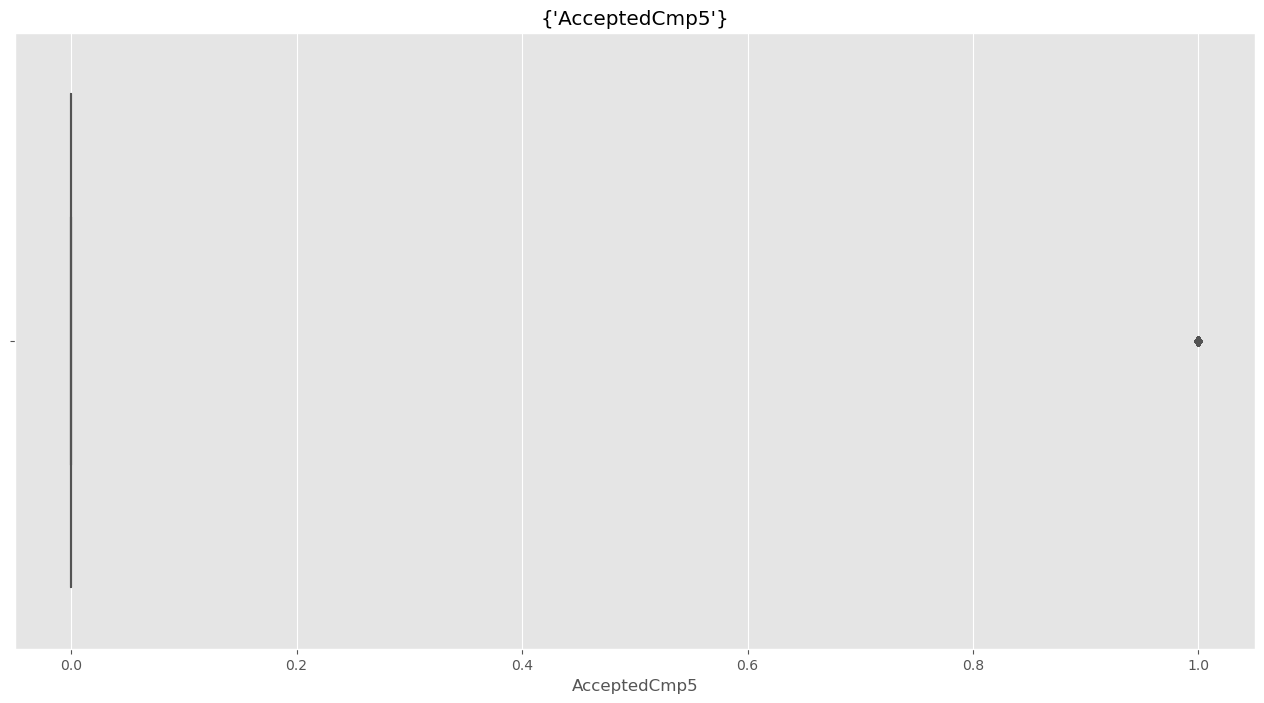

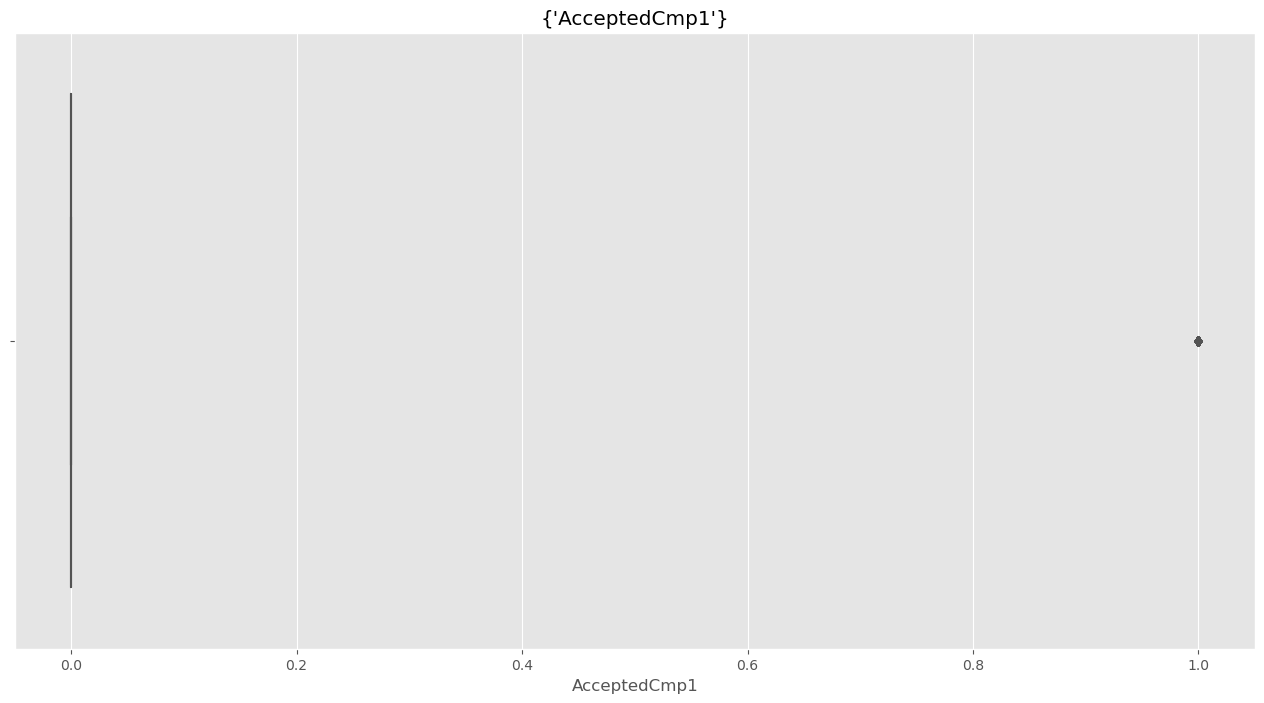

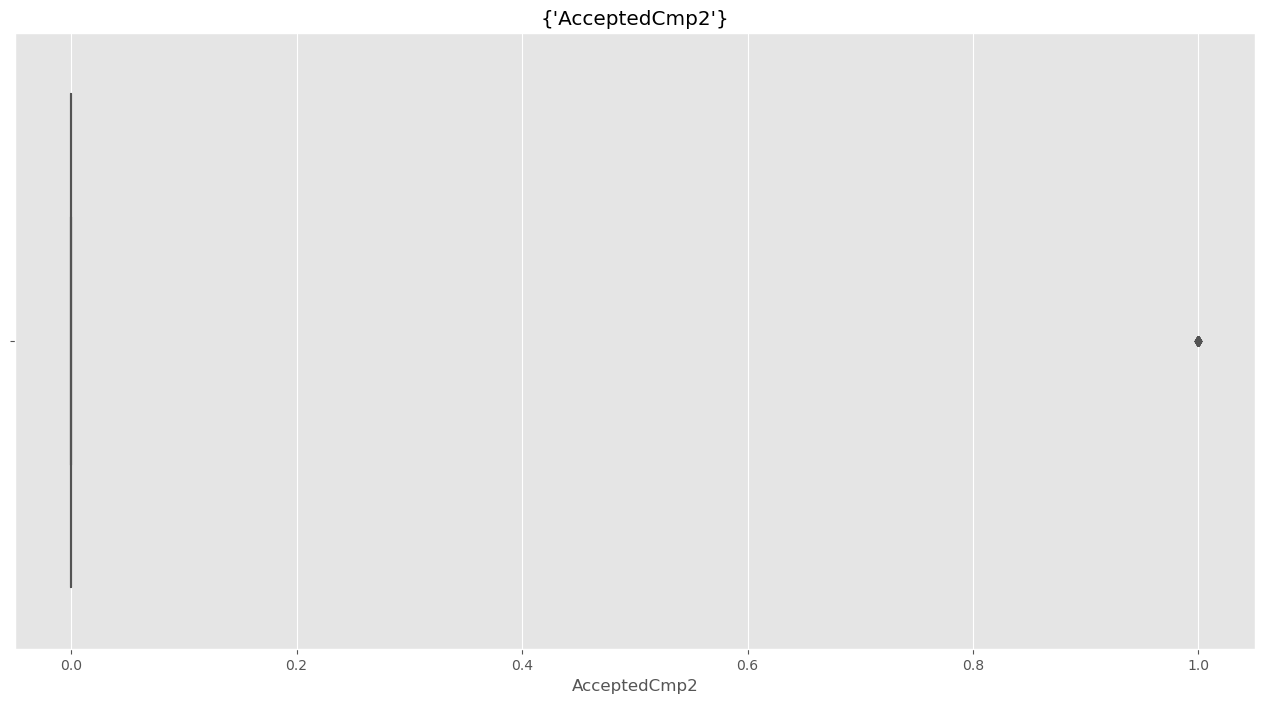

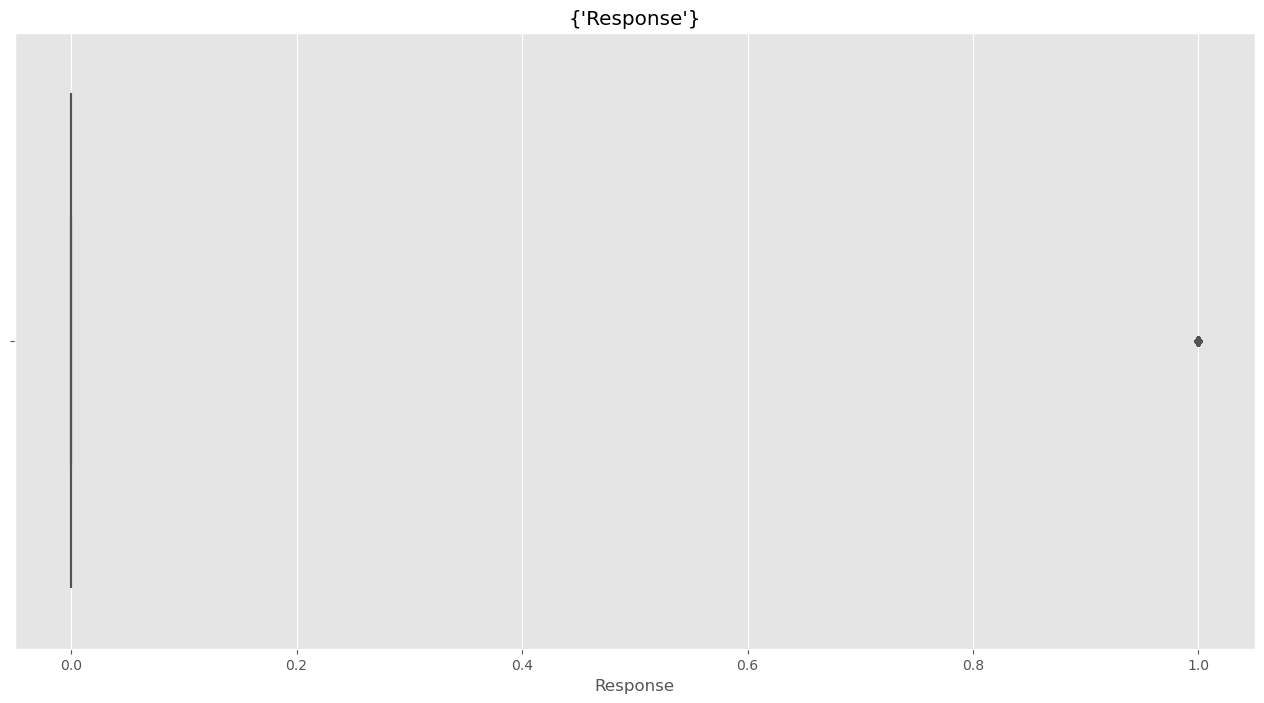

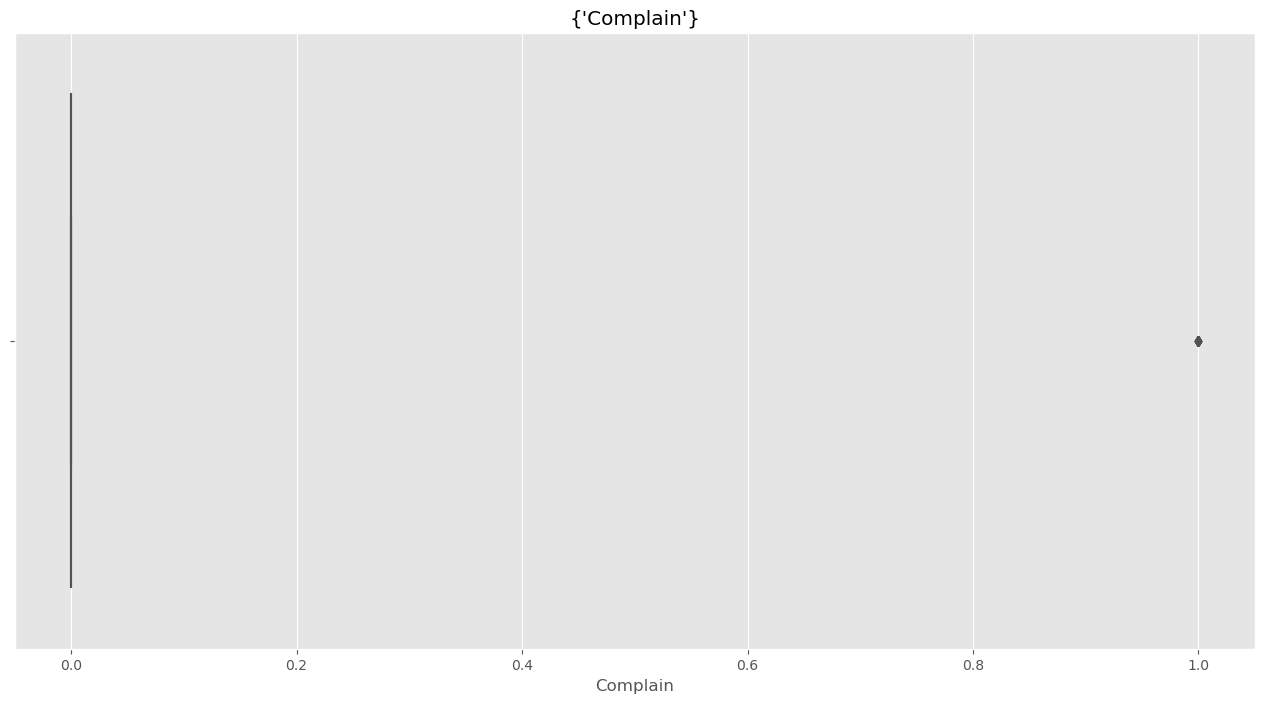

In [64]:
#CHECKING TO CONFIRM CAPPING OF OUTLIERS

for col in numerical_columns:
    sns.boxplot(x=df[col])
    plt.title({col})
    plt.show()

In [65]:
#CREATING AGE COLUMN

Present_year = 2024

In [66]:
df[['Age']] = Present_year - df[['Year_Birth']]

In [67]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/2014,0,189.0,...,1,0,0,0,0,0,1,0,SP,54
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/2014,0,464.0,...,5,0,0,0,0,1,1,0,CA,63
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/2014,0,134.0,...,2,0,0,0,0,0,0,0,US,66
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/2014,0,10.0,...,7,0,0,0,0,0,0,0,AUS,57
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/2014,0,6.0,...,7,1,0,0,0,0,1,0,SP,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/2013,99,372.0,...,4,0,0,0,0,0,0,0,US,48
2212,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/2013,99,5.0,...,8,0,0,0,0,0,0,0,SP,47
2213,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/2012,99,185.0,...,8,0,0,0,0,0,0,0,SP,48
2214,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/2012,99,267.0,...,3,0,0,0,0,0,0,0,IND,46


In [68]:
# RENAMING COLUMNS
df=df.rename(
columns={ 'Dt_Customer':'Cust_reg_date', 'NumDealsPurchases': 'Num_Discount_purchases',
         'Kidhome': 'Num_kids_home', 'Teenhome':'Num_Teens_home'})

In [69]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Num_kids_home,Num_Teens_home,Cust_reg_date,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/2014,0,189.0,...,1,0,0,0,0,0,1,0,SP,54
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/2014,0,464.0,...,5,0,0,0,0,1,1,0,CA,63
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/2014,0,134.0,...,2,0,0,0,0,0,0,0,US,66
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/2014,0,10.0,...,7,0,0,0,0,0,0,0,AUS,57
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/2014,0,6.0,...,7,1,0,0,0,0,1,0,SP,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/2013,99,372.0,...,4,0,0,0,0,0,0,0,US,48
2212,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/2013,99,5.0,...,8,0,0,0,0,0,0,0,SP,47
2213,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/2012,99,185.0,...,8,0,0,0,0,0,0,0,SP,48
2214,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/2012,99,267.0,...,3,0,0,0,0,0,0,0,IND,46


In [71]:
# REMOVING EXTRA SPACES FROM COLUMN NAMES
df.columns = df.columns.str.strip()

In [72]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Num_kids_home,Num_Teens_home,Cust_reg_date,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/2014,0,189.0,...,1,0,0,0,0,0,1,0,SP,54
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/2014,0,464.0,...,5,0,0,0,0,1,1,0,CA,63
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/2014,0,134.0,...,2,0,0,0,0,0,0,0,US,66
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/2014,0,10.0,...,7,0,0,0,0,0,0,0,AUS,57
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/2014,0,6.0,...,7,1,0,0,0,0,1,0,SP,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/2013,99,372.0,...,4,0,0,0,0,0,0,0,US,48
2212,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/2013,99,5.0,...,8,0,0,0,0,0,0,0,SP,47
2213,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/2012,99,185.0,...,8,0,0,0,0,0,0,0,SP,48
2214,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/2012,99,267.0,...,3,0,0,0,0,0,0,0,IND,46


In [73]:
# REPLACING THE $ and , WITH NULL TO CONVERT THE INCOME DATATYPE TO INT
df['Income'] = df['Income'].str.replace('$', '', regex = 'True')
df['Income'] = df['Income'].str.replace('[\,]', "")

C:\Users\PAW PAW\AppData\Local\Temp\ipykernel_16552\3628316665.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Income'] = df['Income'].str.replace('[\,]', "")


In [74]:
df['Income']

0       84835.00 
1       57091.00 
2       67267.00 
3       32474.00 
4       21474.00 
          ...    
2211    66476.00 
2212    31056.00 
2213    46310.00 
2214    65819.00 
2215    94871.00 
Name: Income, Length: 2216, dtype: object

In [75]:
#CONVERTING THE INCOME DATATYPE TO FLOAT BEFORE CONVERTING TO INT
df['Income'] = df['Income'].astype(float)

In [76]:
df['Income']


0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2211    66476.0
2212    31056.0
2213    46310.0
2214    65819.0
2215    94871.0
Name: Income, Length: 2216, dtype: float64

In [77]:
df['Income'] = df['Income'].astype(int)

In [78]:
df['Income']

0       84835
1       57091
2       67267
3       32474
4       21474
        ...  
2211    66476
2212    31056
2213    46310
2214    65819
2215    94871
Name: Income, Length: 2216, dtype: int32

In [79]:
#CONVERTING THE Cust_reg_date datatype to Datetime to extract the year and month

df['Cust_reg_date'] = pd.to_datetime(df['Cust_reg_date'])

In [80]:
#EXTRACTING YEAR AND MONTH FROM THE Cust_Reg_date

df['Year'] = df['Cust_reg_date'].dt.year
df['month_name'] = df['Cust_reg_date'].dt.strftime('%B')

In [81]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Num_kids_home,Num_Teens_home,Cust_reg_date,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Year,month_name
0,1826,1970,Graduation,Divorced,84835,0,0,2014-06-16,0,189.0,...,0,0,0,0,1,0,SP,54,2014,June
1,1,1961,Graduation,Single,57091,0,0,2014-06-15,0,464.0,...,0,0,0,1,1,0,CA,63,2014,June
2,10476,1958,Graduation,Married,67267,0,1,2014-05-13,0,134.0,...,0,0,0,0,0,0,US,66,2014,May
3,1386,1967,Graduation,Together,32474,1,1,2014-05-11,0,10.0,...,0,0,0,0,0,0,AUS,57,2014,May
4,5371,1989,Graduation,Single,21474,1,0,2014-04-08,0,6.0,...,0,0,0,0,1,0,SP,35,2014,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10142,1976,PhD,Divorced,66476,0,1,2013-03-07,99,372.0,...,0,0,0,0,0,0,US,48,2013,March
2212,5263,1977,2n Cycle,Married,31056,1,0,2013-01-22,99,5.0,...,0,0,0,0,0,0,SP,47,2013,January
2213,22,1976,Graduation,Divorced,46310,1,0,2012-12-03,99,185.0,...,0,0,0,0,0,0,SP,48,2012,December
2214,528,1978,Graduation,Married,65819,0,0,2012-11-29,99,267.0,...,0,0,0,0,0,0,IND,46,2012,November


In [82]:
df.corr()

C:\Users\PAW PAW\AppData\Local\Temp\ipykernel_16552\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ID,Year_Birth,Income,Num_kids_home,Num_Teens_home,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Age,Year
ID,1.000000,0.004009,0.013095,0.001736,-0.003030,-0.044376,-0.021126,-0.006438,0.001924,-0.019028,...,-0.007794,-0.035890,-0.023933,-0.007064,-0.018219,-0.014994,-0.021491,0.034154,-0.004009,-0.005071
Year_Birth,0.004009,1.000000,-0.163459,0.236879,-0.358145,-0.016386,-0.164102,-0.031723,-0.061008,-0.054108,...,0.122935,0.061787,-0.068442,0.014509,-0.010829,-0.007307,0.022447,-0.018687,-1.000000,-0.025769
Income,0.013095,-0.163459,1.000000,-0.428669,0.019133,-0.003970,0.582337,0.477692,0.613637,0.478098,...,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,0.133047,-0.027225,0.163459,0.022451
Num_kids_home,0.001736,0.236879,-0.428669,1.000000,-0.039869,0.011492,-0.501882,-0.421730,-0.483936,-0.431856,...,0.447477,0.016066,-0.162026,-0.205305,-0.174163,-0.081868,-0.077909,0.040978,-0.236879,0.052943
Num_Teens_home,-0.003030,-0.358145,0.019133,-0.039869,1.000000,0.013838,0.004833,-0.174525,-0.253139,-0.215464,...,0.131240,-0.042522,0.038376,-0.190791,-0.144855,-0.015521,-0.153901,0.003307,0.358145,-0.009488
Recency,-0.044376,-0.016386,-0.003970,0.011492,0.013838,1.000000,0.015988,0.011264,0.019609,0.000955,...,-0.018564,-0.032257,0.017566,-0.000482,-0.021061,-0.001400,-0.199766,0.013637,0.016386,-0.027064
MntWines,-0.021126,-0.164102,0.582337,-0.501882,0.004833,0.015988,1.000000,0.456118,0.640556,0.456703,...,-0.325862,0.060424,0.368844,0.465804,0.351195,0.195146,0.242550,-0.039590,0.164102,-0.155884
MntFruits,-0.006438,-0.031723,0.477692,-0.421730,-0.174525,0.011264,0.456118,1.000000,0.660170,0.672245,...,-0.459748,0.011222,0.010642,0.223820,0.176357,-0.003855,0.133827,-0.004663,0.031723,-0.079348
MntMeatProducts,0.001924,-0.061008,0.613637,-0.483936,-0.253139,0.019609,0.640556,0.660170,1.000000,0.679253,...,-0.562623,0.018112,0.100679,0.382464,0.325143,0.044920,0.235010,-0.022069,0.061008,-0.082016
MntFishProducts,-0.019028,-0.054108,0.478098,-0.431856,-0.215464,0.000955,0.456703,0.672245,0.679253,1.000000,...,-0.484949,-0.003971,0.022463,0.226892,0.256055,0.015834,0.118716,-0.015560,0.054108,-0.071760


In [83]:
#RENAMING COLUMNS FOR EASY READABILITY 
df=df.rename(
columns={ 'AcceptedCmp1':'Campaign1_effective', 'AcceptedCmp2': 'Campaign2_effective',
         'AcceptedCmp3': 'Campaign3_effective', 'AcceptedCmp4':'Campaign4_effective','AcceptedCmp5':'Campaign5_effective'})


In [84]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Num_kids_home,Num_Teens_home,Cust_reg_date,Recency,MntWines,...,Campaign4_effective,Campaign5_effective,Campaign1_effective,Campaign2_effective,Response,Complain,Country,Age,Year,month_name
0,1826,1970,Graduation,Divorced,84835,0,0,2014-06-16,0,189.0,...,0,0,0,0,1,0,SP,54,2014,June
1,1,1961,Graduation,Single,57091,0,0,2014-06-15,0,464.0,...,0,0,0,1,1,0,CA,63,2014,June
2,10476,1958,Graduation,Married,67267,0,1,2014-05-13,0,134.0,...,0,0,0,0,0,0,US,66,2014,May
3,1386,1967,Graduation,Together,32474,1,1,2014-05-11,0,10.0,...,0,0,0,0,0,0,AUS,57,2014,May
4,5371,1989,Graduation,Single,21474,1,0,2014-04-08,0,6.0,...,0,0,0,0,1,0,SP,35,2014,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10142,1976,PhD,Divorced,66476,0,1,2013-03-07,99,372.0,...,0,0,0,0,0,0,US,48,2013,March
2212,5263,1977,2n Cycle,Married,31056,1,0,2013-01-22,99,5.0,...,0,0,0,0,0,0,SP,47,2013,January
2213,22,1976,Graduation,Divorced,46310,1,0,2012-12-03,99,185.0,...,0,0,0,0,0,0,SP,48,2012,December
2214,528,1978,Graduation,Married,65819,0,0,2012-11-29,99,267.0,...,0,0,0,0,0,0,IND,46,2012,November


In [85]:

##CONVERT THE CAMPAIGN_EFFECTIVE COLUMNS DATATYPES TO STRING

df['Campaign1_effective'] = df['Campaign1_effective'].astype(str)
df['Campaign2_effective'] = df['Campaign2_effective'].astype(str)
df['Campaign3_effective'] = df['Campaign3_effective'].astype(str)
df['Campaign4_effective'] = df['Campaign4_effective'].astype(str)
df['Campaign5_effective'] = df['Campaign5_effective'].astype(str)
df['Response'] = df['Response'].astype(str)
df['Complain'] = df['Complain'].astype(str)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      2216 non-null   int64         
 1   Year_Birth              2216 non-null   int64         
 2   Education               2216 non-null   object        
 3   Marital_Status          2216 non-null   object        
 4   Income                  2216 non-null   int32         
 5   Num_kids_home           2216 non-null   int64         
 6   Num_Teens_home          2216 non-null   int64         
 7   Cust_reg_date           2216 non-null   datetime64[ns]
 8   Recency                 2216 non-null   int64         
 9   MntWines                2216 non-null   float64       
 10  MntFruits               2216 non-null   float64       
 11  MntMeatProducts         2216 non-null   float64       
 12  MntFishProducts         2216 non-null   float64 

In [87]:
#REPLACING 1 WITH YES AND 0 WITH NO IN THE CAMPAIGN_EFFECTIVE COLUMNS

df['Campaign1_effective'] = df['Campaign1_effective'].replace({'1': 'Yes', '0': 'No'})
df['Campaign2_effective'] = df['Campaign2_effective'].replace({'1': 'Yes', '0': 'No'})
df['Campaign3_effective'] = df['Campaign3_effective'].replace({'1': 'Yes', '0': 'No'})
df['Campaign4_effective'] = df['Campaign4_effective'].replace({'1': 'Yes', '0': 'No'})
df['Campaign5_effective'] = df['Campaign5_effective'].replace({'1': 'Yes', '0': 'No'})
df['Response'] = df['Response'].replace({'1': 'Yes', '0': 'No'})
df['Complain'] = df['Complain'].replace({'1': 'Yes', '0': 'No'})


In [88]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Num_kids_home,Num_Teens_home,Cust_reg_date,Recency,MntWines,...,Campaign4_effective,Campaign5_effective,Campaign1_effective,Campaign2_effective,Response,Complain,Country,Age,Year,month_name
0,1826,1970,Graduation,Divorced,84835,0,0,2014-06-16,0,189.0,...,No,No,No,No,Yes,No,SP,54,2014,June
1,1,1961,Graduation,Single,57091,0,0,2014-06-15,0,464.0,...,No,No,No,Yes,Yes,No,CA,63,2014,June
2,10476,1958,Graduation,Married,67267,0,1,2014-05-13,0,134.0,...,No,No,No,No,No,No,US,66,2014,May
3,1386,1967,Graduation,Together,32474,1,1,2014-05-11,0,10.0,...,No,No,No,No,No,No,AUS,57,2014,May
4,5371,1989,Graduation,Single,21474,1,0,2014-04-08,0,6.0,...,No,No,No,No,Yes,No,SP,35,2014,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10142,1976,PhD,Divorced,66476,0,1,2013-03-07,99,372.0,...,No,No,No,No,No,No,US,48,2013,March
2212,5263,1977,2n Cycle,Married,31056,1,0,2013-01-22,99,5.0,...,No,No,No,No,No,No,SP,47,2013,January
2213,22,1976,Graduation,Divorced,46310,1,0,2012-12-03,99,185.0,...,No,No,No,No,No,No,SP,48,2012,December
2214,528,1978,Graduation,Married,65819,0,0,2012-11-29,99,267.0,...,No,No,No,No,No,No,IND,46,2012,November


In [223]:
#Check the number of unique value from all of the object datatype

df.select_dtypes(include='object').nunique()

Education          5
Marital_Status     8
Response           2
Complain           2
Country            8
month_name        12
Age_grouped        4
dtype: int64

IndentationError: unexpected indent (3805835315.py, line 13)

# Exploratory data analysis

In [89]:
#GENERATING DESCRIPTIVE STATISTICS

df.describe()

,ID,Year_Birth,Income,Num_kids_home,Num_Teens_home,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Num_Discount_purchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Year
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.867329,52247.251354,0.441787,0.505415,49.012635,303.272789,21.569043,151.268389,32.189079,21.950812,39.497518,2.216155,4.067690,2.632671,5.800993,5.319043,55.132671,2013.028430
std,3249.376275,11.770856,25173.076661,0.536896,0.544181,28.948352,331.811951,26.923702,179.016404,40.411139,27.539044,39.874746,1.536238,2.645994,2.736675,3.250785,2.425359,11.770856,0.685618
min,0.000000,1932.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,2012.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,47.000000,2013.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,54.000000,2013.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,65.000000,2013.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1226.500000,79.500000,556.625000,120.500000,81.000000,126.500000,6.000000,12.000000,10.000000,13.000000,20.000000,92.000000,2014.000000


In [90]:
#CREATING VISUALIZATIONS TO SHOW RELATIONSHIPS BETWEEN VARIABLES

correlation = df.corr()

C:\Users\PAW PAW\AppData\Local\Temp\ipykernel_16552\3395414406.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


In [91]:
correlation

,ID,Year_Birth,Income,Num_kids_home,Num_Teens_home,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Num_Discount_purchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Year
ID,1.000000,0.004009,0.013095,0.001736,-0.003030,-0.044376,-0.021126,-0.006438,0.001924,-0.019028,-0.010899,-0.026843,-0.034962,-0.021974,0.000395,-0.013070,-0.007794,-0.004009,-0.005071
Year_Birth,0.004009,1.000000,-0.163459,0.236879,-0.358145,-0.016386,-0.164102,-0.031723,-0.061008,-0.054108,-0.025874,-0.066470,-0.072939,-0.158566,-0.140501,-0.134109,0.122935,-1.000000,-0.025769
Income,0.013095,-0.163459,1.000000,-0.428669,0.019133,-0.003970,0.582337,0.477692,0.613637,0.478098,0.480148,0.360192,-0.114962,0.403123,0.599316,0.529362,-0.553088,0.163459,0.022451
Num_kids_home,0.001736,0.236879,-0.428669,1.000000,-0.039869,0.011492,-0.501882,-0.421730,-0.483936,-0.431856,-0.429032,-0.380421,0.227367,-0.379850,-0.533530,-0.501349,0.447477,-0.236879,0.052943
Num_Teens_home,-0.003030,-0.358145,0.019133,-0.039869,1.000000,0.013838,0.004833,-0.174525,-0.253139,-0.215464,-0.171441,-0.016961,0.435220,0.163100,-0.112345,0.049737,0.131240,0.358145,-0.009488
Recency,-0.044376,-0.016386,-0.003970,0.011492,0.013838,1.000000,0.015988,0.011264,0.019609,0.000955,0.027680,0.017157,0.008791,-0.001337,0.029065,-0.000434,-0.018564,0.016386,-0.027064
MntWines,-0.021126,-0.164102,0.582337,-0.501882,0.004833,0.015988,1.000000,0.456118,0.640556,0.456703,0.461539,0.434035,-0.001565,0.585316,0.689392,0.648922,-0.325862,0.164102,-0.155884
MntFruits,-0.006438,-0.031723,0.477692,-0.421730,-0.174525,0.011264,0.456118,1.000000,0.660170,0.672245,0.673269,0.472677,-0.137620,0.375250,0.578396,0.525817,-0.459748,0.031723,-0.079348
MntMeatProducts,0.001924,-0.061008,0.613637,-0.483936,-0.253139,0.019609,0.640556,0.660170,1.000000,0.679253,0.655863,0.459710,-0.197064,0.388777,0.753131,0.566876,-0.562623,0.061008,-0.082016
MntFishProducts,-0.019028,-0.054108,0.478098,-0.431856,-0.215464,0.000955,0.456703,0.672245,0.679253,1.000000,0.691949,0.482715,-0.169352,0.360498,0.622889,0.514843,-0.484949,0.054108,-0.071760


C:\Users\PAW PAW\AppData\Local\Temp\ipykernel_16552\4266159522.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


Text(0.5, 1.0, 'CORRELATION MAP')

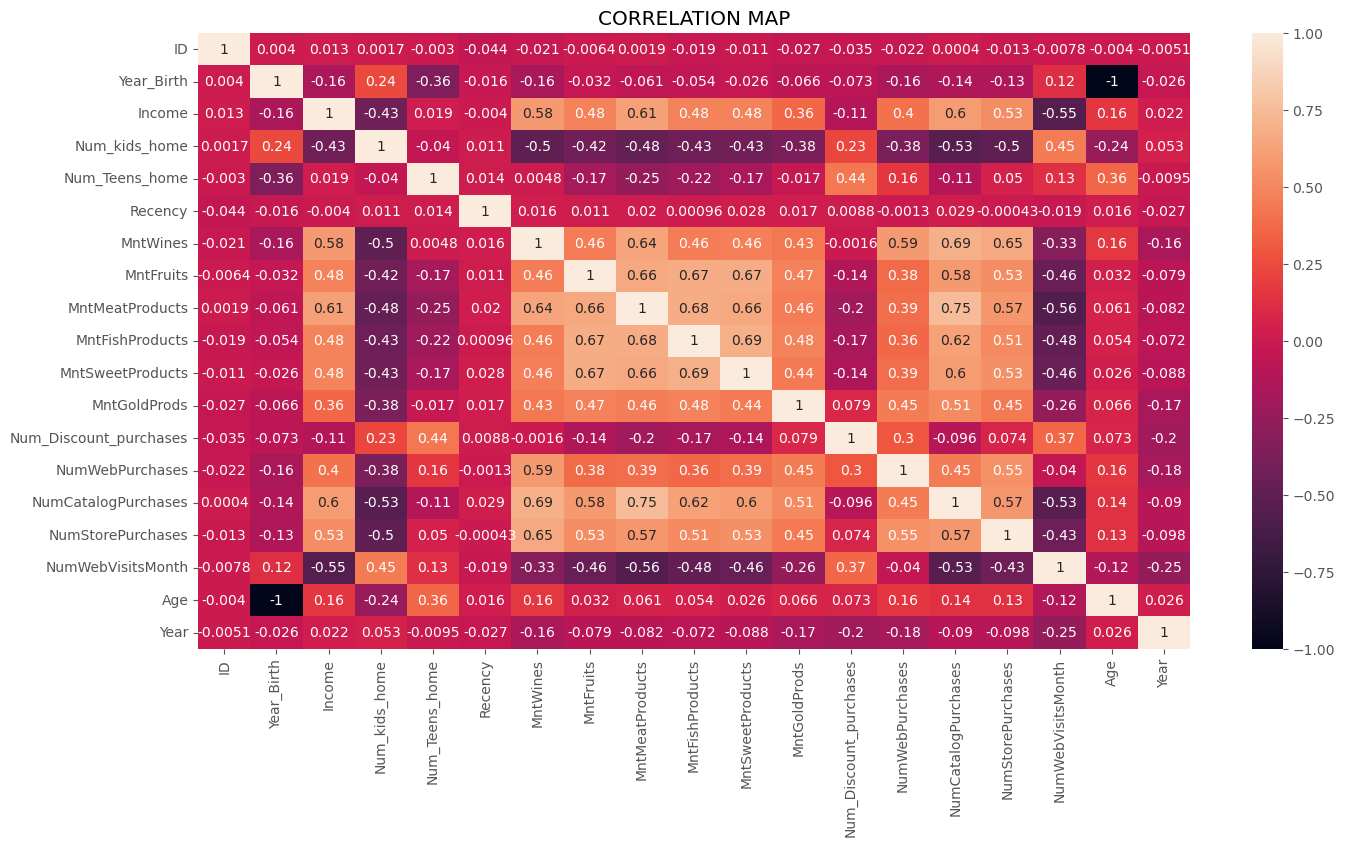

In [92]:
sns.heatmap(df.corr(),annot=True)
plt.title('CORRELATION MAP')

In [93]:
df.sort_values(by=['Income'], inplace=False, ascending=False)

,ID,Year_Birth,Education,Marital_Status,Income,Num_kids_home,Num_Teens_home,Cust_reg_date,Recency,MntWines,...,Campaign4_effective,Campaign5_effective,Campaign1_effective,Campaign2_effective,Response,Complain,Country,Age,Year,month_name
522,9432,1977,Graduation,Together,666666,1,0,2013-06-02,23,9.0,...,No,No,No,No,No,No,SA,47,2013,June
725,1503,1976,PhD,Together,162397,1,1,2013-06-03,31,85.0,...,No,No,No,No,No,No,SP,48,2013,June
493,1501,1982,PhD,Married,160803,0,0,2012-08-04,21,55.0,...,No,No,No,No,No,No,US,42,2012,August
847,5336,1971,Master,Together,157733,1,0,2013-06-04,37,39.0,...,No,No,No,No,No,No,SP,53,2013,June
2180,8475,1973,PhD,Married,157243,0,1,2014-03-01,98,20.0,...,No,No,No,No,No,No,IND,51,2014,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,10311,1969,Graduation,Married,4428,0,1,2013-10-05,0,16.0,...,No,No,No,No,No,No,SP,55,2013,October
657,9931,1963,PhD,Married,4023,1,1,2014-06-23,29,5.0,...,No,No,No,No,No,No,SP,61,2014,June
1280,11110,1973,Graduation,Single,3502,1,0,2013-04-13,56,2.0,...,No,No,No,No,No,No,IND,51,2013,April
954,5376,1979,Graduation,Married,2447,1,0,2013-01-06,42,1.0,...,No,No,No,No,No,No,US,45,2013,January


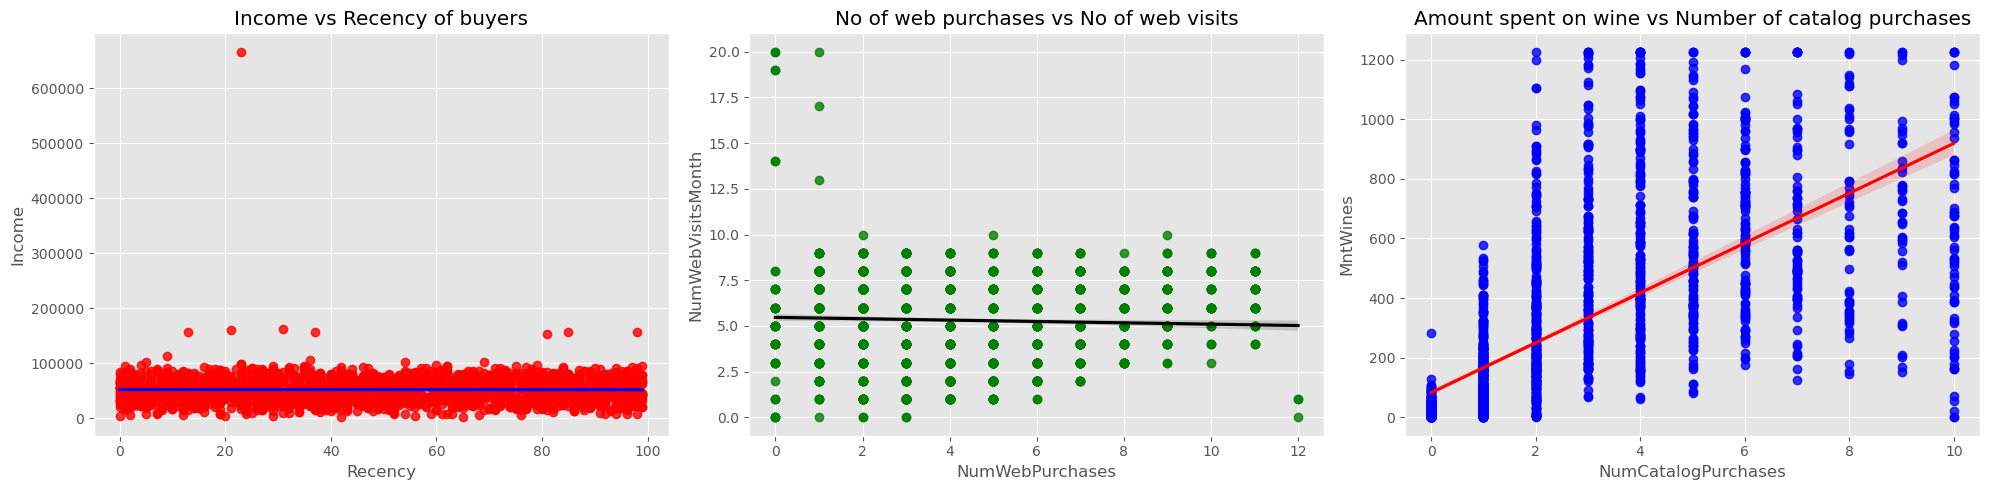

In [94]:
plt.figure(figsize=(20,5))
ax=plt.subplot(1,3,1)
sns.regplot(data=df, x = 'Recency', y= 'Income', color = 'red', ax=ax, line_kws = {"color":"blue"})
plt.title('Income vs Recency of buyers')

ax=plt.subplot(1,3,2)
sns.regplot(data=df, x = 'NumWebPurchases', y= 'NumWebVisitsMonth', color = 'green', ax=ax, line_kws = {"color":"black"})
plt.title('No of web purchases vs No of web visits')

ax=plt.subplot(1,3,3)
sns.regplot(data=df, x = 'NumCatalogPurchases', y= 'MntWines', color = 'blue', ax=ax,  line_kws = {"color":"red"})
plt.title('Amount spent on wine vs Number of catalog purchases')



plt.tight_layout()
plt.show()

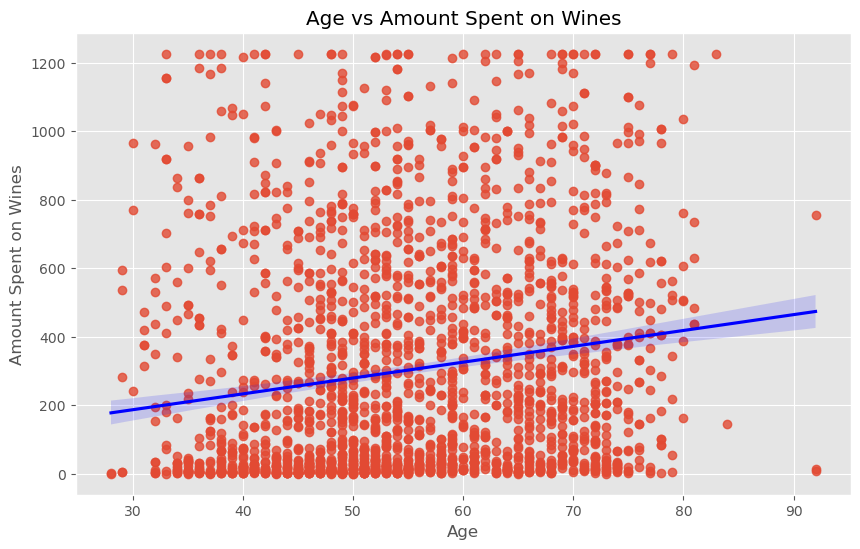

In [95]:
#VISUALIZING RELATIONSHIPS BETWEEN AGE AND AMOUNT SPENT ON WINE

plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='MntWines', data=df, line_kws={'color':'blue'})
plt.title('Age vs Amount Spent on Wines')
plt.xlabel('Age')
plt.ylabel('Amount Spent on Wines')
plt.show()

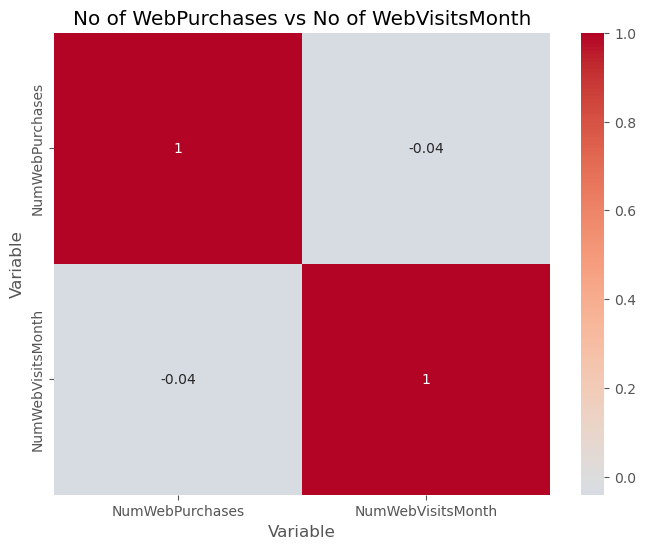

In [252]:


# Calculate the correlation matrix

correlation_matrix = df[['NumWebPurchases', 'NumWebVisitsMonth']].corr()

# Create a heatmap for the correlation matrix

plt.figure(figsize=(8, 6))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('No of WebPurchases vs No of WebVisitsMonth')
plt.xlabel('Variable')
plt.ylabel('Variable')
plt.show()

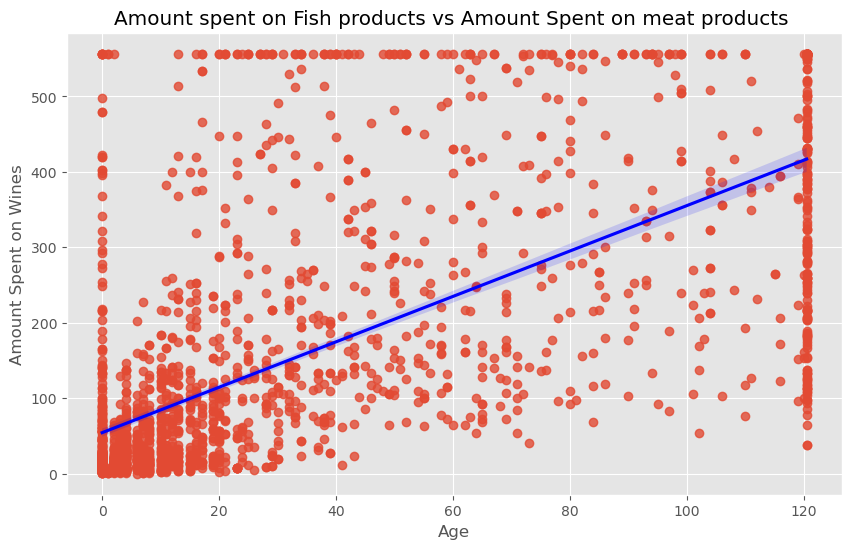

In [259]:
#VISUALIZING RELATIONSHIPS BETWEEN AGE AND AMOUNT SPENT ON WINE

plt.figure(figsize=(10, 6))
sns.regplot(x='MntFishProducts', y='MntMeatProducts', data=df, line_kws={'color':'blue'})
plt.title('Amount spent on Fish products vs Amount Spent on meat products ')
plt.xlabel('Age')
plt.ylabel('Amount Spent on Wines')
plt.show()

# IDENTIFY KEY TRENDS AND PATTERNS

In [96]:
group_id_by_years = df.groupby('Year')['ID'].count().reset_index(name ='Count of customers')

In [97]:
group_id_by_years

,Year,Count of customers
0,2012,490
1,2013,1173
2,2014,553


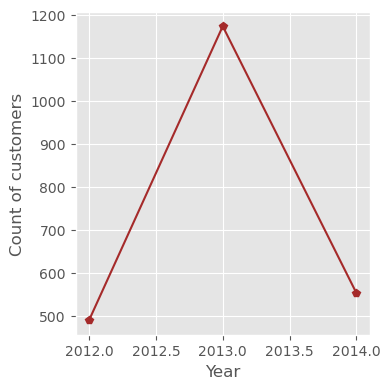

In [98]:
#VISUALIZATIONS SHOWING THE YEARLY TRENDS IN CUSTOMER REGISTRATION
plt.figure(figsize=(4, 4))
plt.plot(group_id_by_years['Year'],group_id_by_years['Count of customers'], color = 'brown', marker='p', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Count of customers')
plt.tight_layout()
plt.show()


In [99]:
df['Age'].nunique()

57

In [100]:
df['Age'].min()

28

In [101]:
df['Age'].max()

92

Text(0, 0.5, 'Frequency')

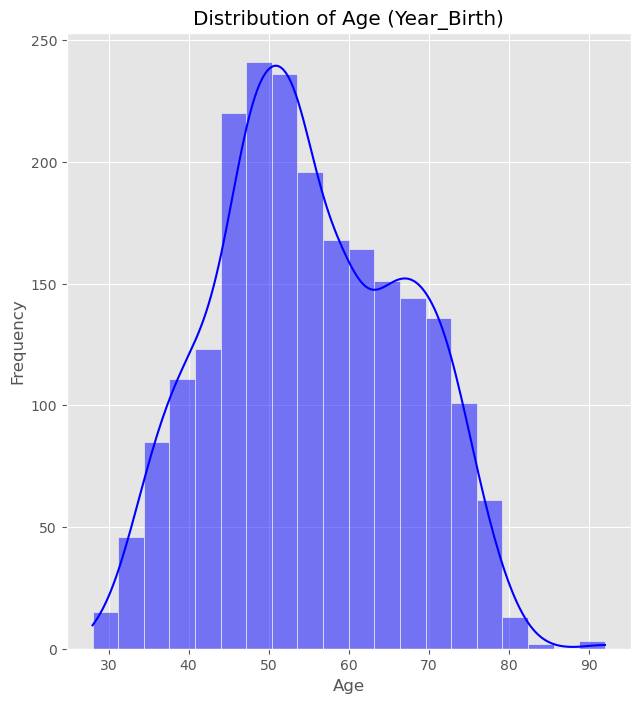

In [239]:
# Create a histogram for Age

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', bins=20, kde=True, color='blue')  
plt.title('Distribution of Age (Year_Birth)')
plt.xlabel('Age')
plt.ylabel('Frequency')


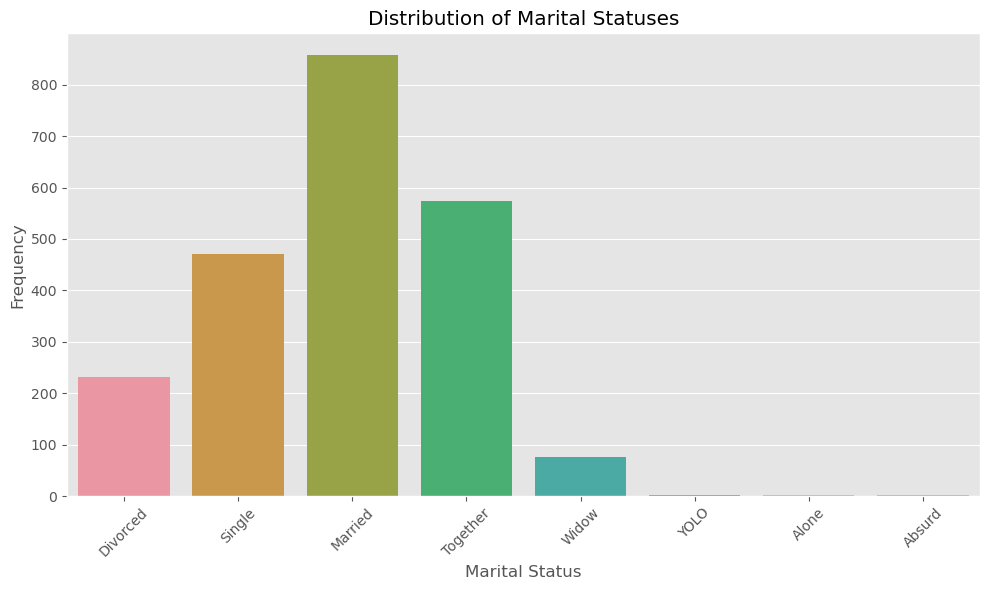

In [245]:
# Create a bar chart for the distribution of "Marital" statuses

plt.figure(figsize=(10, 6))  
sns.countplot(data=df, x='Marital_Status')

plt.title('Distribution of Marital Statuses')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

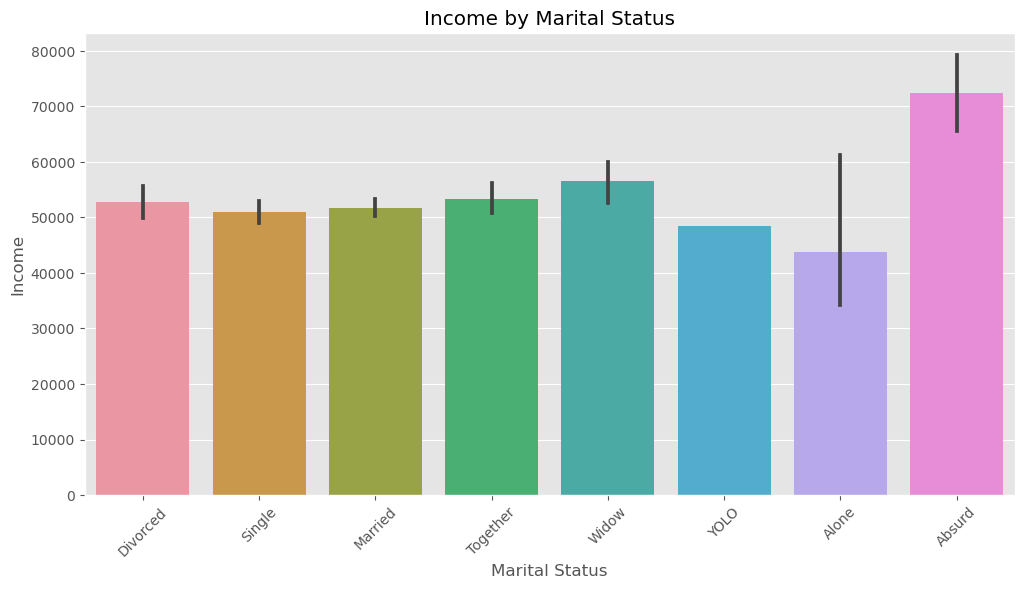

In [247]:
# Create a bar plot for Income by Marital Status

plt.figure(figsize=(12, 6))  
sns.barplot(y='Income', x='Marital_Status', data=df)
plt.title('Income by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()

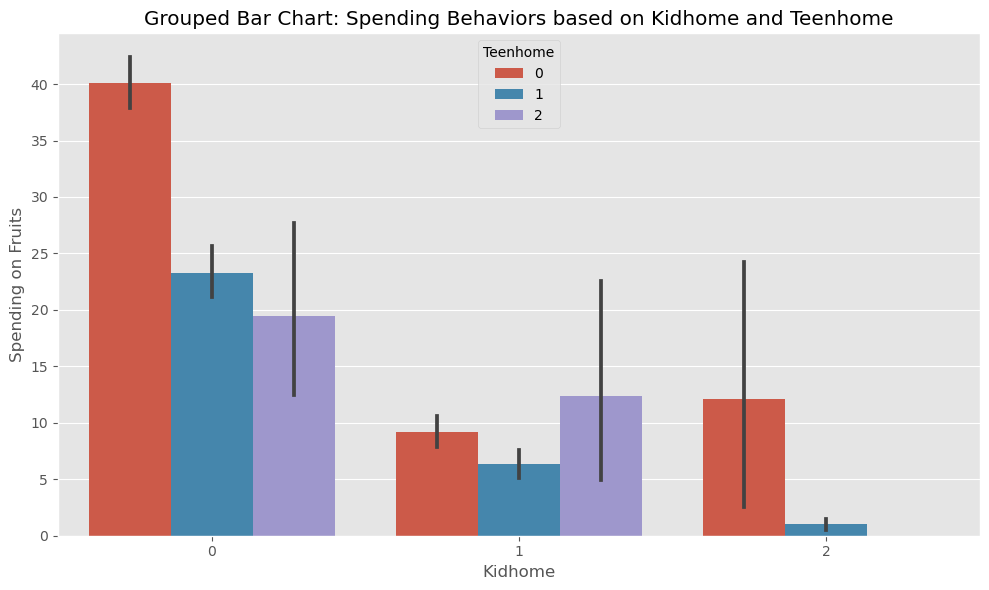

In [262]:
# Create grouped bar charts to analyze spending behaviors based on customer characteristics (e.g., "Kidhome" and "Teenhome")

plt.figure(figsize=(10, 6)) 

# Grouped bar chart for spending behaviors based on Kidhome and Teenhome

sns.barplot(x='Num_kids_home', y='MntFruits', hue='Num_Teens_home', data=df)

plt.title('Grouped Bar Chart: Spending Behaviors based on Kidhome and Teenhome')
plt.xlabel('Kidhome')
plt.ylabel('Spending on Fruits')
plt.legend(title='Teenhome')
plt.tight_layout()
plt.show()

In [104]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Num_kids_home,Num_Teens_home,Cust_reg_date,Recency,MntWines,...,Campaign4_effective,Campaign5_effective,Campaign1_effective,Campaign2_effective,Response,Complain,Country,Age,Year,month_name
0,1826,1970,Graduation,Divorced,84835,0,0,2014-06-16,0,189.0,...,No,No,No,No,Yes,No,SP,54,2014,June
1,1,1961,Graduation,Single,57091,0,0,2014-06-15,0,464.0,...,No,No,No,Yes,Yes,No,CA,63,2014,June
2,10476,1958,Graduation,Married,67267,0,1,2014-05-13,0,134.0,...,No,No,No,No,No,No,US,66,2014,May
3,1386,1967,Graduation,Together,32474,1,1,2014-05-11,0,10.0,...,No,No,No,No,No,No,AUS,57,2014,May
4,5371,1989,Graduation,Single,21474,1,0,2014-04-08,0,6.0,...,No,No,No,No,Yes,No,SP,35,2014,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10142,1976,PhD,Divorced,66476,0,1,2013-03-07,99,372.0,...,No,No,No,No,No,No,US,48,2013,March
2212,5263,1977,2n Cycle,Married,31056,1,0,2013-01-22,99,5.0,...,No,No,No,No,No,No,SP,47,2013,January
2213,22,1976,Graduation,Divorced,46310,1,0,2012-12-03,99,185.0,...,No,No,No,No,No,No,SP,48,2012,December
2214,528,1978,Graduation,Married,65819,0,0,2012-11-29,99,267.0,...,No,No,No,No,No,No,IND,46,2012,November


In [105]:
#CATEGORIZING AGES INTO AGE CATEGORIES

df['Age_grouped'] = 'adult (41 - 55)'

df.loc[(df['Age'] >= 28) & (df['Age'] <= 40), 'Age_grouped'] = 'middle_aged (28 - 40)'
df.loc[(df['Age'] >= 56) & (df['Age'] <= 70), 'Age_grouped'] = 'Old (56 - 70)'
df.loc[(df['Age'] >= 71) & (df['Age'] <= 92), 'Age_grouped'] = 'Very Old (71 - 92)'


In [106]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Num_kids_home,Num_Teens_home,Cust_reg_date,Recency,MntWines,...,Campaign5_effective,Campaign1_effective,Campaign2_effective,Response,Complain,Country,Age,Year,month_name,Age_grouped
0,1826,1970,Graduation,Divorced,84835,0,0,2014-06-16,0,189.0,...,No,No,No,Yes,No,SP,54,2014,June,adult (41 - 55)
1,1,1961,Graduation,Single,57091,0,0,2014-06-15,0,464.0,...,No,No,Yes,Yes,No,CA,63,2014,June,Old (56 - 70)
2,10476,1958,Graduation,Married,67267,0,1,2014-05-13,0,134.0,...,No,No,No,No,No,US,66,2014,May,Old (56 - 70)
3,1386,1967,Graduation,Together,32474,1,1,2014-05-11,0,10.0,...,No,No,No,No,No,AUS,57,2014,May,Old (56 - 70)
4,5371,1989,Graduation,Single,21474,1,0,2014-04-08,0,6.0,...,No,No,No,Yes,No,SP,35,2014,April,middle_aged (28 - 40)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10142,1976,PhD,Divorced,66476,0,1,2013-03-07,99,372.0,...,No,No,No,No,No,US,48,2013,March,adult (41 - 55)
2212,5263,1977,2n Cycle,Married,31056,1,0,2013-01-22,99,5.0,...,No,No,No,No,No,SP,47,2013,January,adult (41 - 55)
2213,22,1976,Graduation,Divorced,46310,1,0,2012-12-03,99,185.0,...,No,No,No,No,No,SP,48,2012,December,adult (41 - 55)
2214,528,1978,Graduation,Married,65819,0,0,2012-11-29,99,267.0,...,No,No,No,No,No,IND,46,2012,November,adult (41 - 55)


In [107]:
group_by_agegroup = df.groupby('Age_grouped')['ID'].count().reset_index()

In [108]:
group_by_agegroup.sort_values(by = 'ID', ascending = False)

,Age_grouped,ID
2,adult (41 - 55),965
0,Old (56 - 70),727
1,Very Old (71 - 92),267
3,middle_aged (28 - 40),257


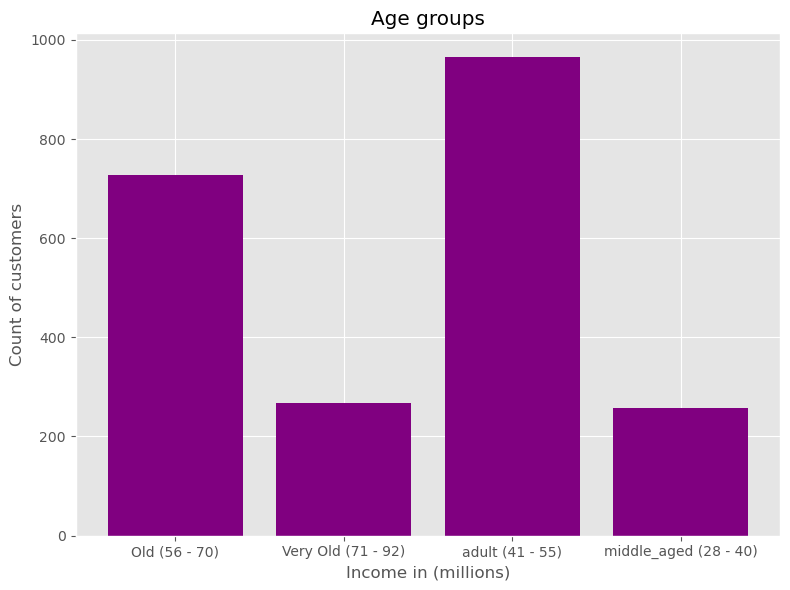

In [109]:
plt.figure(figsize = (8,6))
plt.bar(group_by_agegroup['Age_grouped'], group_by_agegroup['ID'], color = 'purple')
plt.xlabel('Income in (millions)')
plt.ylabel('Count of customers')
plt.title('Age groups')
plt.tight_layout()
plt.show()

In [185]:
scale = StandardScaler

In [129]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Num_kids_home,Num_Teens_home,Cust_reg_date,Recency,MntWines,...,Campaign5_effective,Campaign1_effective,Campaign2_effective,Response,Complain,Country,Age,Year,month_name,Age_grouped
0,1826,1970,Graduation,Divorced,84835,0,0,2014-06-16,0,189.0,...,No,No,No,Yes,No,SP,54,2014,June,adult (41 - 55)
1,1,1961,Graduation,Single,57091,0,0,2014-06-15,0,464.0,...,No,No,Yes,Yes,No,CA,63,2014,June,Old (56 - 70)
2,10476,1958,Graduation,Married,67267,0,1,2014-05-13,0,134.0,...,No,No,No,No,No,US,66,2014,May,Old (56 - 70)
3,1386,1967,Graduation,Together,32474,1,1,2014-05-11,0,10.0,...,No,No,No,No,No,AUS,57,2014,May,Old (56 - 70)
4,5371,1989,Graduation,Single,21474,1,0,2014-04-08,0,6.0,...,No,No,No,Yes,No,SP,35,2014,April,middle_aged (28 - 40)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10142,1976,PhD,Divorced,66476,0,1,2013-03-07,99,372.0,...,No,No,No,No,No,US,48,2013,March,adult (41 - 55)
2212,5263,1977,2n Cycle,Married,31056,1,0,2013-01-22,99,5.0,...,No,No,No,No,No,SP,47,2013,January,adult (41 - 55)
2213,22,1976,Graduation,Divorced,46310,1,0,2012-12-03,99,185.0,...,No,No,No,No,No,SP,48,2012,December,adult (41 - 55)
2214,528,1978,Graduation,Married,65819,0,0,2012-11-29,99,267.0,...,No,No,No,No,No,IND,46,2012,November,adult (41 - 55)


# PURCHASING BEHAVIOR ANALYSIS

C:\Users\PAW PAW\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


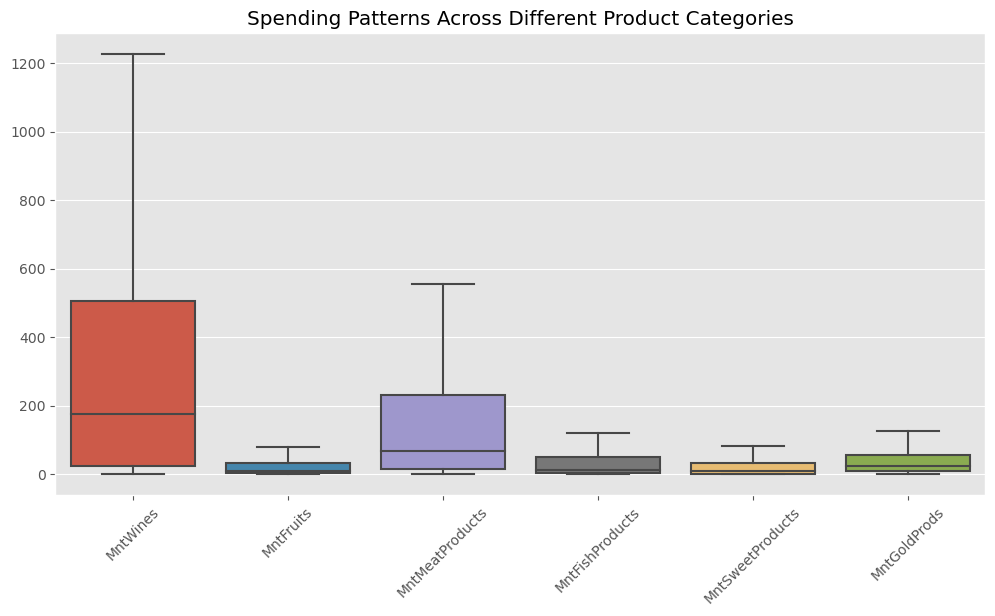

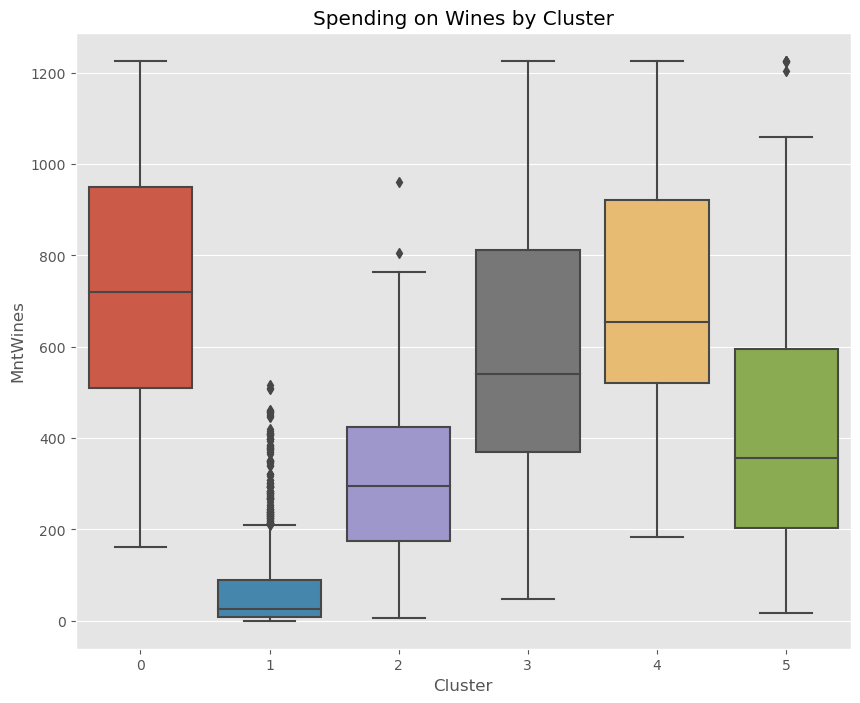

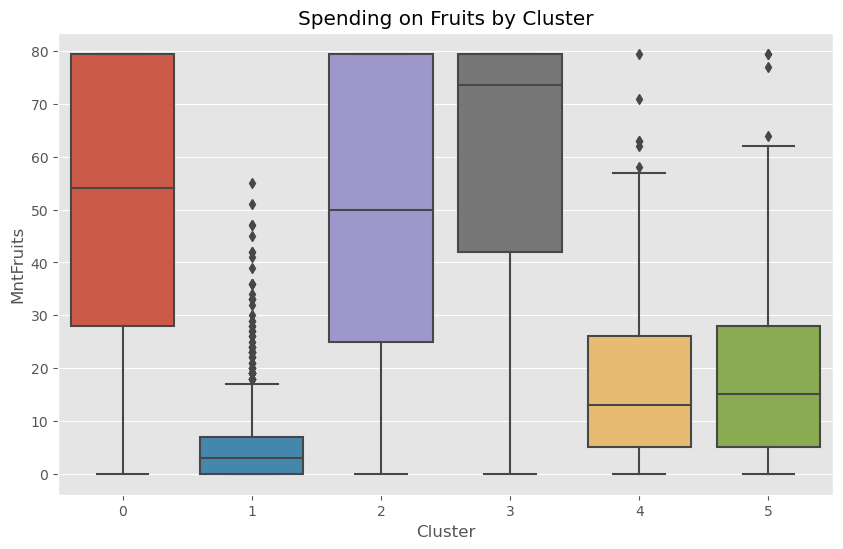

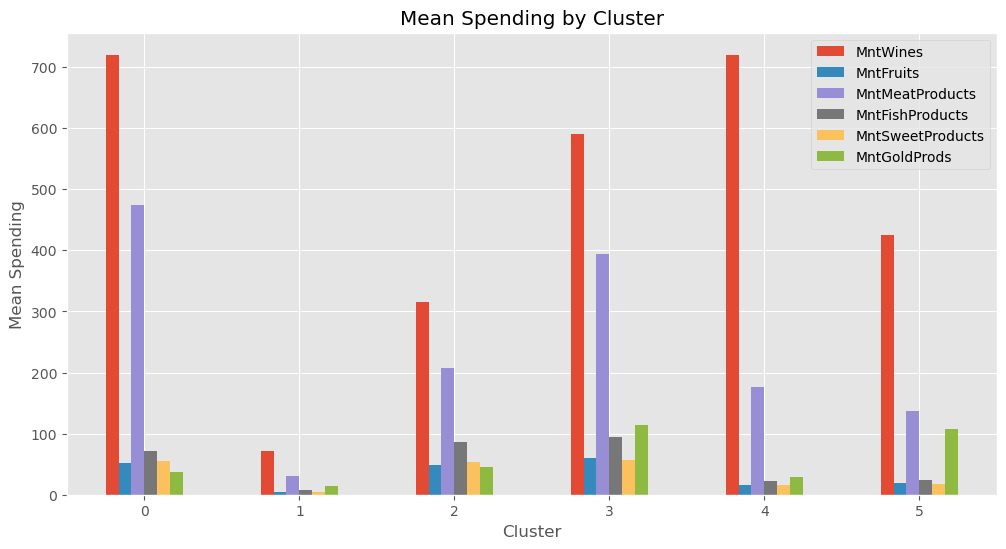

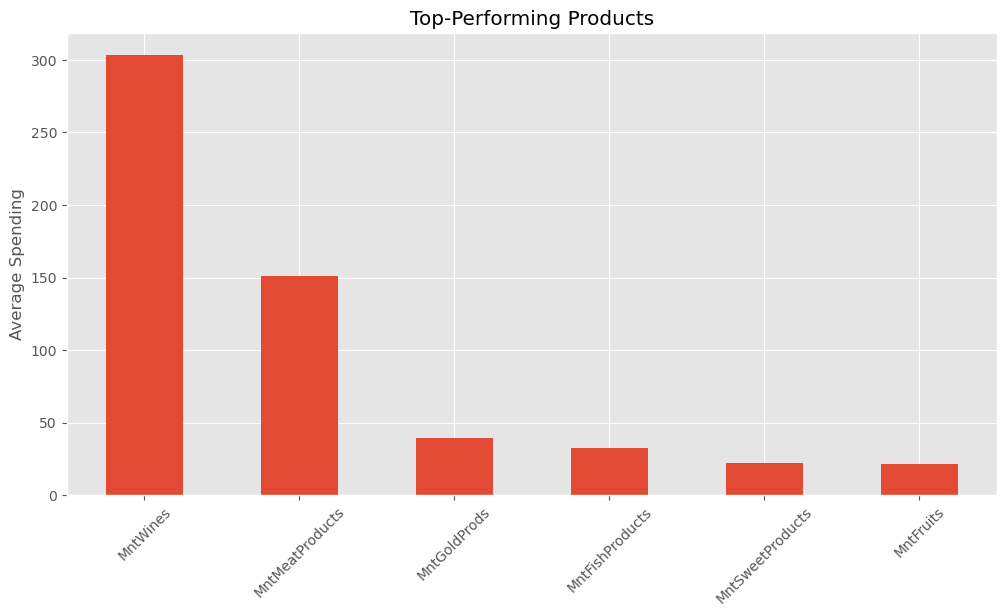

In [188]:

# Select relevant columns

useful_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
useful_cols = df[useful_cols]

useful_cols_scale = scaler.fit_transform(X)

#Apply K-Means clustering

kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(useful_cols_scale)

# Add the cluster labels to the original DataFrame

df['Cluster'] = kmeans.labels_

# Analyze spending patterns

# View statistics for each product category

spending_patterns = df[spending_columns].describe()
spending_patterns

# Visualize spending patterns using box plots

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[spending_columns])
plt.title('Spending Patterns Across Different Product Categories')
plt.xticks(rotation=45)
plt.show()

# Visualize spending patterns by cluster

plt.figure(figsize=(10, 8))
sns.boxplot(x='Cluster', y='MntWines', data=df)
plt.title('Spending on Wines by Cluster')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='MntFruits', data=df)
plt.title('Spending on Fruits by Cluster')
plt.show()

# Identify top-performing products and customer segments

# Calculate the mean spending in each category by cluster
cluster_average_categories = df.groupby('Cluster')[spending_columns].mean()


# Visualize the mean spending by cluster

cluster_average_categories.plot(kind='bar', figsize=(12, 6))
plt.title('Mean Spending by Cluster')
plt.ylabel('Mean Spending')
plt.xticks(rotation=0)
plt.show()

# Identify top-performing products overall

top_products = df[spending_columns].mean().sort_values(ascending=False)
top_products

# Visualize top-performing products
top_products.plot(kind='bar', figsize=(12, 6))
plt.title('Top-Performing Products')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.show()






C:\Users\PAW PAW\AppData\Local\Temp\ipykernel_16552\2056517226.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Categories_by_segment = df.groupby('Marital_Status')['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'].sum()


# MARKETING CAMPAIGN EFFECTIVENESS

In [190]:
#COVERTING VALUES IN CAMPAIGN COLUMNS

df['Campaign1_effective'] = df['Campaign1_effective'].replace({'Yes': '1', 'No': '0'})
df['Campaign2_effective'] = df['Campaign2_effective'].replace({'Yes': '1', 'No': '0'})
df['Campaign3_effective'] = df['Campaign3_effective'].replace({'Yes': '1', 'No': '0'})
df['Campaign4_effective'] = df['Campaign4_effective'].replace({'Yes': '1', 'No': '0'})
df['Campaign5_effective'] = df['Campaign5_effective'].replace({'Yes': '1', 'No': '0'})

In [191]:
df


,ID,Year_Birth,Education,Marital_Status,Income,Num_kids_home,Num_Teens_home,Cust_reg_date,Recency,MntWines,...,Campaign1_effective,Campaign2_effective,Response,Complain,Country,Age,Year,month_name,Age_grouped,Cluster
0,1826,1970,Graduation,Divorced,84835,0,0,2014-06-16,0,189.0,...,0,0,Yes,No,SP,54,2014,June,adult (41 - 55),3
1,1,1961,Graduation,Single,57091,0,0,2014-06-15,0,464.0,...,0,1,Yes,No,CA,63,2014,June,Old (56 - 70),4
2,10476,1958,Graduation,Married,67267,0,1,2014-05-13,0,134.0,...,0,0,No,No,US,66,2014,May,Old (56 - 70),1
3,1386,1967,Graduation,Together,32474,1,1,2014-05-11,0,10.0,...,0,0,No,No,AUS,57,2014,May,Old (56 - 70),1
4,5371,1989,Graduation,Single,21474,1,0,2014-04-08,0,6.0,...,0,0,Yes,No,SP,35,2014,April,middle_aged (28 - 40),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10142,1976,PhD,Divorced,66476,0,1,2013-03-07,99,372.0,...,0,0,No,No,US,48,2013,March,adult (41 - 55),5
2212,5263,1977,2n Cycle,Married,31056,1,0,2013-01-22,99,5.0,...,0,0,No,No,SP,47,2013,January,adult (41 - 55),1
2213,22,1976,Graduation,Divorced,46310,1,0,2012-12-03,99,185.0,...,0,0,No,No,SP,48,2012,December,adult (41 - 55),1
2214,528,1978,Graduation,Married,65819,0,0,2012-11-29,99,267.0,...,0,0,No,No,IND,46,2012,November,adult (41 - 55),0


In [192]:
#CONVERTING DATATYPES TO INT

df['Campaign1_effective'] = df['Campaign1_effective'].astype(int)
df['Campaign2_effective'] = df['Campaign2_effective'].astype(int)
df['Campaign3_effective'] = df['Campaign3_effective'].astype(int)
df['Campaign4_effective'] = df['Campaign4_effective'].astype(int)
df['Campaign5_effective'] = df['Campaign5_effective'].astype(int)

In [204]:
# List of campaign acceptance columns
Camp_cols = ['Campaign1_effective','Campaign2_effective','Campaign3_effective','Campaign4_effective','Campaign5_effective']


In [205]:
Camp_cols

['Campaign1_effective',
 'Campaign2_effective',
 'Campaign3_effective',
 'Campaign4_effective',
 'Campaign5_effective']

In [218]:
#CALCULATING THE TOTAL VALUES FOR EACH CAMPAIGN AS 1 SIGNIFIES YES FOR EFFECTIVENESS

Camp_cols_eff = df[Camp_cols].sum()

In [208]:
Camp_cols_eff

Campaign1_effective    142
Campaign2_effective     30
Campaign3_effective    163
Campaign4_effective    164
Campaign5_effective    162
dtype: int64

Text(0, 0.5, 'Number of Acceptances (Total of 1)')

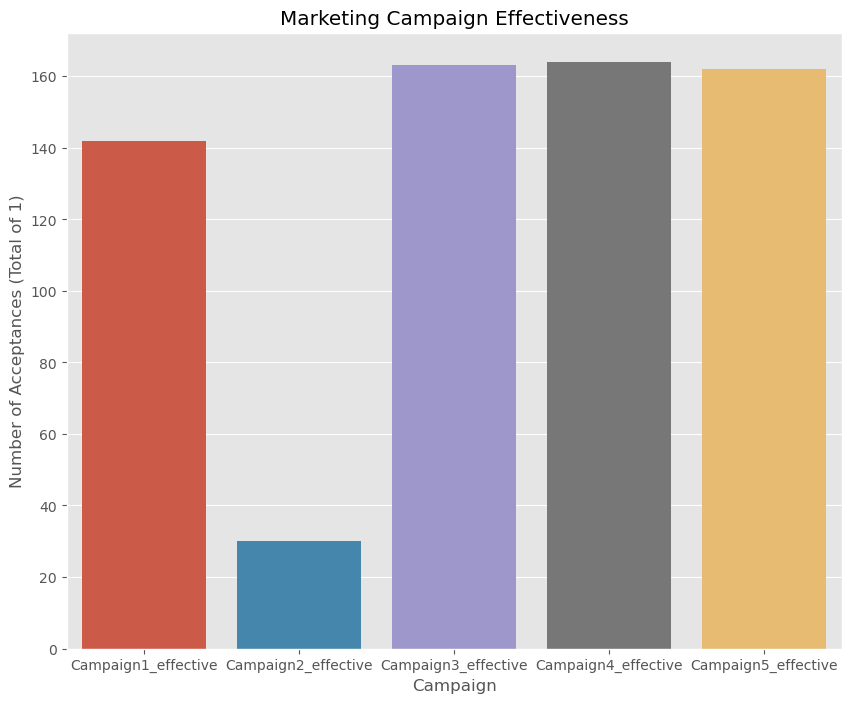

In [215]:
plt.figure(figsize=(10, 8))
sns.barplot(x=Camp_cols_eff.index, y=Camp_cols_eff.values)
plt.title('Marketing Campaign Effectiveness')
plt.xlabel('Campaign')
plt.ylabel('Number of Acceptances (Total of 1)')

# BUILDING A PREDICTIVE MODEL TO PREDICT CUSTOMERS RESPONSE TO FUTURE CAMPAIGNS

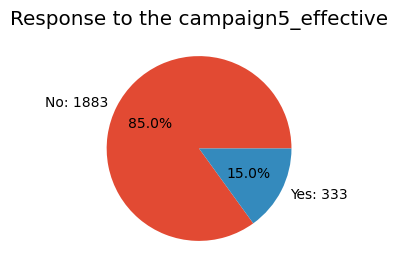

In [264]:
fig = plt.figure(figsize=(3,3))
data=df['Response'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Response to the campaign5_effective');




In [271]:
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [286]:
#ENCODING THE EDUCATION AND MARITAL STATUS COLUMN FOR FURTHER ANALYSIS
df = df.rename(columns={'Education': 'education',
                         'Marital_Status': 'marital',
                         })
df = pd.get_dummies(df, drop_first = False, columns=['education', 'marital'])
df.columns

Index(['ID', 'Year_Birth', 'Income', 'Num_kids_home', 'Num_Teens_home',
       'Cust_reg_date', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'Num_Discount_purchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Campaign3_effective',
       'Campaign4_effective', 'Campaign5_effective', 'Campaign1_effective',
       'Campaign2_effective', 'Response', 'Complain', 'Country', 'Age', 'Year',
       'month_name', 'Age_grouped', 'Cluster', 'education_2n Cycle',
       'education_Basic', 'education_Graduation', 'education_Master',
       'education_PhD', 'marital_Absurd', 'marital_Alone', 'marital_Divorced',
       'marital_Married', 'marital_Single', 'marital_Together',
       'marital_Widow', 'marital_YOLO'],
      dtype='object')

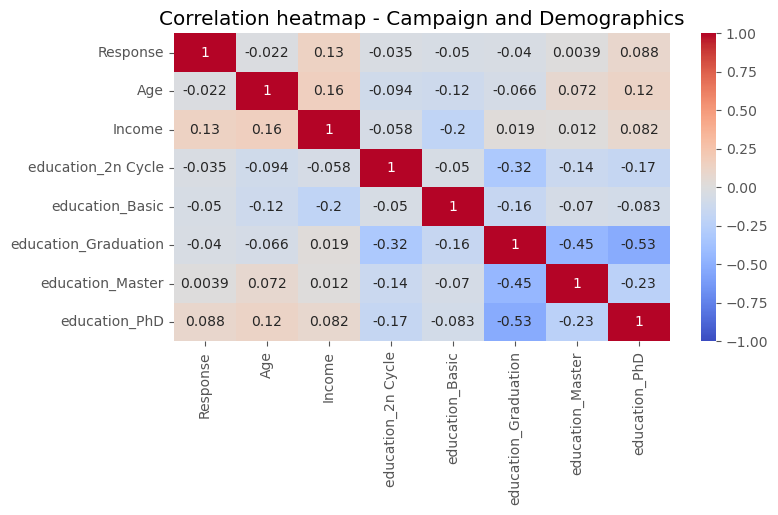

In [289]:
#CONVERTING RESPONSE VALUES AND DATATYPES SO AS TO BE EFFECTIVE IN THE CORRELATION MAP

df['Response'] = df['Response'].replace({'Yes': '1', 'No': '0'})
df['Response'] = df['Response'].astype(int)



# LOOKING INTO THE CAMPAIGN RESPONSE AND THE OTHER CUSTOMER'S DATA

plt.figure(figsize=(8,4))
sns.heatmap(df[['Response',
               'Age'
                , 'Income','education_2n Cycle',
       'education_Basic', 'education_Graduation', 'education_Master',
       'education_PhD'
               ]].corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap - Campaign and Demographics')
plt.show()


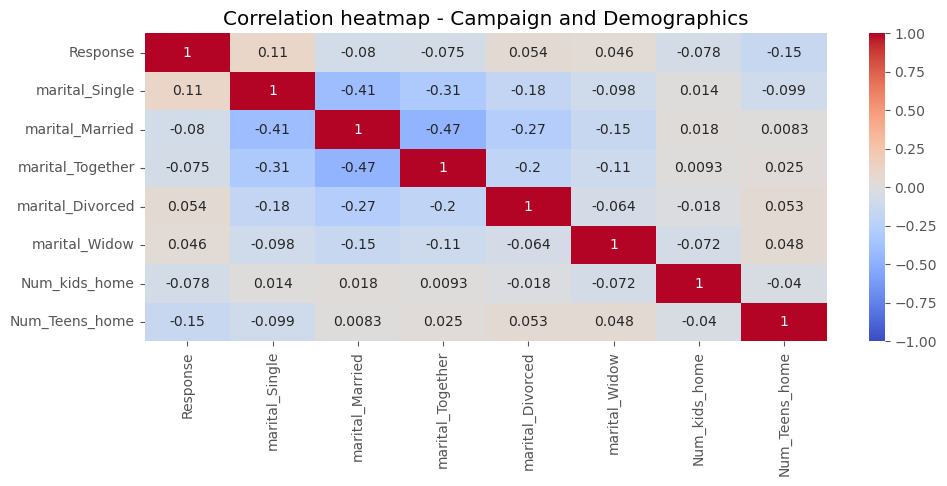

In [294]:
# Plot correlation heatmap

plt.figure(figsize=(11,4))
sns.heatmap(df[['Response',
                'marital_Single',
                'marital_Married', 'marital_Together', 'marital_Divorced',
                'marital_Widow', 'Num_kids_home', 'Num_Teens_home'
               ]].corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap - Campaign and Demographics')
plt.show();

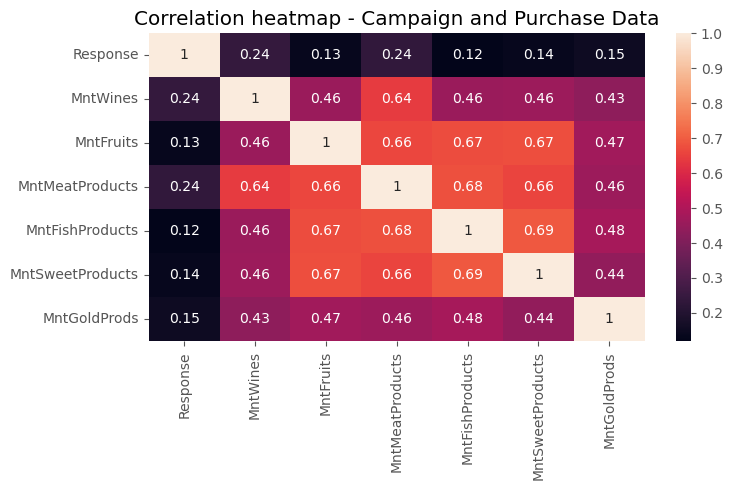

In [300]:
# CHECKING THE RELATIONSHIP BETWEEN RESPONSE AND MONEY SPENT

# Plot correlation heatmap

plt.figure(figsize=(8,4))
sns.heatmap(df[['Response', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                'MntSweetProducts','MntGoldProds']].corr(), annot=True)
plt.title('Correlation heatmap - Campaign and Purchase Data',
          )
plt.show();
        

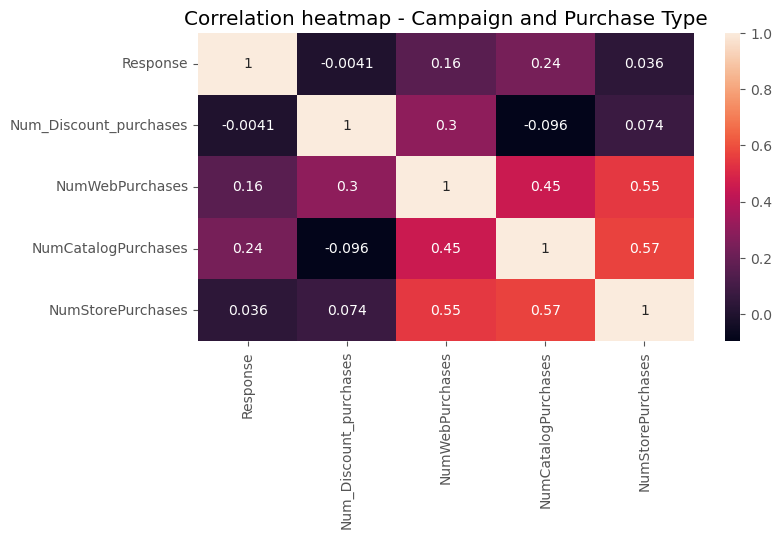

In [303]:
# CHECKING THE RELATIONSHIP BETWEEN RESPONSE AND TYPE OF PURCHASES

# Plot correlation heatmap

plt.figure(figsize=(8,4))
sns.heatmap(df[['Response','Num_Discount_purchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].corr(), annot=True)
plt.title('Correlation heatmap - Campaign and Purchase Type',
          )
plt.show()


C:\Users\PAW PAW\AppData\Local\Temp\ipykernel_16552\4072035948.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ]].corr(),annot=True, cmap='coolwarm')


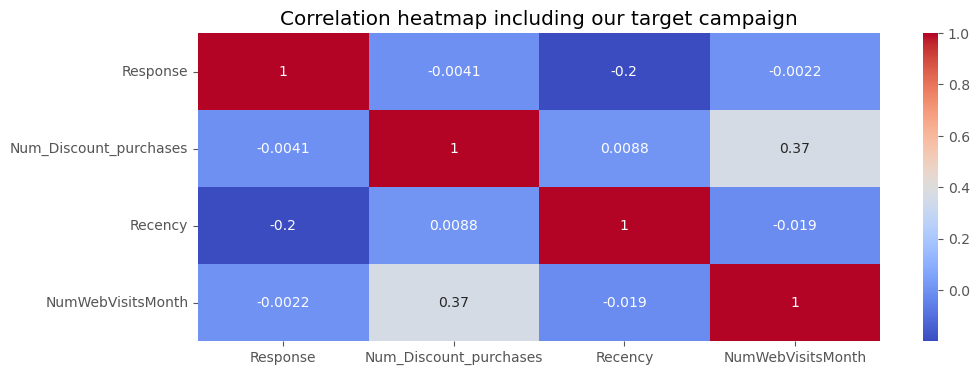

In [306]:
# Include the response to our target campaign

# Plot correlation heatmap

plt.figure(figsize=(11,4))
sns.heatmap(df[['Response','Num_Discount_purchases', 'Recency', 'NumWebVisitsMonth',
                 'Complain'
                 ]].corr(),annot=True, cmap='coolwarm')
plt.title('Correlation heatmap including our target campaign')
plt.show()

In [309]:
df['MntTotal'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [310]:
df['MntTotal']

0        966.000
1        577.000
2        251.000
3         11.000
4         91.000
          ...   
2211     689.000
2212      55.000
2213     309.000
2214    1126.125
2215     993.000
Name: MntTotal, Length: 2216, dtype: float64

In [340]:
# Dropping the Income outlier with value "666666"

df['Income'].max()

# Creating a copy of the table to drop the outlier

df_drop_income_outlier = df.copy()
df_drop_income_outlier = df_drop_income_outlier.drop(df_drop_income_outlier[df_drop_income_outlier['Income'] > 600000].index)

Text(0.5, 1.0, 'Income vs Total Amount spent')

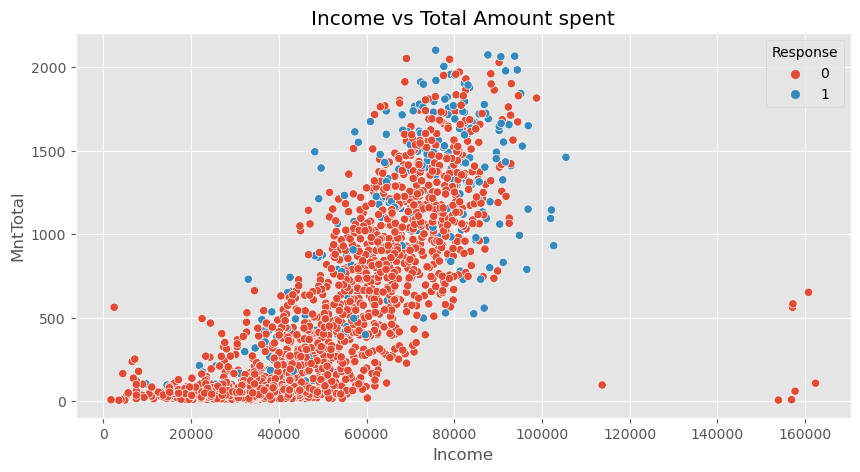

In [343]:
# Create scatterplot of Income versus with Response "1" is "Yes" and "0" is "NO"

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_drop_income_outlier, x='Income', y='MntTotal', hue='Response')
plt.title('Income vs Total Amount spent')

# Predicting Response

In [382]:
df

,ID,Year_Birth,Income,Num_kids_home,Num_Teens_home,Cust_reg_date,Recency,MntWines,MntFruits,MntMeatProducts,...,education_PhD,marital_Absurd,marital_Alone,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,marital_YOLO,MntTotal
0,1826,1970,84835,0,0,2014-06-16,0,189.0,79.5,379.000,...,0,0,0,1,0,0,0,0,0,966.000
1,1,1961,57091,0,0,2014-06-15,0,464.0,5.0,64.000,...,0,0,0,0,0,1,0,0,0,577.000
2,10476,1958,67267,0,1,2014-05-13,0,134.0,11.0,59.000,...,0,0,0,0,1,0,0,0,0,251.000
3,1386,1967,32474,1,1,2014-05-11,0,10.0,0.0,1.000,...,0,0,0,0,0,0,1,0,0,11.000
4,5371,1989,21474,1,0,2014-04-08,0,6.0,16.0,24.000,...,0,0,0,0,0,1,0,0,0,91.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10142,1976,66476,0,1,2013-03-07,99,372.0,18.0,126.000,...,1,0,0,1,0,0,0,0,0,689.000
2212,5263,1977,31056,1,0,2013-01-22,99,5.0,10.0,13.000,...,0,0,0,0,1,0,0,0,0,55.000
2213,22,1976,46310,1,0,2012-12-03,99,185.0,2.0,88.000,...,0,0,0,1,0,0,0,0,0,309.000
2214,528,1978,65819,0,0,2012-11-29,99,267.0,38.0,556.625,...,0,0,0,0,1,0,0,0,0,1126.125


In [384]:
X = df.drop(columns = "Response")
Y = df["Response"].copy(deep = True)
        

In [385]:
X

,ID,Year_Birth,Income,Num_kids_home,Num_Teens_home,Cust_reg_date,Recency,MntWines,MntFruits,MntMeatProducts,...,education_PhD,marital_Absurd,marital_Alone,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,marital_YOLO,MntTotal
0,1826,1970,84835,0,0,2014-06-16,0,189.0,79.5,379.000,...,0,0,0,1,0,0,0,0,0,966.000
1,1,1961,57091,0,0,2014-06-15,0,464.0,5.0,64.000,...,0,0,0,0,0,1,0,0,0,577.000
2,10476,1958,67267,0,1,2014-05-13,0,134.0,11.0,59.000,...,0,0,0,0,1,0,0,0,0,251.000
3,1386,1967,32474,1,1,2014-05-11,0,10.0,0.0,1.000,...,0,0,0,0,0,0,1,0,0,11.000
4,5371,1989,21474,1,0,2014-04-08,0,6.0,16.0,24.000,...,0,0,0,0,0,1,0,0,0,91.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10142,1976,66476,0,1,2013-03-07,99,372.0,18.0,126.000,...,1,0,0,1,0,0,0,0,0,689.000
2212,5263,1977,31056,1,0,2013-01-22,99,5.0,10.0,13.000,...,0,0,0,0,1,0,0,0,0,55.000
2213,22,1976,46310,1,0,2012-12-03,99,185.0,2.0,88.000,...,0,0,0,1,0,0,0,0,0,309.000
2214,528,1978,65819,0,0,2012-11-29,99,267.0,38.0,556.625,...,0,0,0,0,1,0,0,0,0,1126.125


In [386]:
Y

0       1
1       1
2       0
3       0
4       1
       ..
2211    0
2212    0
2213    0
2214    0
2215    1
Name: Response, Length: 2216, dtype: int32

In [387]:
# SPLITTING DATASETS

X_train, X_valid, y_train, y_valid = train_test_split (X, y, test_size = 0.3, random_state = 7)
X_train.shape, X_valid.shape

((1551, 44), (665, 44))

In [389]:
num_cols = X_train.select_dtypes(exclude = "object").columns
num_cols

Index(['ID', 'Year_Birth', 'Income', 'Num_kids_home', 'Num_Teens_home',
       'Cust_reg_date', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'Num_Discount_purchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Campaign3_effective',
       'Campaign4_effective', 'Campaign5_effective', 'Campaign1_effective',
       'Campaign2_effective', 'Age', 'Year', 'Cluster', 'education_2n Cycle',
       'education_Basic', 'education_Graduation', 'education_Master',
       'education_PhD', 'marital_Absurd', 'marital_Alone', 'marital_Divorced',
       'marital_Married', 'marital_Single', 'marital_Together',
       'marital_Widow', 'marital_YOLO', 'MntTotal'],
      dtype='object')

In [391]:
cat_cols = X_train.select_dtypes(include = "object").columns

In [394]:
transformer = ColumnTransformer([
    ("num_imputer",SimpleImputer(), num_cols),
    ("cat_transformer", Pipeline([
        ("imputer", SimpleImputer(strategy = "most_frequent")),
        ("ord_encoder", OrdinalEncoder(handle_unknown ="use_encoded_value", unknown_value = -1))
    ]),
    cat_cols)
])

transformer

ColumnTransformer(transformers=[('num_imputer', SimpleImputer(),
                                 Index(['ID', 'Year_Birth', 'Income', 'Num_kids_home', 'Num_Teens_home',
       'Cust_reg_date', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'Num_Discount_purchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMon...
       'marital_Married', 'marital_Single', 'marital_Together',
       'marital_Widow', 'marital_YOLO', 'MntTotal'],
      dtype='object')),
                                ('cat_transformer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ord_encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 Index(['Complain', 'Country', 'month_name', 'Age_grouped'], dtype='object'))])

In [398]:
print("Columns in X_train:", X_train.columns)
print("Columns in X_test:", X_test.columns)

Columns in X_train: Index(['ID', 'Year_Birth', 'Income', 'Num_kids_home', 'Num_Teens_home',
       'Cust_reg_date', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'Num_Discount_purchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Campaign3_effective',
       'Campaign4_effective', 'Campaign5_effective', 'Campaign1_effective',
       'Campaign2_effective', 'Complain', 'Country', 'Age', 'Year',
       'month_name', 'Age_grouped', 'Cluster', 'education_2n Cycle',
       'education_Basic', 'education_Graduation', 'education_Master',
       'education_PhD', 'marital_Absurd', 'marital_Alone', 'marital_Divorced',
       'marital_Married', 'marital_Single', 'marital_Together',
       'marital_Widow', 'marital_YOLO', 'MntTotal'],
      dtype='object')
Columns in X_test: Index(['Campaign1_effective', 'Campaign2_effective', 'Campaign3_effective',
       'Campaign4_effect

In [404]:
print("Columns in X_train:", X_train.columns)
print("Columns in X_test:", X_test.columns)

Columns in X_train: Index(['ID', 'Year_Birth', 'Income', 'Num_kids_home', 'Num_Teens_home',
       'Cust_reg_date', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'Num_Discount_purchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Campaign3_effective',
       'Campaign4_effective', 'Campaign5_effective', 'Campaign1_effective',
       'Campaign2_effective', 'Complain', 'Country', 'Age', 'Year',
       'month_name', 'Age_grouped', 'Cluster', 'education_2n Cycle',
       'education_Basic', 'education_Graduation', 'education_Master',
       'education_PhD', 'marital_Absurd', 'marital_Alone', 'marital_Divorced',
       'marital_Married', 'marital_Single', 'marital_Together',
       'marital_Widow', 'marital_YOLO', 'MntTotal'],
      dtype='object')
Columns in X_test: Index(['Campaign1_effective', 'Campaign2_effective', 'Campaign3_effective',
       'Campaign4_effect

In [408]:
   X_train = X_train.drop(columns=['ID'])

In [406]:
X

,Year_Birth,Income,Num_kids_home,Num_Teens_home,Cust_reg_date,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,education_PhD,marital_Absurd,marital_Alone,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,marital_YOLO,MntTotal
0,1970,84835,0,0,2014-06-16,0,189.0,79.5,379.000,111.0,...,0,0,0,1,0,0,0,0,0,966.000
1,1961,57091,0,0,2014-06-15,0,464.0,5.0,64.000,7.0,...,0,0,0,0,0,1,0,0,0,577.000
2,1958,67267,0,1,2014-05-13,0,134.0,11.0,59.000,15.0,...,0,0,0,0,1,0,0,0,0,251.000
3,1967,32474,1,1,2014-05-11,0,10.0,0.0,1.000,0.0,...,0,0,0,0,0,0,1,0,0,11.000
4,1989,21474,1,0,2014-04-08,0,6.0,16.0,24.000,11.0,...,0,0,0,0,0,1,0,0,0,91.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,1976,66476,0,1,2013-03-07,99,372.0,18.0,126.000,47.0,...,1,0,0,1,0,0,0,0,0,689.000
2212,1977,31056,1,0,2013-01-22,99,5.0,10.0,13.000,3.0,...,0,0,0,0,1,0,0,0,0,55.000
2213,1976,46310,1,0,2012-12-03,99,185.0,2.0,88.000,15.0,...,0,0,0,1,0,0,0,0,0,309.000
2214,1978,65819,0,0,2012-11-29,99,267.0,38.0,556.625,120.5,...,0,0,0,0,1,0,0,0,0,1126.125


In [409]:
print("Columns in X_train:", X_train.columns)
print("Columns in X_test:", X_test.columns)

Columns in X_train: Index(['Year_Birth', 'Income', 'Num_kids_home', 'Num_Teens_home',
       'Cust_reg_date', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'Num_Discount_purchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Campaign3_effective',
       'Campaign4_effective', 'Campaign5_effective', 'Campaign1_effective',
       'Campaign2_effective', 'Complain', 'Country', 'Age', 'Year',
       'month_name', 'Age_grouped', 'Cluster', 'education_2n Cycle',
       'education_Basic', 'education_Graduation', 'education_Master',
       'education_PhD', 'marital_Absurd', 'marital_Alone', 'marital_Divorced',
       'marital_Married', 'marital_Single', 'marital_Together',
       'marital_Widow', 'marital_YOLO', 'MntTotal'],
      dtype='object')
Columns in X_test: Index(['Campaign1_effective', 'Campaign2_effective', 'Campaign3_effective',
       'Campaign4_effective', 

In [411]:
# Ensure columns in both train and test sets are consistent

common_columns = X_train.columns.intersection(X_test.columns)

In [412]:
common_columns

Index(['Income', 'Campaign3_effective', 'Campaign4_effective',
       'Campaign5_effective', 'Campaign1_effective', 'Campaign2_effective',
       'Age'],
      dtype='object')

In [413]:
for col in common_columns:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

In [423]:
# Ensure these columns are present in the data

numeric_features = [col for col in num_cols if col in common_columns]

In [416]:
numeric_features

['Income',
 'Campaign3_effective',
 'Campaign4_effective',
 'Campaign5_effective',
 'Campaign1_effective',
 'Campaign2_effective',
 'Age']

In [417]:
# Define the transformer for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [418]:
# Combine the transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])


In [421]:
# Fit and transform the training data
X_train_tf = preprocessor.fit_transform(X_train)

In [430]:
# Transform the test data
X_test_tf = preprocessor.transform(X_test)
X_valid_tf = preprocessor.transform(X_valid)

# LOGISTIC REGRESSION

In [431]:
model.predict(X_valid_tf)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [432]:
model.score(X_valid_tf, y_valid)

0.8781954887218045

In [462]:
# Construct a logistic regression model and fit it to the training dataset
log_model = LogisticRegression(random_state=42, max_iter=2000)
log_clf = log_model.fit(X_train_tf, y_train)

In [463]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_valid_tf)

In [464]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [443]:
# EVALUATING MODEL PERFORMANCES

print('Logistic Regression Results on Test Data')
print("Accuracy:", "%.6f" % accuracy_score(y_valid, y_pred))
print("Precision:", "%.6f" % precision_score(y_valid, y_pred))
print("Recall:", "%.6f" % recall_score(y_valid, y_pred))


Logistic Regression Results on Test Data
Accuracy: 0.878195
Precision: 0.838710
Recall: 0.254902


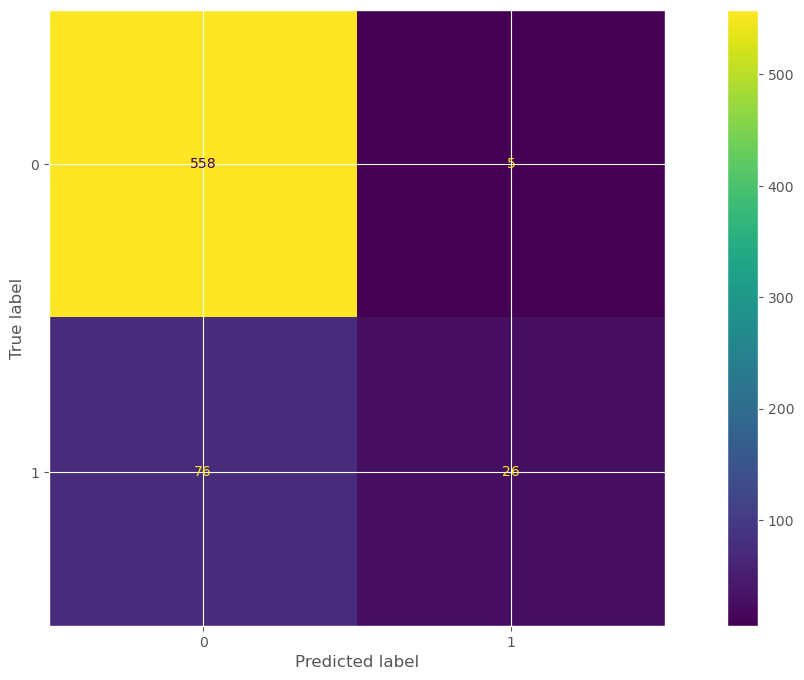

In [466]:
# Compute values for confusion matrix
log_CM = confusion_matrix(y_valid, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_CM, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix

log_disp.plot(values_format='')

# Display plot

plt.show()

In [477]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      2216 non-null   int64         
 1   Year_Birth              2216 non-null   int64         
 2   Income                  2216 non-null   int32         
 3   Num_kids_home           2216 non-null   int64         
 4   Num_Teens_home          2216 non-null   int64         
 5   Cust_reg_date           2216 non-null   datetime64[ns]
 6   Recency                 2216 non-null   int64         
 7   MntWines                2216 non-null   float64       
 8   MntFruits               2216 non-null   float64       
 9   MntMeatProducts         2216 non-null   float64       
 10  MntFishProducts         2216 non-null   float64       
 11  MntSweetProducts        2216 non-null   int64         
 12  MntGoldProds            2216 non-null   float64 